In [2]:
import re
import pandas as pd

# El texto proporcionado
text = """
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Training dataset summary:
Total examples: 34392, Positive examples: 14465.0, Negative examples: 19927.0
Positive proportion: 0.42

Evaluation dataset summary:
Total examples: 11464, Positive examples: 4816.0, Negative examples: 6648.0
Positive proportion: 0.42

Sample batch from eval_loader:
User tensor: tensor([ 3968,  3994,  5042,  9768,  8756,  1414,  5459,  2260,  1759,  9078,
         8711,  8821,  1288,  4867,  9122,  7046, 10144,  3255, 10327,  6659,
        10052,  6441,  2765,  7382,  1719,  4917,  5468,  6423,  7303, 10167,
         9732,  2151,   696,  1554, 10151,  7712,   367,  3443,   379,  9064,
         6369,   634,  7802,  6139,  6068,  5087,  4248,  1938,  5777,   455,
         8137, 10764,   369,  6013,  1241,   830,  7618,  3500,  3511,    13,
         3278,  5146,  3045,  4251])
Item tensor: tensor([ 7033,  1084,     8, 13241,  3939,    81,  5100,  2804,  3972,  3835,
        10445,   470,  2768,  2904,  8520, 10729,  9873,   240,  4934,  2042,
          482,  2987,  9156,  2806,   166,    81,  9615, 14060,  6496,  3059,
          533,    12,   935,  4722,  1458,  4433,   605,  9500,  1541,   269,
         2385,  1645,  4783,  6053,  3831,  2220,  1674,  2748, 13322,  3726,
         3488,  3804,   335,   822,   709,  2697,    10,  6496,  9977,  2418,
         1126, 12710, 11683, 10599])
Target tensor: tensor([1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6130498646577792: 100%|██████████| 269/269 [00:10<00:00, 26.65it/s]
Epoch 2 Loss: 0.48555056194760904: 100%|██████████| 269/269 [00:09<00:00, 26.97it/s]
Epoch 3 Loss: 0.4388817281865362: 100%|██████████| 269/269 [00:10<00:00, 26.41it/s] 
Epoch 4 Loss: 0.3921970850718555: 100%|██████████| 269/269 [00:10<00:00, 26.81it/s] 
Epoch 5 Loss: 0.34342073026891057: 100%|██████████| 269/269 [00:10<00:00, 26.71it/s]
Epoch 6 Loss: 0.30246621470025925: 100%|██████████| 269/269 [00:09<00:00, 26.91it/s]
Epoch 7 Loss: 0.2747673273751284: 100%|██████████| 269/269 [00:10<00:00, 26.80it/s] 
Epoch 8 Loss: 0.25504272522536353: 100%|██████████| 269/269 [00:10<00:00, 26.78it/s]
Epoch 9 Loss: 0.24559155534674873: 100%|██████████| 269/269 [00:10<00:00, 26.80it/s]
Epoch 10 Loss: 0.2349120107817739: 100%|██████████| 269/269 [00:10<00:00, 26.59it/s] 
Epoch 10: AUC = 0.6949416746804347
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6386956120225527: 100%|██████████| 538/538 [00:32<00:00, 16.52it/s]
Epoch 2 Loss: 0.4772575512056688: 100%|██████████| 538/538 [00:32<00:00, 16.64it/s] 
Epoch 3 Loss: 0.41071309290784697: 100%|██████████| 538/538 [00:32<00:00, 16.68it/s]
Epoch 4 Loss: 0.37420803450006346: 100%|██████████| 538/538 [00:32<00:00, 16.47it/s]
Epoch 5 Loss: 0.34516410357570293: 100%|██████████| 538/538 [00:32<00:00, 16.71it/s]
Epoch 5: AUC = 0.7425782279825387
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6808763781223155: 100%|██████████| 538/538 [01:11<00:00,  7.56it/s]
Epoch 2 Loss: 0.5653363835191195: 100%|██████████| 538/538 [01:10<00:00,  7.58it/s]
Epoch 3 Loss: 0.46326487375679515: 100%|██████████| 538/538 [01:11<00:00,  7.57it/s]
Epoch 4 Loss: 0.4204797725362849: 100%|██████████| 538/538 [01:10<00:00,  7.58it/s] 
Epoch 5 Loss: 0.3988803560018096: 100%|██████████| 538/538 [01:08<00:00,  7.80it/s] 
Epoch 6 Loss: 0.3845593297791747: 100%|██████████| 538/538 [01:12<00:00,  7.47it/s] 
Epoch 7 Loss: 0.37185260747666693: 100%|██████████| 538/538 [01:11<00:00,  7.55it/s]
Epoch 8 Loss: 0.3644523256108663: 100%|██████████| 538/538 [01:11<00:00,  7.56it/s] 
Epoch 9 Loss: 0.35633073448026936: 100%|██████████| 538/538 [01:10<00:00,  7.60it/s]
Epoch 10 Loss: 0.3490650210681901: 100%|██████████| 538/538 [01:11<00:00,  7.57it/s] 
Epoch 10: AUC = 0.7592268979935156
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 322982.14757331804: 100%|██████████| 538/538 [02:02<00:00,  4.38it/s]
Epoch 2 Loss: 13693006930.541494: 100%|██████████| 538/538 [02:00<00:00,  4.45it/s]
Epoch 3 Loss: 500866228.4879182: 100%|██████████| 538/538 [02:00<00:00,  4.45it/s] 
Epoch 4 Loss: 537901866.0125464: 100%|██████████| 538/538 [02:01<00:00,  4.44it/s] 
Epoch 5 Loss: 412040398.7527881: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s] 
Epoch 6 Loss: 233008401.83643124: 100%|██████████| 538/538 [02:01<00:00,  4.44it/s]
Epoch 7 Loss: 61159473.970260225: 100%|██████████| 538/538 [02:00<00:00,  4.45it/s]
Epoch 8 Loss: 45156306.639405206: 100%|██████████| 538/538 [02:01<00:00,  4.44it/s]
Epoch 9 Loss: 42591782.07109665: 100%|██████████| 538/538 [02:01<00:00,  4.44it/s] 
Epoch 10 Loss: 33402891.273001857: 100%|██████████| 538/538 [02:01<00:00,  4.44it/s]
Epoch 10: AUC = 0.5643760044114055
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5982481822870035: 100%|██████████| 269/269 [01:16<00:00,  3.53it/s]
Epoch 2 Loss: 0.4997484224214873: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s] 
Epoch 3 Loss: 0.4265286547986991: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s] 
Epoch 4 Loss: 0.36262201060814486: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]
Epoch 5 Loss: 0.30839705234566583: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 5: AUC = 0.719049089913457
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6101907989499289: 100%|██████████| 538/538 [00:30<00:00, 17.87it/s]
Epoch 2 Loss: 0.4706007236652978: 100%|██████████| 538/538 [00:30<00:00, 17.92it/s] 
Epoch 3 Loss: 0.40327669868811106: 100%|██████████| 538/538 [00:29<00:00, 18.00it/s]
Epoch 4 Loss: 0.3544443932602969: 100%|██████████| 538/538 [00:30<00:00, 17.93it/s] 
Epoch 5 Loss: 0.31595386378813944: 100%|██████████| 538/538 [00:29<00:00, 18.03it/s]
Epoch 5: AUC = 0.7239744426599127
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5952694478088152: 100%|██████████| 269/269 [00:46<00:00,  5.73it/s]
Epoch 2 Loss: 0.5022315303189161: 100%|██████████| 269/269 [00:46<00:00,  5.83it/s] 
Epoch 3 Loss: 0.4363038905491173: 100%|██████████| 269/269 [00:46<00:00,  5.77it/s] 
Epoch 4 Loss: 0.4002644829590524: 100%|██████████| 269/269 [00:46<00:00,  5.76it/s] 
Epoch 5 Loss: 0.37247915200362863: 100%|██████████| 269/269 [00:46<00:00,  5.79it/s]
Epoch 5: AUC = 0.7086979291432107
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5883953498752587: 100%|██████████| 538/538 [01:36<00:00,  5.57it/s]
Epoch 2 Loss: 0.5092391925119556: 100%|██████████| 538/538 [01:36<00:00,  5.59it/s]
Epoch 3 Loss: 0.4112769628435263: 100%|██████████| 538/538 [01:36<00:00,  5.57it/s] 
Epoch 4 Loss: 0.3426679169489105: 100%|██████████| 538/538 [01:36<00:00,  5.55it/s] 
Epoch 5 Loss: 0.3027798124904083: 100%|██████████| 538/538 [01:36<00:00,  5.59it/s] 
Epoch 6 Loss: 0.2761056629947792: 100%|██████████| 538/538 [01:36<00:00,  5.58it/s] 
Epoch 7 Loss: 0.26057460390336007: 100%|██████████| 538/538 [01:36<00:00,  5.59it/s]
Epoch 8 Loss: 0.2461365111393778: 100%|██████████| 538/538 [01:36<00:00,  5.59it/s] 
Epoch 9 Loss: 0.23628225295240107: 100%|██████████| 538/538 [01:37<00:00,  5.54it/s]
Epoch 10 Loss: 0.2253226398673864: 100%|██████████| 538/538 [01:36<00:00,  5.56it/s] 
Epoch 11 Loss: 0.2218414460166901: 100%|██████████| 538/538 [01:36<00:00,  5.57it/s] 
Epoch 12 Loss: 0.2136277860259035: 100%|██████████| 538/538 [01:36<00:00,  5.55it/s] 
Epoch 13 Loss: 0.21332006858571753: 100%|██████████| 538/538 [01:36<00:00,  5.59it/s]
Epoch 14 Loss: 0.20500575935253423: 100%|██████████| 538/538 [01:36<00:00,  5.55it/s]
Epoch 15 Loss: 0.1983747670364646: 100%|██████████| 538/538 [01:37<00:00,  5.53it/s] 
Epoch 15: AUC = 0.6804949530267205
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6924453387694731: 100%|██████████| 538/538 [00:15<00:00, 34.98it/s]
Epoch 2 Loss: 0.6751175814722725: 100%|██████████| 538/538 [00:15<00:00, 35.69it/s]
Epoch 3 Loss: 0.6067748465462548: 100%|██████████| 538/538 [00:15<00:00, 35.76it/s]
Epoch 4 Loss: 0.5311712332943964: 100%|██████████| 538/538 [00:15<00:00, 35.83it/s]
Epoch 5 Loss: 0.4571231280625199: 100%|██████████| 538/538 [00:15<00:00, 35.71it/s] 
Epoch 6 Loss: 0.42707793198151295: 100%|██████████| 538/538 [00:15<00:00, 35.80it/s]
Epoch 7 Loss: 0.4125212380173486: 100%|██████████| 538/538 [00:15<00:00, 35.85it/s] 
Epoch 8 Loss: 0.4002349002068269: 100%|██████████| 538/538 [00:15<00:00, 35.68it/s] 
Epoch 9 Loss: 0.3899727306108457: 100%|██████████| 538/538 [00:15<00:00, 35.76it/s] 
Epoch 10 Loss: 0.3819085395992247: 100%|██████████| 538/538 [00:15<00:00, 35.86it/s] 
Epoch 11 Loss: 0.37583359002068056: 100%|██████████| 538/538 [00:15<00:00, 35.60it/s]
Epoch 12 Loss: 0.36880162879963385: 100%|██████████| 538/538 [00:15<00:00, 35.75it/s]
Epoch 13 Loss: 0.3626517579375699: 100%|██████████| 538/538 [00:15<00:00, 35.68it/s] 
Epoch 14 Loss: 0.35744192663517743: 100%|██████████| 538/538 [00:14<00:00, 35.97it/s]
Epoch 15 Loss: 0.35131765230518924: 100%|██████████| 538/538 [00:15<00:00, 35.54it/s]
Epoch 15: AUC = 0.7692027251816432
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 2.8395321532460147: 100%|██████████| 1075/1075 [01:02<00:00, 17.31it/s]
Epoch 2 Loss: 0.7834524323773938: 100%|██████████| 1075/1075 [01:04<00:00, 16.68it/s]
Epoch 3 Loss: 0.6060913919570834: 100%|██████████| 1075/1075 [01:04<00:00, 16.70it/s]
Epoch 4 Loss: 0.5666700493180474: 100%|██████████| 1075/1075 [01:02<00:00, 17.27it/s]
Epoch 5 Loss: 79.31524065014928: 100%|██████████| 1075/1075 [01:04<00:00, 16.68it/s] 
Epoch 6 Loss: 486.932229942721: 100%|██████████| 1075/1075 [01:05<00:00, 16.30it/s]  
Epoch 7 Loss: 18.364908199753874: 100%|██████████| 1075/1075 [01:05<00:00, 16.44it/s]
Epoch 8 Loss: 28.882258187892827: 100%|██████████| 1075/1075 [01:05<00:00, 16.38it/s]
Epoch 9 Loss: 134.57845470583717: 100%|██████████| 1075/1075 [01:05<00:00, 16.38it/s]
Epoch 10 Loss: 206.44508725986924: 100%|██████████| 1075/1075 [01:06<00:00, 16.08it/s]
Epoch 10: AUC = 0.620922114290674
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5984555346894752: 100%|██████████| 538/538 [00:30<00:00, 17.68it/s]
Epoch 2 Loss: 0.4691140746604131: 100%|██████████| 538/538 [00:30<00:00, 17.85it/s] 
Epoch 3 Loss: 0.398888630573976: 100%|██████████| 538/538 [00:30<00:00, 17.82it/s]  
Epoch 4 Loss: 0.34540564318497974: 100%|██████████| 538/538 [00:30<00:00, 17.81it/s]
Epoch 5 Loss: 0.3077445567986153: 100%|██████████| 538/538 [00:30<00:00, 17.78it/s] 
Epoch 5: AUC = 0.7153304599852277
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 109.17104384901356: 100%|██████████| 538/538 [00:43<00:00, 12.45it/s]
Epoch 2 Loss: 674783.014371602: 100%|██████████| 538/538 [00:43<00:00, 12.48it/s]  
Epoch 3 Loss: 132456.88166954: 100%|██████████| 538/538 [00:42<00:00, 12.59it/s]   
Epoch 4 Loss: 27543.895199113274: 100%|██████████| 538/538 [00:42<00:00, 12.64it/s]
Epoch 5 Loss: 14968.955572543864: 100%|██████████| 538/538 [00:42<00:00, 12.64it/s]
Epoch 6 Loss: 6022.273874634471: 100%|██████████| 538/538 [00:42<00:00, 12.58it/s] 
Epoch 7 Loss: 3058.6514644800395: 100%|██████████| 538/538 [00:42<00:00, 12.63it/s]
Epoch 8 Loss: 2616.5303712983373: 100%|██████████| 538/538 [00:42<00:00, 12.66it/s]
Epoch 9 Loss: 1976.5036987531585: 100%|██████████| 538/538 [00:42<00:00, 12.61it/s]
Epoch 10 Loss: 1393.598715670282: 100%|██████████| 538/538 [00:42<00:00, 12.57it/s] 
Epoch 11 Loss: 966.310781070418: 100%|██████████| 538/538 [00:43<00:00, 12.45it/s]  
Epoch 12 Loss: 883.4515703084082: 100%|██████████| 538/538 [00:43<00:00, 12.38it/s] 
Epoch 13 Loss: 671.4641980787451: 100%|██████████| 538/538 [00:43<00:00, 12.30it/s]
Epoch 14 Loss: 85390584.31231986: 100%|██████████| 538/538 [00:43<00:00, 12.47it/s] 
Epoch 15 Loss: 39053856.11912244: 100%|██████████| 538/538 [00:42<00:00, 12.61it/s] 
Epoch 15: AUC = 0.5649102943699764
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6007866255634337: 100%|██████████| 269/269 [01:44<00:00,  2.58it/s]
Epoch 2 Loss: 0.5190322405786763: 100%|██████████| 269/269 [01:43<00:00,  2.60it/s]
Epoch 3 Loss: 0.458399322617896: 100%|██████████| 269/269 [01:44<00:00,  2.58it/s]  
Epoch 4 Loss: 0.42636577923501734: 100%|██████████| 269/269 [01:43<00:00,  2.59it/s]
Epoch 5 Loss: 0.4101210367280754: 100%|██████████| 269/269 [01:44<00:00,  2.57it/s] 
Epoch 5: AUC = 0.7528272058293368
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 122472.68571727727: 100%|██████████| 1075/1075 [01:08<00:00, 15.72it/s]
Epoch 2 Loss: 46120.65673673408: 100%|██████████| 1075/1075 [01:08<00:00, 15.81it/s] 
Epoch 3 Loss: 17850.99642145201: 100%|██████████| 1075/1075 [01:08<00:00, 15.78it/s] 
Epoch 4 Loss: 6120.111134540646: 100%|██████████| 1075/1075 [01:08<00:00, 15.61it/s] 
Epoch 5 Loss: 8702.738494223056: 100%|██████████| 1075/1075 [01:08<00:00, 15.59it/s]
Epoch 6 Loss: 3643.762242978118: 100%|██████████| 1075/1075 [01:09<00:00, 15.56it/s] 
Epoch 7 Loss: 38557.96692420427: 100%|██████████| 1075/1075 [01:08<00:00, 15.64it/s] 
Epoch 8 Loss: 5919.817905067622: 100%|██████████| 1075/1075 [01:08<00:00, 15.74it/s] 
Epoch 9 Loss: 942.6245734174861: 100%|██████████| 1075/1075 [01:08<00:00, 15.60it/s]
Epoch 10 Loss: 2682379.812855895: 100%|██████████| 1075/1075 [01:08<00:00, 15.72it/s] 
Epoch 10: AUC = 0.5598454593095362
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6932802891642631: 100%|██████████| 269/269 [01:15<00:00,  3.55it/s]
Epoch 2 Loss: 0.6911217337647335: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]
Epoch 3 Loss: 0.6055330075739042: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s]
Epoch 4 Loss: 0.4633240724141713: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s] 
Epoch 5 Loss: 0.42427006873499507: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]
Epoch 5: AUC = 0.7847341007548024
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944584257109871: 100%|██████████| 538/538 [00:36<00:00, 14.65it/s]
Epoch 2 Loss: 0.6801246127158792: 100%|██████████| 538/538 [00:36<00:00, 14.78it/s]
Epoch 3 Loss: 0.5338478847588907: 100%|██████████| 538/538 [00:36<00:00, 14.75it/s]
Epoch 4 Loss: 0.4565259860880548: 100%|██████████| 538/538 [00:36<00:00, 14.79it/s] 
Epoch 5 Loss: 0.42998796956721186: 100%|██████████| 538/538 [00:36<00:00, 14.76it/s]
Epoch 5: AUC = 0.786209380747769
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6851128317485345: 100%|██████████| 538/538 [00:16<00:00, 31.68it/s]
Epoch 2 Loss: 0.5905424353690839: 100%|██████████| 538/538 [00:16<00:00, 32.17it/s]
Epoch 3 Loss: 0.5200253837019484: 100%|██████████| 538/538 [00:16<00:00, 31.97it/s]
Epoch 4 Loss: 0.5009879573846041: 100%|██████████| 538/538 [00:16<00:00, 31.99it/s] 
Epoch 5 Loss: 2.646751152815429: 100%|██████████| 538/538 [00:17<00:00, 31.61it/s]  
Epoch 6 Loss: 41.73710534958866: 100%|██████████| 538/538 [00:17<00:00, 31.21it/s] 
Epoch 7 Loss: 6.243272378151096: 100%|██████████| 538/538 [00:17<00:00, 31.29it/s] 
Epoch 8 Loss: 2.5969022887601088: 100%|██████████| 538/538 [00:17<00:00, 31.58it/s]
Epoch 9 Loss: 1.8171608991907073: 100%|██████████| 538/538 [00:17<00:00, 31.64it/s]
Epoch 10 Loss: 1.3820110813479558: 100%|██████████| 538/538 [00:17<00:00, 31.36it/s]
Epoch 11 Loss: 1.1377003966872372: 100%|██████████| 538/538 [00:17<00:00, 31.36it/s]
Epoch 12 Loss: 0.9197892169529033: 100%|██████████| 538/538 [00:17<00:00, 31.56it/s]
Epoch 13 Loss: 0.8325253181270699: 100%|██████████| 538/538 [00:17<00:00, 31.57it/s]
Epoch 14 Loss: 0.7403995171189308: 100%|██████████| 538/538 [00:17<00:00, 31.36it/s]
Epoch 15 Loss: 0.6456076464991072: 100%|██████████| 538/538 [00:17<00:00, 31.36it/s]
Epoch 15: AUC = 0.6525187083471077
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5992472342398973: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s]
Epoch 2 Loss: 0.5346605108019145: 100%|██████████| 538/538 [02:00<00:00,  4.47it/s]
Epoch 3 Loss: 0.4625384550555488: 100%|██████████| 538/538 [02:00<00:00,  4.47it/s] 
Epoch 4 Loss: 0.4280330742325038: 100%|██████████| 538/538 [02:00<00:00,  4.45it/s] 
Epoch 5 Loss: 0.42568699187394854: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s]
Epoch 6 Loss: 0.367447924796755: 100%|██████████| 538/538 [02:00<00:00,  4.47it/s]  
Epoch 7 Loss: 0.32317448188602704: 100%|██████████| 538/538 [02:00<00:00,  4.47it/s]
Epoch 8 Loss: 0.29774402824254725: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s]
Epoch 9 Loss: 0.2844228622084657: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s] 
Epoch 10 Loss: 0.26501473144638493: 100%|██████████| 538/538 [02:00<00:00,  4.47it/s]
Epoch 10: AUC = 0.6811111897694312
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 235348.87940872557: 100%|██████████| 1075/1075 [01:09<00:00, 15.56it/s]
Epoch 2 Loss: 104662.42401991734: 100%|██████████| 1075/1075 [01:08<00:00, 15.65it/s]
Epoch 3 Loss: 6852.459364240779: 100%|██████████| 1075/1075 [01:09<00:00, 15.56it/s] 
Epoch 4 Loss: 3285.5357255518716: 100%|██████████| 1075/1075 [01:09<00:00, 15.57it/s]
Epoch 5 Loss: 783.6179574939816: 100%|██████████| 1075/1075 [01:09<00:00, 15.56it/s]
Epoch 6 Loss: 395900324.5774488: 100%|██████████| 1075/1075 [01:09<00:00, 15.48it/s] 
Epoch 7 Loss: 42334203.70288881: 100%|██████████| 1075/1075 [01:08<00:00, 15.63it/s] 
Epoch 8 Loss: 8065956.870465117: 100%|██████████| 1075/1075 [01:08<00:00, 15.61it/s] 
Epoch 9 Loss: 2580709.0979978195: 100%|██████████| 1075/1075 [01:08<00:00, 15.65it/s]
Epoch 10 Loss: 1513940.5521911336: 100%|██████████| 1075/1075 [01:08<00:00, 15.61it/s]
Epoch 11 Loss: 889210.3289462209: 100%|██████████| 1075/1075 [01:09<00:00, 15.58it/s]
Epoch 12 Loss: 452760.17848110467: 100%|██████████| 1075/1075 [01:08<00:00, 15.61it/s]
Epoch 13 Loss: 425899.0628234012: 100%|██████████| 1075/1075 [01:08<00:00, 15.65it/s] 
Epoch 14 Loss: 187882490.99733284: 100%|██████████| 1075/1075 [01:09<00:00, 15.57it/s]
Epoch 15 Loss: 89914967.51201308: 100%|██████████| 1075/1075 [01:09<00:00, 15.56it/s]
Epoch 15: AUC = 0.568360126694116
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5936372170966024: 100%|██████████| 1075/1075 [00:31<00:00, 34.27it/s]
Epoch 2 Loss: 0.5068018157573249: 100%|██████████| 1075/1075 [00:31<00:00, 34.45it/s]
Epoch 3 Loss: 0.443689086772189: 100%|██████████| 1075/1075 [00:31<00:00, 34.45it/s]  
Epoch 4 Loss: 0.3796365633954095: 100%|██████████| 1075/1075 [00:31<00:00, 34.49it/s] 
Epoch 5 Loss: 0.3288864646304854: 100%|██████████| 1075/1075 [00:30<00:00, 34.70it/s] 
Epoch 6 Loss: 0.2983524108033034: 100%|██████████| 1075/1075 [00:31<00:00, 34.43it/s] 
Epoch 7 Loss: 0.27763708645455326: 100%|██████████| 1075/1075 [00:31<00:00, 34.51it/s]
Epoch 8 Loss: 0.261827617821189: 100%|██████████| 1075/1075 [00:31<00:00, 34.36it/s]  
Epoch 9 Loss: 0.24991172278343246: 100%|██████████| 1075/1075 [00:31<00:00, 34.40it/s]
Epoch 10 Loss: 0.23833596246023658: 100%|██████████| 1075/1075 [00:31<00:00, 34.35it/s]
Epoch 11 Loss: 0.23122227027706754: 100%|██████████| 1075/1075 [00:31<00:00, 34.35it/s]
Epoch 12 Loss: 0.22257554886961584: 100%|██████████| 1075/1075 [00:31<00:00, 34.30it/s]
Epoch 13 Loss: 0.21715662947227787: 100%|██████████| 1075/1075 [00:31<00:00, 34.49it/s]
Epoch 14 Loss: 0.21086834382547026: 100%|██████████| 1075/1075 [00:31<00:00, 34.37it/s]
Epoch 15 Loss: 0.20255074913909474: 100%|██████████| 1075/1075 [00:31<00:00, 34.29it/s]
Epoch 15: AUC = 0.6569182209558606
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6465491360046444: 100%|██████████| 269/269 [00:09<00:00, 28.04it/s]
Epoch 2 Loss: 0.502517417682591: 100%|██████████| 269/269 [00:09<00:00, 28.00it/s] 
Epoch 3 Loss: 0.4485583070958598: 100%|██████████| 269/269 [00:09<00:00, 27.77it/s] 
Epoch 4 Loss: 0.4054246645295218: 100%|██████████| 269/269 [00:09<00:00, 28.32it/s] 
Epoch 5 Loss: 0.365849220708235: 100%|██████████| 269/269 [00:09<00:00, 28.19it/s]  
Epoch 5: AUC = 0.72775537555146
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6231104231703637: 100%|██████████| 538/538 [00:16<00:00, 31.77it/s]
Epoch 2 Loss: 0.5689412815802133: 100%|██████████| 538/538 [00:16<00:00, 32.18it/s]
Epoch 3 Loss: 3.230432769739739: 100%|██████████| 538/538 [00:16<00:00, 31.90it/s] 
Epoch 4 Loss: 1.3694644144127488: 100%|██████████| 538/538 [00:16<00:00, 32.18it/s]
Epoch 5 Loss: 0.8704057978692455: 100%|██████████| 538/538 [00:16<00:00, 32.23it/s]
Epoch 5: AUC = 0.7061219760751297
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.620554540361931: 100%|██████████| 269/269 [00:23<00:00, 11.23it/s] 
Epoch 2 Loss: 0.658920401846295: 100%|██████████| 269/269 [00:24<00:00, 11.21it/s] 
Epoch 3 Loss: 2.743157485603843: 100%|██████████| 269/269 [00:23<00:00, 11.27it/s] 
Epoch 4 Loss: 3.256008426717666: 100%|██████████| 269/269 [00:24<00:00, 11.18it/s] 
Epoch 5 Loss: 1.741857528464945: 100%|██████████| 269/269 [00:23<00:00, 11.24it/s] 
Epoch 6 Loss: 0.9051522803129317: 100%|██████████| 269/269 [00:24<00:00, 11.17it/s]
Epoch 7 Loss: 0.7664501086544635: 100%|██████████| 269/269 [00:24<00:00, 11.19it/s]
Epoch 8 Loss: 0.7085282563276893: 100%|██████████| 269/269 [00:23<00:00, 11.21it/s]
Epoch 9 Loss: 0.7923211943925978: 100%|██████████| 269/269 [00:24<00:00, 11.17it/s]
Epoch 10 Loss: 0.6573965972039237: 100%|██████████| 269/269 [00:24<00:00, 11.15it/s]
Epoch 10: AUC = 0.6895291519743125
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 51.63581542853529: 100%|██████████| 538/538 [01:38<00:00,  5.46it/s] 
Epoch 2 Loss: 120.49854449756083: 100%|██████████| 538/538 [01:40<00:00,  5.36it/s]
Epoch 3 Loss: 32.88044711914204: 100%|██████████| 538/538 [01:39<00:00,  5.43it/s] 
Epoch 4 Loss: 9.925155527308085: 100%|██████████| 538/538 [01:37<00:00,  5.50it/s] 
Epoch 5 Loss: 5.62809320985163: 100%|██████████| 538/538 [01:37<00:00,  5.54it/s]  
Epoch 5: AUC = 0.63602418554645
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 1.4250049323010046: 100%|██████████| 538/538 [00:18<00:00, 29.56it/s]
Epoch 2 Loss: 13.696261144814438: 100%|██████████| 538/538 [00:18<00:00, 29.87it/s]
Epoch 3 Loss: 790.0231281463994: 100%|██████████| 538/538 [00:17<00:00, 29.94it/s] 
Epoch 4 Loss: 2081826.0297314373: 100%|██████████| 538/538 [00:17<00:00, 29.92it/s]
Epoch 5 Loss: 98942.91841906897: 100%|██████████| 538/538 [00:18<00:00, 29.62it/s] 
Epoch 5: AUC = 0.5148078620374339
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931256702841436: 100%|██████████| 269/269 [00:30<00:00,  8.72it/s]
Epoch 2 Loss: 0.6872118640566404: 100%|██████████| 269/269 [00:30<00:00,  8.72it/s]
Epoch 3 Loss: 0.6230202388143008: 100%|██████████| 269/269 [00:30<00:00,  8.76it/s]
Epoch 4 Loss: 0.4967845661711072: 100%|██████████| 269/269 [00:30<00:00,  8.73it/s] 
Epoch 5 Loss: 0.4440284124315893: 100%|██████████| 269/269 [00:30<00:00,  8.77it/s] 
Epoch 6 Loss: 0.42184405100833083: 100%|██████████| 269/269 [00:30<00:00,  8.71it/s]
Epoch 7 Loss: 0.40263344851568283: 100%|██████████| 269/269 [00:30<00:00,  8.74it/s]
Epoch 8 Loss: 0.38497455423649357: 100%|██████████| 269/269 [00:30<00:00,  8.74it/s]
Epoch 9 Loss: 0.3677425786686653: 100%|██████████| 269/269 [00:30<00:00,  8.76it/s] 
Epoch 10 Loss: 0.3506395821788497: 100%|██████████| 269/269 [00:30<00:00,  8.72it/s] 
Epoch 10: AUC = 0.7420401939200193
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 1.0100179793559416: 100%|██████████| 538/538 [00:37<00:00, 14.43it/s]
Epoch 2 Loss: 0.6973548058690971: 100%|██████████| 538/538 [00:36<00:00, 14.54it/s]
Epoch 3 Loss: 24.639478174112806: 100%|██████████| 538/538 [00:37<00:00, 14.54it/s]
Epoch 4 Loss: 34.05162472875869: 100%|██████████| 538/538 [00:37<00:00, 14.35it/s] 
Epoch 5 Loss: 6.115859795771054: 100%|██████████| 538/538 [00:37<00:00, 14.46it/s] 
Epoch 6 Loss: 4.052274050881299: 100%|██████████| 538/538 [00:37<00:00, 14.51it/s] 
Epoch 7 Loss: 2.1125653119726553: 100%|██████████| 538/538 [00:37<00:00, 14.52it/s]
Epoch 8 Loss: 5.294076651834243: 100%|██████████| 538/538 [00:37<00:00, 14.43it/s] 
Epoch 9 Loss: 3.2560285375326927: 100%|██████████| 538/538 [00:37<00:00, 14.50it/s]
Epoch 10 Loss: 2.249775695179206: 100%|██████████| 538/538 [00:37<00:00, 14.42it/s] 
Epoch 11 Loss: 1.5106998693121656: 100%|██████████| 538/538 [00:37<00:00, 14.38it/s]
Epoch 12 Loss: 0.9068298551290395: 100%|██████████| 538/538 [00:37<00:00, 14.48it/s]
Epoch 13 Loss: 1.4365455767961854: 100%|██████████| 538/538 [00:37<00:00, 14.44it/s]
Epoch 14 Loss: 1.1793386614300463: 100%|██████████| 538/538 [00:37<00:00, 14.47it/s]
Epoch 15 Loss: 39.86254387694364: 100%|██████████| 538/538 [00:37<00:00, 14.41it/s] 
Epoch 15: AUC = 0.5818490269302631
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6950149427154171: 100%|██████████| 1075/1075 [00:31<00:00, 34.43it/s]
Epoch 2 Loss: 0.6631304238682468: 100%|██████████| 1075/1075 [00:30<00:00, 34.81it/s]
Epoch 3 Loss: 0.5187916773729867: 100%|██████████| 1075/1075 [00:30<00:00, 34.82it/s]
Epoch 4 Loss: 0.46064131402692127: 100%|██████████| 1075/1075 [00:30<00:00, 34.81it/s]
Epoch 5 Loss: 0.4442278307709676: 100%|██████████| 1075/1075 [00:31<00:00, 34.65it/s] 
Epoch 6 Loss: 0.4249691393952001: 100%|██████████| 1075/1075 [00:30<00:00, 34.82it/s] 
Epoch 7 Loss: 0.40593541244813913: 100%|██████████| 1075/1075 [00:30<00:00, 34.73it/s]
Epoch 8 Loss: 0.38827076307103: 100%|██████████| 1075/1075 [00:30<00:00, 34.85it/s]   
Epoch 9 Loss: 0.3724343320224625: 100%|██████████| 1075/1075 [00:31<00:00, 34.56it/s] 
Epoch 10 Loss: 0.3549534038250844: 100%|██████████| 1075/1075 [00:31<00:00, 34.58it/s] 
Epoch 11 Loss: 0.3380794950308693: 100%|██████████| 1075/1075 [00:30<00:00, 34.71it/s] 
Epoch 12 Loss: 0.3259180728259313: 100%|██████████| 1075/1075 [00:31<00:00, 34.63it/s] 
Epoch 13 Loss: 0.3140275631888048: 100%|██████████| 1075/1075 [00:31<00:00, 34.63it/s] 
Epoch 14 Loss: 0.3036300341450268: 100%|██████████| 1075/1075 [00:30<00:00, 34.69it/s] 
Epoch 15 Loss: 0.29451183594922986: 100%|██████████| 1075/1075 [00:31<00:00, 34.45it/s]
Epoch 15: AUC = 0.706893125169271
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.695967889766195: 100%|██████████| 269/269 [00:23<00:00, 11.32it/s] 
Epoch 2 Loss: 0.6930960760240661: 100%|██████████| 269/269 [00:23<00:00, 11.28it/s]
Epoch 3 Loss: 0.6930266521234052: 100%|██████████| 269/269 [00:23<00:00, 11.32it/s]
Epoch 4 Loss: 0.6895968056522781: 100%|██████████| 269/269 [00:23<00:00, 11.34it/s]
Epoch 5 Loss: 0.6578617516946615: 100%|██████████| 269/269 [00:23<00:00, 11.29it/s]
Epoch 6 Loss: 0.5370083908830877: 100%|██████████| 269/269 [00:23<00:00, 11.34it/s]
Epoch 7 Loss: 0.44942510637652033: 100%|██████████| 269/269 [00:23<00:00, 11.28it/s]
Epoch 8 Loss: 0.4210867415351939: 100%|██████████| 269/269 [00:23<00:00, 11.26it/s] 
Epoch 9 Loss: 0.3986540638381221: 100%|██████████| 269/269 [00:23<00:00, 11.27it/s] 
Epoch 10 Loss: 0.3814548354831327: 100%|██████████| 269/269 [00:23<00:00, 11.30it/s] 
Epoch 10: AUC = 0.7771306713818498
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6932621021031447: 100%|██████████| 538/538 [01:37<00:00,  5.54it/s]
Epoch 2 Loss: 0.6224755099160963: 100%|██████████| 538/538 [01:36<00:00,  5.58it/s]
Epoch 3 Loss: 0.47183849942285333: 100%|██████████| 538/538 [01:36<00:00,  5.57it/s]
Epoch 4 Loss: 0.43117487015112627: 100%|██████████| 538/538 [01:37<00:00,  5.54it/s]
Epoch 5 Loss: 0.4079055040243833: 100%|██████████| 538/538 [01:36<00:00,  5.56it/s] 
Epoch 6 Loss: 0.3841602559925012: 100%|██████████| 538/538 [01:36<00:00,  5.56it/s] 
Epoch 7 Loss: 0.3581483469078089: 100%|██████████| 538/538 [01:36<00:00,  5.57it/s] 
Epoch 8 Loss: 0.3337473417303376: 100%|██████████| 538/538 [01:37<00:00,  5.50it/s] 
Epoch 9 Loss: 0.3135398065733644: 100%|██████████| 538/538 [01:36<00:00,  5.57it/s] 
Epoch 10 Loss: 0.29777020130126447: 100%|██████████| 538/538 [01:36<00:00,  5.55it/s]
Epoch 10: AUC = 0.7153946912634229
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 9.868856524169223: 100%|██████████| 538/538 [01:37<00:00,  5.51it/s] 
Epoch 2 Loss: 40.88310487562839: 100%|██████████| 538/538 [01:37<00:00,  5.50it/s] 
Epoch 3 Loss: 8.920470325477062: 100%|██████████| 538/538 [01:37<00:00,  5.51it/s] 
Epoch 4 Loss: 4685.433987992847: 100%|██████████| 538/538 [01:39<00:00,  5.42it/s] 
Epoch 5 Loss: 430.96556472069267: 100%|██████████| 538/538 [01:41<00:00,  5.31it/s]
Epoch 6 Loss: 150.9722032919249: 100%|██████████| 538/538 [01:42<00:00,  5.23it/s] 
Epoch 7 Loss: 103.76923030371117: 100%|██████████| 538/538 [01:44<00:00,  5.12it/s]
Epoch 8 Loss: 94.84479822988403: 100%|██████████| 538/538 [01:44<00:00,  5.15it/s] 
Epoch 9 Loss: 72.35920941873997: 100%|██████████| 538/538 [01:44<00:00,  5.15it/s]
Epoch 10 Loss: 38.88918748664147: 100%|██████████| 538/538 [01:44<00:00,  5.16it/s] 
Epoch 10: AUC = 0.6065536999158037
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6286897482489472: 100%|██████████| 269/269 [00:09<00:00, 27.21it/s]
Epoch 2 Loss: 0.5023287705329271: 100%|██████████| 269/269 [00:09<00:00, 27.42it/s] 
Epoch 3 Loss: 0.4477484888746836: 100%|██████████| 269/269 [00:09<00:00, 27.37it/s] 
Epoch 4 Loss: 0.4123499232818646: 100%|██████████| 269/269 [00:09<00:00, 27.44it/s] 
Epoch 5 Loss: 0.3860814229825909: 100%|██████████| 269/269 [00:09<00:00, 27.47it/s] 
Epoch 6 Loss: 0.34761763886729286: 100%|██████████| 269/269 [00:09<00:00, 27.23it/s]
Epoch 7 Loss: 0.3078571211782087: 100%|██████████| 269/269 [00:09<00:00, 27.45it/s] 
Epoch 8 Loss: 0.27802688456070956: 100%|██████████| 269/269 [00:09<00:00, 27.71it/s]
Epoch 9 Loss: 0.2582534771245807: 100%|██████████| 269/269 [00:09<00:00, 27.24it/s] 
Epoch 10 Loss: 0.2428185898643821: 100%|██████████| 269/269 [00:09<00:00, 27.43it/s] 
Epoch 11 Loss: 0.2312075796533613: 100%|██████████| 269/269 [00:09<00:00, 27.47it/s] 
Epoch 12 Loss: 0.22242483446810768: 100%|██████████| 269/269 [00:09<00:00, 27.34it/s]
Epoch 13 Loss: 0.21547942827403768: 100%|██████████| 269/269 [00:09<00:00, 27.28it/s]
Epoch 14 Loss: 0.21422690116981072: 100%|██████████| 269/269 [00:09<00:00, 27.22it/s]
Epoch 15 Loss: 0.20896575466465594: 100%|██████████| 269/269 [00:09<00:00, 27.20it/s]
Epoch 15: AUC = 0.6666788435144098
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6959818147901279: 100%|██████████| 269/269 [00:24<00:00, 11.17it/s]
Epoch 2 Loss: 0.6930592897656239: 100%|██████████| 269/269 [00:23<00:00, 11.26it/s]
Epoch 3 Loss: 0.688791914721847: 100%|██████████| 269/269 [00:23<00:00, 11.27it/s] 
Epoch 4 Loss: 0.6353545687455671: 100%|██████████| 269/269 [00:23<00:00, 11.22it/s]
Epoch 5 Loss: 0.5000504222058009: 100%|██████████| 269/269 [00:23<00:00, 11.26it/s]
Epoch 5: AUC = 0.7813842343553483
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.624022845369794: 100%|██████████| 1075/1075 [00:31<00:00, 34.23it/s] 
Epoch 2 Loss: 0.5978860607629387: 100%|██████████| 1075/1075 [00:31<00:00, 34.45it/s]
Epoch 3 Loss: 2.3212882613924655: 100%|██████████| 1075/1075 [00:30<00:00, 34.74it/s]
Epoch 4 Loss: 0.9881499695744532: 100%|██████████| 1075/1075 [00:31<00:00, 34.56it/s]
Epoch 5 Loss: 0.6165549111832888: 100%|██████████| 1075/1075 [00:30<00:00, 34.82it/s]
Epoch 5: AUC = 0.7385057522521435
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5914054715168078: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s]
Epoch 2 Loss: 0.5255855376170914: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s]
Epoch 3 Loss: 0.45451791484781356: 100%|██████████| 538/538 [02:00<00:00,  4.45it/s]
Epoch 4 Loss: 0.42790828218690524: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s]
Epoch 5 Loss: 0.3968195329700704: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s] 
Epoch 6 Loss: 0.3509769967054346: 100%|██████████| 538/538 [02:00<00:00,  4.47it/s] 
Epoch 7 Loss: 0.3113258557054855: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s] 
Epoch 8 Loss: 0.2853435417256391: 100%|██████████| 538/538 [02:00<00:00,  4.45it/s] 
Epoch 9 Loss: 0.26830979309228276: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s]
Epoch 10 Loss: 0.25249288361311845: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s]
Epoch 11 Loss: 0.2447819348881679: 100%|██████████| 538/538 [02:00<00:00,  4.45it/s] 
Epoch 12 Loss: 0.2413125644025971: 100%|██████████| 538/538 [02:01<00:00,  4.44it/s] 
Epoch 13 Loss: 0.24226547504834084: 100%|██████████| 538/538 [02:00<00:00,  4.45it/s]
Epoch 14 Loss: 0.22673025673262248: 100%|██████████| 538/538 [02:00<00:00,  4.46it/s]
Epoch 15 Loss: 0.23035493166251697: 100%|██████████| 538/538 [02:00<00:00,  4.45it/s]
Epoch 15: AUC = 0.6692321171628622
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6854690803743121: 100%|██████████| 538/538 [00:18<00:00, 28.76it/s]
Epoch 2 Loss: 0.6096843496603229: 100%|██████████| 538/538 [00:18<00:00, 28.99it/s]
Epoch 3 Loss: 0.4916699373300293: 100%|██████████| 538/538 [00:18<00:00, 29.40it/s] 
Epoch 4 Loss: 0.46059962952004047: 100%|██████████| 538/538 [00:18<00:00, 28.92it/s]
Epoch 5 Loss: 0.44667303189635277: 100%|██████████| 538/538 [00:18<00:00, 29.06it/s]
Epoch 5: AUC = 0.782114826024342
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6687542547966911: 100%|██████████| 269/269 [00:09<00:00, 27.53it/s]
Epoch 2 Loss: 0.5131144115506713: 100%|██████████| 269/269 [00:09<00:00, 28.05it/s]
Epoch 3 Loss: 0.4324763818685688: 100%|██████████| 269/269 [00:09<00:00, 27.94it/s] 
Epoch 4 Loss: 0.3805233955606539: 100%|██████████| 269/269 [00:09<00:00, 27.94it/s] 
Epoch 5 Loss: 0.33405927078431424: 100%|██████████| 269/269 [00:09<00:00, 28.25it/s]
Epoch 6 Loss: 0.30416934374982985: 100%|██████████| 269/269 [00:09<00:00, 27.70it/s]
Epoch 7 Loss: 0.2858924190166281: 100%|██████████| 269/269 [00:09<00:00, 27.77it/s] 
Epoch 8 Loss: 0.2724258191603467: 100%|██████████| 269/269 [00:09<00:00, 27.82it/s] 
Epoch 9 Loss: 0.25861918560634317: 100%|██████████| 269/269 [00:09<00:00, 28.21it/s]
Epoch 10 Loss: 0.25346603691019814: 100%|██████████| 269/269 [00:09<00:00, 27.75it/s]
Epoch 10: AUC = 0.6866721436479765
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6071584870788589: 100%|██████████| 269/269 [00:09<00:00, 27.42it/s]
Epoch 2 Loss: 0.5255863138575679: 100%|██████████| 269/269 [00:09<00:00, 27.93it/s]
Epoch 3 Loss: 0.4798464051631304: 100%|██████████| 269/269 [00:09<00:00, 27.78it/s] 
Epoch 4 Loss: 0.4600767703747661: 100%|██████████| 269/269 [00:09<00:00, 27.60it/s] 
Epoch 5 Loss: 0.45572351124206883: 100%|██████████| 269/269 [00:09<00:00, 27.61it/s]
Epoch 6 Loss: 0.7573605649062057: 100%|██████████| 269/269 [00:09<00:00, 27.93it/s] 
Epoch 7 Loss: 1.0585911361346567: 100%|██████████| 269/269 [00:09<00:00, 28.28it/s]
Epoch 8 Loss: 0.9317357089189108: 100%|██████████| 269/269 [00:09<00:00, 27.62it/s]
Epoch 9 Loss: 0.8635982224967942: 100%|██████████| 269/269 [00:09<00:00, 27.62it/s]
Epoch 10 Loss: 0.615651226532993: 100%|██████████| 269/269 [00:09<00:00, 27.68it/s] 
Epoch 10: AUC = 0.6958369821298426
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 1.094270765947896: 100%|██████████| 538/538 [00:18<00:00, 29.76it/s] 
Epoch 2 Loss: 2.744614517710909: 100%|██████████| 538/538 [00:18<00:00, 29.87it/s] 
Epoch 3 Loss: 0.6935156035000709: 100%|██████████| 538/538 [00:18<00:00, 29.69it/s]
Epoch 4 Loss: 0.5989787099517394: 100%|██████████| 538/538 [00:17<00:00, 30.09it/s]
Epoch 5 Loss: 0.5511953697026333: 100%|██████████| 538/538 [00:17<00:00, 29.98it/s]
Epoch 6 Loss: 0.5147163076551711: 100%|██████████| 538/538 [00:17<00:00, 29.90it/s]
Epoch 7 Loss: 0.5077115867739526: 100%|██████████| 538/538 [00:17<00:00, 30.12it/s] 
Epoch 8 Loss: 0.4834211077992033: 100%|██████████| 538/538 [00:17<00:00, 30.04it/s] 
Epoch 9 Loss: 0.5218429563767848: 100%|██████████| 538/538 [00:17<00:00, 30.06it/s] 
Epoch 10 Loss: 0.5296256228028057: 100%|██████████| 538/538 [00:17<00:00, 29.98it/s]
Epoch 10: AUC = 0.7504430986989127
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 358.94747028755586: 100%|██████████| 1075/1075 [02:32<00:00,  7.06it/s]
Epoch 2 Loss: 62.7352418291846: 100%|██████████| 1075/1075 [02:33<00:00,  6.99it/s]  
Epoch 3 Loss: 13.718985601358636: 100%|██████████| 1075/1075 [02:30<00:00,  7.14it/s]
Epoch 4 Loss: 5.595955407009568: 100%|██████████| 1075/1075 [02:28<00:00,  7.25it/s] 
Epoch 5 Loss: 3.3494406317001166: 100%|██████████| 1075/1075 [02:28<00:00,  7.26it/s]
Epoch 6 Loss: 1.7949340558606526: 100%|██████████| 1075/1075 [02:28<00:00,  7.25it/s]
Epoch 7 Loss: 1.2395715935008471: 100%|██████████| 1075/1075 [02:29<00:00,  7.18it/s]
Epoch 8 Loss: 15345.502831741294: 100%|██████████| 1075/1075 [02:27<00:00,  7.29it/s]
Epoch 9 Loss: 1854.093022304801: 100%|██████████| 1075/1075 [02:27<00:00,  7.29it/s] 
Epoch 10 Loss: 2019.6356771992528: 100%|██████████| 1075/1075 [02:27<00:00,  7.28it/s]
Epoch 10: AUC = 0.6374936652302364
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6033667737423484: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s]
Epoch 2 Loss: 2.2676772280253443: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s]
Epoch 3 Loss: 1.2880735392890759: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s]
Epoch 4 Loss: 0.7639310587072904: 100%|██████████| 269/269 [00:24<00:00, 11.03it/s]
Epoch 5 Loss: 0.6299446004695609: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s]
Epoch 6 Loss: 0.9320649287514527: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s]
Epoch 7 Loss: 21.437237952500027: 100%|██████████| 269/269 [00:24<00:00, 10.81it/s]
Epoch 8 Loss: 18.826139171621694: 100%|██████████| 269/269 [00:24<00:00, 10.97it/s]
Epoch 9 Loss: 4.8182787392566455: 100%|██████████| 269/269 [00:24<00:00, 10.96it/s]
Epoch 10 Loss: 3.172727540079989: 100%|██████████| 269/269 [00:24<00:00, 10.99it/s] 
Epoch 10: AUC = 0.6208040129189865
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6515109251017002: 100%|██████████| 269/269 [00:11<00:00, 23.99it/s]
Epoch 2 Loss: 0.5089932914767692: 100%|██████████| 269/269 [00:11<00:00, 24.23it/s] 
Epoch 3 Loss: 0.4629347148671079: 100%|██████████| 269/269 [00:11<00:00, 24.13it/s] 
Epoch 4 Loss: 0.43138061686238244: 100%|██████████| 269/269 [00:11<00:00, 24.17it/s]
Epoch 5 Loss: 0.4124934555434469: 100%|██████████| 269/269 [00:11<00:00, 24.37it/s] 
Epoch 6 Loss: 0.37959706236360674: 100%|██████████| 269/269 [00:11<00:00, 23.93it/s]
Epoch 7 Loss: 0.3334360785448729: 100%|██████████| 269/269 [00:11<00:00, 23.91it/s] 
Epoch 8 Loss: 0.30236916483115794: 100%|██████████| 269/269 [00:11<00:00, 23.99it/s]
Epoch 9 Loss: 0.27314329475386817: 100%|██████████| 269/269 [00:11<00:00, 24.10it/s]
Epoch 10 Loss: 0.2558909680749943: 100%|██████████| 269/269 [00:11<00:00, 24.05it/s] 
Epoch 11 Loss: 0.24570834318573556: 100%|██████████| 269/269 [00:11<00:00, 23.83it/s]
Epoch 12 Loss: 0.23435803569519698: 100%|██████████| 269/269 [00:11<00:00, 23.94it/s]
Epoch 13 Loss: 0.22371432980272307: 100%|██████████| 269/269 [00:11<00:00, 24.02it/s]
Epoch 14 Loss: 0.2164475084907973: 100%|██████████| 269/269 [00:11<00:00, 23.90it/s] 
Epoch 15 Loss: 0.21262689218369882: 100%|██████████| 269/269 [00:11<00:00, 24.05it/s]
Epoch 15: AUC = 0.6580589988436613
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5860411686525026: 100%|██████████| 269/269 [00:17<00:00, 15.23it/s]
Epoch 2 Loss: 0.5171133110292783: 100%|██████████| 269/269 [00:17<00:00, 15.17it/s]
Epoch 3 Loss: 0.44622101925562746: 100%|██████████| 269/269 [00:17<00:00, 15.06it/s]
Epoch 4 Loss: 0.39345493790828606: 100%|██████████| 269/269 [00:17<00:00, 15.29it/s]
Epoch 5 Loss: 0.35766374926363226: 100%|██████████| 269/269 [00:17<00:00, 15.12it/s]
Epoch 5: AUC = 0.7336920323839775
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6045303840969884: 100%|██████████| 1075/1075 [00:56<00:00, 18.99it/s]
Epoch 2 Loss: 0.6102114226287526: 100%|██████████| 1075/1075 [00:56<00:00, 19.06it/s]
Epoch 3 Loss: 0.5765181997829087: 100%|██████████| 1075/1075 [00:56<00:00, 19.04it/s]
Epoch 4 Loss: 0.5822872183592626: 100%|██████████| 1075/1075 [00:56<00:00, 18.96it/s]
Epoch 5 Loss: 0.5922742429808532: 100%|██████████| 1075/1075 [00:56<00:00, 19.01it/s]
Epoch 6 Loss: 0.5899857696374702: 100%|██████████| 1075/1075 [00:56<00:00, 19.02it/s]
Epoch 7 Loss: 0.48404590041832773: 100%|██████████| 1075/1075 [00:56<00:00, 18.97it/s]
Epoch 8 Loss: 0.4892479525055996: 100%|██████████| 1075/1075 [00:56<00:00, 18.97it/s] 
Epoch 9 Loss: 0.48905519532036296: 100%|██████████| 1075/1075 [00:56<00:00, 19.01it/s]
Epoch 10 Loss: 0.5278872805617173: 100%|██████████| 1075/1075 [00:56<00:00, 19.00it/s]
Epoch 10: AUC = 0.7244365317955136
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6486880571536415: 100%|██████████| 538/538 [01:36<00:00,  5.55it/s]
Epoch 2 Loss: 0.5041452546545121: 100%|██████████| 538/538 [01:36<00:00,  5.57it/s]
Epoch 3 Loss: 0.45328409659596625: 100%|██████████| 538/538 [01:36<00:00,  5.59it/s]
Epoch 4 Loss: 0.42422647574798766: 100%|██████████| 538/538 [01:36<00:00,  5.57it/s]
Epoch 5 Loss: 0.39900670604967275: 100%|██████████| 538/538 [01:36<00:00,  5.57it/s]
Epoch 6 Loss: 0.38165733107403754: 100%|██████████| 538/538 [01:36<00:00,  5.57it/s]
Epoch 7 Loss: 0.371339601682686: 100%|██████████| 538/538 [01:36<00:00,  5.57it/s]  
Epoch 8 Loss: 0.3613463150801269: 100%|██████████| 538/538 [01:36<00:00,  5.58it/s] 
Epoch 9 Loss: 0.3530395279420353: 100%|██████████| 538/538 [01:36<00:00,  5.56it/s] 
Epoch 10 Loss: 0.34212920310661254: 100%|██████████| 538/538 [01:36<00:00,  5.56it/s]
Epoch 10: AUC = 0.7568410218731068
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6956921624603556: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s]
Epoch 2 Loss: 0.6872762079114345: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s]
Epoch 3 Loss: 0.5979675221842018: 100%|██████████| 269/269 [00:24<00:00, 11.16it/s]
Epoch 4 Loss: 0.4686231402659505: 100%|██████████| 269/269 [00:24<00:00, 11.07it/s] 
Epoch 5 Loss: 0.43304601000316106: 100%|██████████| 269/269 [00:24<00:00, 11.06it/s]
Epoch 6 Loss: 0.41061691884229434: 100%|██████████| 269/269 [00:24<00:00, 11.15it/s]
Epoch 7 Loss: 0.39657599323276266: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s]
Epoch 8 Loss: 0.38063210016289606: 100%|██████████| 269/269 [00:24<00:00, 11.09it/s]
Epoch 9 Loss: 0.36523900178285335: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s]
Epoch 10 Loss: 0.3506505236919247: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s] 
Epoch 11 Loss: 0.33371242232703807: 100%|██████████| 269/269 [00:24<00:00, 11.07it/s]
Epoch 12 Loss: 0.32237134651461646: 100%|██████████| 269/269 [00:24<00:00, 11.12it/s]
Epoch 13 Loss: 0.3059210628825049: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s] 
Epoch 14 Loss: 0.2954614797267772: 100%|██████████| 269/269 [00:24<00:00, 11.08it/s] 
Epoch 15 Loss: 0.28518135989687254: 100%|██████████| 269/269 [00:24<00:00, 11.07it/s]
Epoch 15: AUC = 0.7175562489259766
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5867113637769089: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s]
Epoch 2 Loss: 0.4692716865789935: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s] 
Epoch 3 Loss: 0.3893147213419131: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s] 
Epoch 4 Loss: 0.3305672411581841: 100%|██████████| 538/538 [01:09<00:00,  7.71it/s] 
Epoch 5 Loss: 0.28974022419922413: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s]
Epoch 6 Loss: 0.2656975469957054: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s] 
Epoch 7 Loss: 0.24716447580425713: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s]
Epoch 8 Loss: 0.23448950478800168: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s]
Epoch 9 Loss: 0.22339008108723118: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s]
Epoch 10 Loss: 0.21559545152637152: 100%|██████████| 538/538 [01:10<00:00,  7.65it/s]
Epoch 11 Loss: 0.20811268443511766: 100%|██████████| 538/538 [01:10<00:00,  7.67it/s]
Epoch 12 Loss: 0.20119467683718106: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s]
Epoch 13 Loss: 0.1956902648214957: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s] 
Epoch 14 Loss: 0.191460498425154: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s]  
Epoch 15 Loss: 0.18592786855414012: 100%|██████████| 538/538 [01:10<00:00,  7.66it/s]
Epoch 15: AUC = 0.6878996558953085
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931245231717049: 100%|██████████| 269/269 [00:18<00:00, 14.51it/s]
Epoch 2 Loss: 0.6930792500095296: 100%|██████████| 269/269 [00:18<00:00, 14.61it/s]
Epoch 3 Loss: 0.6911926761435754: 100%|██████████| 269/269 [00:18<00:00, 14.75it/s]
Epoch 4 Loss: 0.6145459070081605: 100%|██████████| 269/269 [00:18<00:00, 14.62it/s]
Epoch 5 Loss: 0.5219657482046177: 100%|██████████| 269/269 [00:18<00:00, 14.62it/s]
Epoch 5: AUC = 0.7916423933968317
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6140211383279698: 100%|██████████| 538/538 [00:30<00:00, 17.72it/s]
Epoch 2 Loss: 0.4755431032380578: 100%|██████████| 538/538 [00:30<00:00, 17.68it/s] 
Epoch 3 Loss: 0.40931039568543215: 100%|██████████| 538/538 [00:30<00:00, 17.76it/s]
Epoch 4 Loss: 0.36505014855879425: 100%|██████████| 538/538 [00:30<00:00, 17.63it/s]
Epoch 5 Loss: 0.32531198878639017: 100%|██████████| 538/538 [00:30<00:00, 17.69it/s]
Epoch 6 Loss: 0.29772250351515117: 100%|██████████| 538/538 [00:30<00:00, 17.77it/s]
Epoch 7 Loss: 0.2765602918144045: 100%|██████████| 538/538 [00:30<00:00, 17.70it/s] 
Epoch 8 Loss: 0.2624178431109565: 100%|██████████| 538/538 [00:30<00:00, 17.69it/s] 
Epoch 9 Loss: 0.25025454601984004: 100%|██████████| 538/538 [00:30<00:00, 17.77it/s]
Epoch 10 Loss: 0.24212351052898712: 100%|██████████| 538/538 [00:30<00:00, 17.69it/s]
Epoch 11 Loss: 0.23455752340774963: 100%|██████████| 538/538 [00:30<00:00, 17.63it/s]
Epoch 12 Loss: 0.22843445736214213: 100%|██████████| 538/538 [00:30<00:00, 17.70it/s]
Epoch 13 Loss: 0.22050014573879526: 100%|██████████| 538/538 [00:30<00:00, 17.67it/s]
Epoch 14 Loss: 0.2153038595225558: 100%|██████████| 538/538 [00:30<00:00, 17.66it/s] 
Epoch 15 Loss: 0.212347909197683: 100%|██████████| 538/538 [00:30<00:00, 17.62it/s]  
Epoch 15: AUC = 0.6843939937796311
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6338111287377581: 100%|██████████| 269/269 [00:24<00:00, 11.11it/s]
Epoch 2 Loss: 1.22615995039284: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s]  
Epoch 3 Loss: 2.3917133220985756: 100%|██████████| 269/269 [00:24<00:00, 11.14it/s]
Epoch 4 Loss: 38.615243998601976: 100%|██████████| 269/269 [00:24<00:00, 11.07it/s]
Epoch 5 Loss: 6.54920052152584: 100%|██████████| 269/269 [00:24<00:00, 11.11it/s]  
Epoch 5: AUC = 0.6812058243302608
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6935260912964335: 100%|██████████| 538/538 [00:16<00:00, 32.14it/s]
Epoch 2 Loss: 0.6932967642127578: 100%|██████████| 538/538 [00:16<00:00, 32.16it/s]
Epoch 3 Loss: 0.6527226634849846: 100%|██████████| 538/538 [00:16<00:00, 32.23it/s]
Epoch 4 Loss: 0.532812293514859: 100%|██████████| 538/538 [00:16<00:00, 32.36it/s] 
Epoch 5 Loss: 0.4522251533570691: 100%|██████████| 538/538 [00:16<00:00, 32.47it/s] 
Epoch 5: AUC = 0.7834194668216267
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6929233964934225: 100%|██████████| 269/269 [00:17<00:00, 15.27it/s]
Epoch 2 Loss: 0.6858591521539653: 100%|██████████| 269/269 [00:17<00:00, 15.34it/s]
Epoch 3 Loss: 0.6274217500119404: 100%|██████████| 269/269 [00:17<00:00, 15.36it/s]
Epoch 4 Loss: 0.5169822757572047: 100%|██████████| 269/269 [00:17<00:00, 15.46it/s]
Epoch 5 Loss: 0.44459333118452904: 100%|██████████| 269/269 [00:17<00:00, 15.48it/s]
Epoch 6 Loss: 0.4190012594359515: 100%|██████████| 269/269 [00:17<00:00, 15.32it/s] 
Epoch 7 Loss: 0.4036446568247997: 100%|██████████| 269/269 [00:17<00:00, 15.36it/s] 
Epoch 8 Loss: 0.39175274292332535: 100%|██████████| 269/269 [00:17<00:00, 15.42it/s]
Epoch 9 Loss: 0.38364655654669694: 100%|██████████| 269/269 [00:17<00:00, 15.31it/s]
Epoch 10 Loss: 0.3754371443424083: 100%|██████████| 269/269 [00:17<00:00, 15.41it/s] 
Epoch 10: AUC = 0.7769115240458134
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6029689018389549: 100%|██████████| 269/269 [00:24<00:00, 11.06it/s]
Epoch 2 Loss: 0.48564642612375736: 100%|██████████| 269/269 [00:25<00:00, 10.64it/s]
Epoch 3 Loss: 0.41115210368730765: 100%|██████████| 269/269 [00:24<00:00, 11.08it/s]
Epoch 4 Loss: 0.34851294794856613: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s]
Epoch 5 Loss: 0.3037001225252577: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s] 
Epoch 6 Loss: 0.27620067195378273: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s]
Epoch 7 Loss: 0.2584230900918684: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s] 
Epoch 8 Loss: 0.2453120765189699: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s] 
Epoch 9 Loss: 0.2355493852197016: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s] 
Epoch 10 Loss: 0.22895245331592276: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s]
Epoch 10: AUC = 0.6816849107335166
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6930557517144045: 100%|██████████| 538/538 [00:30<00:00, 17.42it/s]
Epoch 2 Loss: 0.6119134888413676: 100%|██████████| 538/538 [00:30<00:00, 17.57it/s]
Epoch 3 Loss: 0.4914379300795898: 100%|██████████| 538/538 [00:30<00:00, 17.60it/s] 
Epoch 4 Loss: 0.43326598333690863: 100%|██████████| 538/538 [00:30<00:00, 17.68it/s]
Epoch 5 Loss: 0.4099371532137509: 100%|██████████| 538/538 [00:30<00:00, 17.63it/s] 
Epoch 5: AUC = 0.7794195784820026
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5991621205038643: 100%|██████████| 538/538 [00:30<00:00, 17.66it/s]
Epoch 2 Loss: 0.5192522689061901: 100%|██████████| 538/538 [00:30<00:00, 17.74it/s]
Epoch 3 Loss: 0.44715894367441783: 100%|██████████| 538/538 [00:30<00:00, 17.71it/s]
Epoch 4 Loss: 0.3901075618671083: 100%|██████████| 538/538 [00:30<00:00, 17.83it/s] 
Epoch 5 Loss: 0.37209248614932794: 100%|██████████| 538/538 [00:30<00:00, 17.71it/s]
Epoch 6 Loss: 0.3250236616121324: 100%|██████████| 538/538 [00:30<00:00, 17.75it/s] 
Epoch 7 Loss: 0.310211384707101: 100%|██████████| 538/538 [00:30<00:00, 17.70it/s]  
Epoch 8 Loss: 0.2934447338516708: 100%|██████████| 538/538 [00:30<00:00, 17.66it/s] 
Epoch 9 Loss: 0.27349678587924614: 100%|██████████| 538/538 [00:30<00:00, 17.69it/s]
Epoch 10 Loss: 0.3059681941177592: 100%|██████████| 538/538 [00:30<00:00, 17.74it/s] 
Epoch 10: AUC = 0.679166588795528
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.593208508420611: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s] 
Epoch 2 Loss: 0.48919722515411096: 100%|██████████| 269/269 [01:14<00:00,  3.61it/s]
Epoch 3 Loss: 0.4176526613616589: 100%|██████████| 269/269 [01:15<00:00,  3.59it/s] 
Epoch 4 Loss: 0.3456316262926754: 100%|██████████| 269/269 [01:14<00:00,  3.59it/s] 
Epoch 5 Loss: 0.2929807634380227: 100%|██████████| 269/269 [01:14<00:00,  3.59it/s] 
Epoch 5: AUC = 0.7203998047840244
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6013173858324686: 100%|██████████| 538/538 [00:33<00:00, 16.22it/s]
Epoch 2 Loss: 0.47904069458084175: 100%|██████████| 538/538 [00:30<00:00, 17.63it/s]
Epoch 3 Loss: 0.40563700738010905: 100%|██████████| 538/538 [00:30<00:00, 17.77it/s]
Epoch 4 Loss: 0.35014676650920173: 100%|██████████| 538/538 [00:30<00:00, 17.74it/s]
Epoch 5 Loss: 0.3094175004537323: 100%|██████████| 538/538 [00:30<00:00, 17.78it/s] 
Epoch 5: AUC = 0.7188878267967719
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.7732335301003274: 100%|██████████| 1075/1075 [00:31<00:00, 33.64it/s]
Epoch 2 Loss: 0.6835618023547966: 100%|██████████| 1075/1075 [00:31<00:00, 33.83it/s]
Epoch 3 Loss: 0.5871264860936669: 100%|██████████| 1075/1075 [00:31<00:00, 33.83it/s]
Epoch 4 Loss: 17.63785347370292: 100%|██████████| 1075/1075 [00:31<00:00, 33.78it/s] 
Epoch 5 Loss: 5.842394974502802: 100%|██████████| 1075/1075 [00:31<00:00, 33.92it/s] 
Epoch 5: AUC = 0.6799254614985342
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6748667924319788: 100%|██████████| 538/538 [00:36<00:00, 14.56it/s]
Epoch 2 Loss: 0.5488864664036912: 100%|██████████| 538/538 [00:36<00:00, 14.61it/s]
Epoch 3 Loss: 0.4672880830933484: 100%|██████████| 538/538 [00:36<00:00, 14.61it/s] 
Epoch 4 Loss: 0.4445369529435533: 100%|██████████| 538/538 [00:36<00:00, 14.57it/s] 
Epoch 5 Loss: 0.42942477299292436: 100%|██████████| 538/538 [00:36<00:00, 14.58it/s]
Epoch 5: AUC = 0.7838481657366537
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6739110740587171: 100%|██████████| 269/269 [01:15<00:00,  3.54it/s]
Epoch 2 Loss: 0.551719880901748: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s] 
Epoch 3 Loss: 0.4577511295288469: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s] 
Epoch 4 Loss: 0.430290234354792: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]  
Epoch 5 Loss: 0.41462940598065967: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 5: AUC = 0.7704820559179694
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.576779404426596: 100%|██████████| 269/269 [00:18<00:00, 14.31it/s] 
Epoch 2 Loss: 0.5203800147129257: 100%|██████████| 269/269 [00:18<00:00, 14.35it/s]
Epoch 3 Loss: 0.44668748465169317: 100%|██████████| 269/269 [00:18<00:00, 14.42it/s]
Epoch 4 Loss: 0.41583934802991307: 100%|██████████| 269/269 [00:18<00:00, 14.51it/s]
Epoch 5 Loss: 0.37946977773785145: 100%|██████████| 269/269 [00:18<00:00, 14.41it/s]
Epoch 6 Loss: 0.3460569260399581: 100%|██████████| 269/269 [00:17<00:00, 15.19it/s] 
Epoch 7 Loss: 0.3379405048921649: 100%|██████████| 269/269 [00:18<00:00, 14.44it/s] 
Epoch 8 Loss: 0.3252856517591441: 100%|██████████| 269/269 [00:18<00:00, 14.44it/s] 
Epoch 9 Loss: 0.31502229717584346: 100%|██████████| 269/269 [00:18<00:00, 14.37it/s]
Epoch 10 Loss: 0.295656489173719: 100%|██████████| 269/269 [00:18<00:00, 14.49it/s]  
Epoch 10: AUC = 0.7102602742175292
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6920826613569437: 100%|██████████| 1075/1075 [00:34<00:00, 31.25it/s]
Epoch 2 Loss: 0.5996697946855698: 100%|██████████| 1075/1075 [00:33<00:00, 31.71it/s]
Epoch 3 Loss: 0.4933804764026819: 100%|██████████| 1075/1075 [00:34<00:00, 31.46it/s] 
Epoch 4 Loss: 0.46266667058301525: 100%|██████████| 1075/1075 [00:33<00:00, 31.71it/s]
Epoch 5 Loss: 0.4447283584839583: 100%|██████████| 1075/1075 [00:33<00:00, 31.75it/s] 
Epoch 5: AUC = 0.7826030314476918
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5957600660830237: 100%|██████████| 538/538 [00:37<00:00, 14.45it/s]
Epoch 2 Loss: 0.5076055670472719: 100%|██████████| 538/538 [00:37<00:00, 14.51it/s]
Epoch 3 Loss: 0.40739740015075193: 100%|██████████| 538/538 [00:37<00:00, 14.46it/s]
Epoch 4 Loss: 0.33782799533625557: 100%|██████████| 538/538 [00:37<00:00, 14.43it/s]
Epoch 5 Loss: 0.29676178935741804: 100%|██████████| 538/538 [00:37<00:00, 14.51it/s]
Epoch 6 Loss: 0.27301137342188836: 100%|██████████| 538/538 [00:37<00:00, 14.47it/s]
Epoch 7 Loss: 0.2556878741227049: 100%|██████████| 538/538 [00:37<00:00, 14.41it/s] 
Epoch 8 Loss: 0.24457818923216293: 100%|██████████| 538/538 [00:37<00:00, 14.49it/s]
Epoch 9 Loss: 0.23207505108368906: 100%|██████████| 538/538 [00:37<00:00, 14.39it/s]
Epoch 10 Loss: 0.22455648514589563: 100%|██████████| 538/538 [00:37<00:00, 14.45it/s]
Epoch 11 Loss: 0.21615187715551706: 100%|██████████| 538/538 [00:37<00:00, 14.44it/s]
Epoch 12 Loss: 0.20719718713889132: 100%|██████████| 538/538 [00:37<00:00, 14.45it/s]
Epoch 13 Loss: 0.19971572402413776: 100%|██████████| 538/538 [00:37<00:00, 14.46it/s]
Epoch 14 Loss: 0.1941649118365522: 100%|██████████| 538/538 [00:37<00:00, 14.44it/s] 
Epoch 15 Loss: 0.19082019150645596: 100%|██████████| 538/538 [00:37<00:00, 14.48it/s]
Epoch 15: AUC = 0.6733078917601095
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6956685350012424: 100%|██████████| 269/269 [00:24<00:00, 11.15it/s]
Epoch 2 Loss: 0.6861494921397099: 100%|██████████| 269/269 [00:24<00:00, 11.14it/s]
Epoch 3 Loss: 0.594449254992283: 100%|██████████| 269/269 [00:24<00:00, 11.19it/s] 
Epoch 4 Loss: 0.48272600337918364: 100%|██████████| 269/269 [00:23<00:00, 11.22it/s]
Epoch 5 Loss: 0.44301722151639295: 100%|██████████| 269/269 [00:24<00:00, 11.21it/s]
Epoch 6 Loss: 0.4217344546849843: 100%|██████████| 269/269 [00:24<00:00, 11.13it/s] 
Epoch 7 Loss: 0.4076699431722492: 100%|██████████| 269/269 [00:23<00:00, 11.21it/s] 
Epoch 8 Loss: 0.3926022931324062: 100%|██████████| 269/269 [00:24<00:00, 11.12it/s] 
Epoch 9 Loss: 0.37526893161486513: 100%|██████████| 269/269 [00:24<00:00, 11.16it/s]
Epoch 10 Loss: 0.35638307611073705: 100%|██████████| 269/269 [00:24<00:00, 11.14it/s]
Epoch 10: AUC = 0.7595636694862419
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6169570027225053: 100%|██████████| 269/269 [00:10<00:00, 26.87it/s]
Epoch 2 Loss: 0.5080386492521015: 100%|██████████| 269/269 [00:09<00:00, 27.14it/s] 
Epoch 3 Loss: 0.457332568493352: 100%|██████████| 269/269 [00:09<00:00, 27.10it/s]  
Epoch 4 Loss: 0.4078299769903204: 100%|██████████| 269/269 [00:09<00:00, 27.27it/s] 
Epoch 5 Loss: 0.3637779074818341: 100%|██████████| 269/269 [00:09<00:00, 27.31it/s] 
Epoch 6 Loss: 0.323521877736298: 100%|██████████| 269/269 [00:09<00:00, 27.31it/s]  
Epoch 7 Loss: 0.2869876062559816: 100%|██████████| 269/269 [00:09<00:00, 27.23it/s] 
Epoch 8 Loss: 0.26748999847627397: 100%|██████████| 269/269 [00:09<00:00, 27.31it/s]
Epoch 9 Loss: 0.25090705436557087: 100%|██████████| 269/269 [00:09<00:00, 27.09it/s]
Epoch 10 Loss: 0.23676460592159584: 100%|██████████| 269/269 [00:10<00:00, 26.84it/s]
Epoch 11 Loss: 0.23039808947203763: 100%|██████████| 269/269 [00:09<00:00, 27.54it/s]
Epoch 12 Loss: 0.22205824282631945: 100%|██████████| 269/269 [00:10<00:00, 26.87it/s]
Epoch 13 Loss: 0.21588542743294098: 100%|██████████| 269/269 [00:09<00:00, 27.26it/s]
Epoch 14 Loss: 0.21080966477296245: 100%|██████████| 269/269 [00:09<00:00, 27.27it/s]
Epoch 15 Loss: 0.20597521118374904: 100%|██████████| 269/269 [00:09<00:00, 27.32it/s]
Epoch 15: AUC = 0.6670530699151498
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6819838573498354: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s]
Epoch 2 Loss: 0.5649676085847904: 100%|██████████| 538/538 [01:09<00:00,  7.75it/s]
Epoch 3 Loss: 0.46417634543654646: 100%|██████████| 538/538 [01:09<00:00,  7.71it/s]
Epoch 4 Loss: 0.4214393169407951: 100%|██████████| 538/538 [01:09<00:00,  7.71it/s] 
Epoch 5 Loss: 0.40054526105246135: 100%|██████████| 538/538 [01:09<00:00,  7.73it/s]
Epoch 5: AUC = 0.7755040827981882
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6932659842710955: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s]
Epoch 2 Loss: 0.692807284429614: 100%|██████████| 269/269 [01:14<00:00,  3.59it/s] 
Epoch 3 Loss: 0.6614746936635014: 100%|██████████| 269/269 [01:14<00:00,  3.59it/s]
Epoch 4 Loss: 0.506395698369214: 100%|██████████| 269/269 [01:14<00:00,  3.59it/s] 
Epoch 5 Loss: 0.43610611956802: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]   
Epoch 6 Loss: 0.4076038595690603: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s] 
Epoch 7 Loss: 0.3880263298860713: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s] 
Epoch 8 Loss: 0.3691214878098229: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s] 
Epoch 9 Loss: 0.3500193557996289: 100%|██████████| 269/269 [01:14<00:00,  3.59it/s] 
Epoch 10 Loss: 0.330979192179375: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]  
Epoch 10: AUC = 0.7506125802201018
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6938479409785075: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s]
Epoch 2 Loss: 0.6930163622345623: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 3 Loss: 0.6897740049433088: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 4 Loss: 0.5660978996620746: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]
Epoch 5 Loss: 0.43952551207134716: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]
Epoch 6 Loss: 0.4095153442989052: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s] 
Epoch 7 Loss: 0.3932203629424581: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s] 
Epoch 8 Loss: 0.3765432262952443: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s] 
Epoch 9 Loss: 0.35860156082309314: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s]
Epoch 10 Loss: 0.34561258050367294: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]
Epoch 10: AUC = 0.7648993631307219
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6932043009186146: 100%|██████████| 538/538 [00:30<00:00, 17.52it/s]
Epoch 2 Loss: 0.64619658490577: 100%|██████████| 538/538 [00:30<00:00, 17.64it/s]  
Epoch 3 Loss: 0.5592033449608964: 100%|██████████| 538/538 [00:30<00:00, 17.63it/s]
Epoch 4 Loss: 0.48499483080993594: 100%|██████████| 538/538 [00:30<00:00, 17.58it/s]
Epoch 5 Loss: 0.43450472763352777: 100%|██████████| 538/538 [00:30<00:00, 17.64it/s]
Epoch 6 Loss: 0.41418930113981556: 100%|██████████| 538/538 [00:30<00:00, 17.48it/s]
Epoch 7 Loss: 0.3993047042654435: 100%|██████████| 538/538 [00:30<00:00, 17.72it/s] 
Epoch 8 Loss: 0.38901947263898795: 100%|██████████| 538/538 [00:30<00:00, 17.61it/s]
Epoch 9 Loss: 0.3800808640276698: 100%|██████████| 538/538 [00:30<00:00, 17.62it/s] 
Epoch 10 Loss: 0.3734681609345104: 100%|██████████| 538/538 [00:30<00:00, 17.59it/s] 
Epoch 10: AUC = 0.7640658404412413
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6928734743905334: 100%|██████████| 269/269 [00:18<00:00, 14.66it/s]
Epoch 2 Loss: 0.676416364301093: 100%|██████████| 269/269 [00:18<00:00, 14.89it/s] 
Epoch 3 Loss: 0.5835537564798802: 100%|██████████| 269/269 [00:18<00:00, 14.88it/s]
Epoch 4 Loss: 0.47442327445324467: 100%|██████████| 269/269 [00:18<00:00, 14.84it/s]
Epoch 5 Loss: 0.427678013379689: 100%|██████████| 269/269 [00:18<00:00, 14.74it/s]  
Epoch 6 Loss: 0.40840952081751203: 100%|██████████| 269/269 [00:18<00:00, 14.75it/s]
Epoch 7 Loss: 0.3967585713225226: 100%|██████████| 269/269 [00:18<00:00, 14.82it/s] 
Epoch 8 Loss: 0.3875008696295515: 100%|██████████| 269/269 [00:18<00:00, 14.73it/s] 
Epoch 9 Loss: 0.37854198806791056: 100%|██████████| 269/269 [00:18<00:00, 14.73it/s]
Epoch 10 Loss: 0.37099779737926325: 100%|██████████| 269/269 [00:18<00:00, 14.59it/s]
Epoch 10: AUC = 0.776611519813402
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6955889503457653: 100%|██████████| 269/269 [00:24<00:00, 11.07it/s]
Epoch 2 Loss: 0.6634169372160044: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s]
Epoch 3 Loss: 0.5419277251874647: 100%|██████████| 269/269 [00:24<00:00, 11.12it/s]
Epoch 4 Loss: 0.4572527035239904: 100%|██████████| 269/269 [00:24<00:00, 11.11it/s] 
Epoch 5 Loss: 0.43337793559280796: 100%|██████████| 269/269 [00:24<00:00, 11.08it/s]
Epoch 5: AUC = 0.7769175073995098
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5865561677399178: 100%|██████████| 269/269 [00:17<00:00, 15.15it/s]
Epoch 2 Loss: 0.5001533250826442: 100%|██████████| 269/269 [00:17<00:00, 15.30it/s] 
Epoch 3 Loss: 0.42944348124323284: 100%|██████████| 269/269 [00:17<00:00, 15.29it/s]
Epoch 4 Loss: 0.36914099431614006: 100%|██████████| 269/269 [00:17<00:00, 15.33it/s]
Epoch 5 Loss: 0.33470969638859915: 100%|██████████| 269/269 [00:17<00:00, 15.20it/s]
Epoch 6 Loss: 0.3094393980990555: 100%|██████████| 269/269 [00:17<00:00, 15.25it/s] 
Epoch 7 Loss: 0.29810305144707067: 100%|██████████| 269/269 [00:17<00:00, 15.20it/s]
Epoch 8 Loss: 0.2871262304290963: 100%|██████████| 269/269 [00:17<00:00, 15.27it/s] 
Epoch 9 Loss: 0.2755282322935012: 100%|██████████| 269/269 [00:17<00:00, 15.22it/s] 
Epoch 10 Loss: 0.27318884714828545: 100%|██████████| 269/269 [00:17<00:00, 15.24it/s]
Epoch 10: AUC = 0.6892218395825249
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6238383833152145: 100%|██████████| 269/269 [00:24<00:00, 11.14it/s]
Epoch 2 Loss: 0.48492055776837145: 100%|██████████| 269/269 [00:24<00:00, 11.19it/s]
Epoch 3 Loss: 0.41233898165510663: 100%|██████████| 269/269 [00:24<00:00, 11.11it/s]
Epoch 4 Loss: 0.35141500049585744: 100%|██████████| 269/269 [00:24<00:00, 11.17it/s]
Epoch 5 Loss: 0.3072246449365935: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s] 
Epoch 6 Loss: 0.2815159209155682: 100%|██████████| 269/269 [00:24<00:00, 11.17it/s] 
Epoch 7 Loss: 0.2643426031871356: 100%|██████████| 269/269 [00:24<00:00, 11.19it/s] 
Epoch 8 Loss: 0.2550573262816934: 100%|██████████| 269/269 [00:24<00:00, 11.12it/s] 
Epoch 9 Loss: 0.2437502951759388: 100%|██████████| 269/269 [00:24<00:00, 11.13it/s] 
Epoch 10 Loss: 0.23571944934727979: 100%|██████████| 269/269 [00:24<00:00, 11.16it/s]
Epoch 10: AUC = 0.6788008404397916
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6717741013239216: 100%|██████████| 538/538 [00:37<00:00, 14.45it/s]
Epoch 2 Loss: 0.5400505629835519: 100%|██████████| 538/538 [00:37<00:00, 14.46it/s]
Epoch 3 Loss: 0.461378221127796: 100%|██████████| 538/538 [00:37<00:00, 14.51it/s]  
Epoch 4 Loss: 0.4312228791873548: 100%|██████████| 538/538 [00:37<00:00, 14.45it/s] 
Epoch 5 Loss: 0.4068147758476339: 100%|██████████| 538/538 [00:37<00:00, 14.50it/s] 
Epoch 6 Loss: 0.3900983721794807: 100%|██████████| 538/538 [00:37<00:00, 14.45it/s] 
Epoch 7 Loss: 0.37968671962868566: 100%|██████████| 538/538 [00:37<00:00, 14.34it/s]
Epoch 8 Loss: 0.369895652824496: 100%|██████████| 538/538 [00:37<00:00, 14.49it/s]  
Epoch 9 Loss: 0.35917191598668446: 100%|██████████| 538/538 [00:37<00:00, 14.45it/s]
Epoch 10 Loss: 0.34999489409630524: 100%|██████████| 538/538 [00:37<00:00, 14.43it/s]
Epoch 10: AUC = 0.7470123564156657
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6720767289538716: 100%|██████████| 1075/1075 [01:02<00:00, 17.13it/s]
Epoch 2 Loss: 0.5594440922348999: 100%|██████████| 1075/1075 [01:01<00:00, 17.41it/s]
Epoch 3 Loss: 0.4655476415018703: 100%|██████████| 1075/1075 [01:02<00:00, 17.29it/s] 
Epoch 4 Loss: 0.4251715940791507: 100%|██████████| 1075/1075 [01:02<00:00, 17.32it/s] 
Epoch 5 Loss: 0.40552065737025683: 100%|██████████| 1075/1075 [01:02<00:00, 17.32it/s]
Epoch 6 Loss: 0.3901362768855206: 100%|██████████| 1075/1075 [01:01<00:00, 17.36it/s] 
Epoch 7 Loss: 0.3774135772710623: 100%|██████████| 1075/1075 [01:01<00:00, 17.36it/s] 
Epoch 8 Loss: 0.3670127263180045: 100%|██████████| 1075/1075 [01:02<00:00, 17.34it/s] 
Epoch 9 Loss: 0.3575358967240467: 100%|██████████| 1075/1075 [01:01<00:00, 17.37it/s] 
Epoch 10 Loss: 0.34917480155479075: 100%|██████████| 1075/1075 [01:01<00:00, 17.39it/s]
Epoch 10: AUC = 0.7596674731616765
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6063404203350864: 100%|██████████| 269/269 [00:24<00:00, 11.06it/s]
Epoch 2 Loss: 0.4891705930676159: 100%|██████████| 269/269 [00:24<00:00, 11.07it/s] 
Epoch 3 Loss: 0.4370740968941756: 100%|██████████| 269/269 [00:24<00:00, 11.18it/s] 
Epoch 4 Loss: 0.3874471223176415: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s] 
Epoch 5 Loss: 0.33560736705340555: 100%|██████████| 269/269 [00:24<00:00, 11.13it/s]
Epoch 6 Loss: 0.29536147376717026: 100%|██████████| 269/269 [00:24<00:00, 11.08it/s]
Epoch 7 Loss: 0.2735248669537146: 100%|██████████| 269/269 [00:24<00:00, 11.12it/s] 
Epoch 8 Loss: 0.25606200671685275: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s]
Epoch 9 Loss: 0.23979281625783133: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s]
Epoch 10 Loss: 0.23263086899284094: 100%|██████████| 269/269 [00:24<00:00, 11.07it/s]
Epoch 11 Loss: 0.22322708746390557: 100%|██████████| 269/269 [00:24<00:00, 11.09it/s]
Epoch 12 Loss: 0.21859938887629046: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s]
Epoch 13 Loss: 0.21088854735890286: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s]
Epoch 14 Loss: 0.20629286457464766: 100%|██████████| 269/269 [00:24<00:00, 11.11it/s]
Epoch 15 Loss: 0.20457746936425344: 100%|██████████| 269/269 [00:24<00:00, 11.07it/s]
Epoch 15: AUC = 0.6705889863711415
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6942228733606941: 100%|██████████| 538/538 [01:10<00:00,  7.67it/s]
Epoch 2 Loss: 0.6617069607773678: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s]
Epoch 3 Loss: 0.6019746369810353: 100%|██████████| 538/538 [01:09<00:00,  7.71it/s]
Epoch 4 Loss: 0.5682606546963015: 100%|██████████| 538/538 [01:09<00:00,  7.71it/s]
Epoch 5 Loss: 0.5311571487042097: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s]
Epoch 6 Loss: 0.46915752022461377: 100%|██████████| 538/538 [01:09<00:00,  7.72it/s]
Epoch 7 Loss: 0.4148752150371615: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s] 
Epoch 8 Loss: 0.3899455962349491: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s] 
Epoch 9 Loss: 0.377096587563536: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s]  
Epoch 10 Loss: 0.36886784448167204: 100%|██████████| 538/538 [01:09<00:00,  7.71it/s]
Epoch 11 Loss: 0.36120456969538584: 100%|██████████| 538/538 [01:09<00:00,  7.71it/s]
Epoch 12 Loss: 0.355719232010797: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s]  
Epoch 13 Loss: 0.34972689547281727: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s]
Epoch 14 Loss: 0.3444212076001451: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s] 
Epoch 15 Loss: 0.3394592136809374: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s] 
Epoch 15: AUC = 0.7774765595466155
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.580158891844195: 100%|██████████| 1075/1075 [02:03<00:00,  8.72it/s] 
Epoch 2 Loss: 0.49853489986685817: 100%|██████████| 1075/1075 [02:01<00:00,  8.83it/s]
Epoch 3 Loss: 0.4048945008599481: 100%|██████████| 1075/1075 [02:02<00:00,  8.80it/s] 
Epoch 4 Loss: 0.339856063363164: 100%|██████████| 1075/1075 [02:01<00:00,  8.81it/s]  
Epoch 5 Loss: 0.29851509925930997: 100%|██████████| 1075/1075 [02:01<00:00,  8.84it/s]
Epoch 6 Loss: 0.26851434321597567: 100%|██████████| 1075/1075 [02:01<00:00,  8.85it/s]
Epoch 7 Loss: 0.24999860459288886: 100%|██████████| 1075/1075 [02:01<00:00,  8.81it/s]
Epoch 8 Loss: 0.23361695158620213: 100%|██████████| 1075/1075 [02:01<00:00,  8.82it/s]
Epoch 9 Loss: 0.223454986512661: 100%|██████████| 1075/1075 [02:01<00:00,  8.81it/s]  
Epoch 10 Loss: 0.21385776116231153: 100%|██████████| 1075/1075 [02:01<00:00,  8.82it/s]
Epoch 10: AUC = 0.6933627145399442
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.690740291970085: 100%|██████████| 1075/1075 [00:32<00:00, 33.56it/s] 
Epoch 2 Loss: 0.5887208838165084: 100%|██████████| 1075/1075 [00:31<00:00, 33.84it/s]
Epoch 3 Loss: 0.4825732374957868: 100%|██████████| 1075/1075 [00:31<00:00, 33.75it/s] 
Epoch 4 Loss: 0.44921003154306244: 100%|██████████| 1075/1075 [00:31<00:00, 33.74it/s]
Epoch 5 Loss: 0.43100106442574576: 100%|██████████| 1075/1075 [00:31<00:00, 33.89it/s]
Epoch 6 Loss: 0.41507352403914494: 100%|██████████| 1075/1075 [00:31<00:00, 33.76it/s]
Epoch 7 Loss: 0.39479027744052797: 100%|██████████| 1075/1075 [00:31<00:00, 33.70it/s]
Epoch 8 Loss: 0.36916415444735823: 100%|██████████| 1075/1075 [00:31<00:00, 33.67it/s]
Epoch 9 Loss: 0.3462700784373039: 100%|██████████| 1075/1075 [00:31<00:00, 33.80it/s] 
Epoch 10 Loss: 0.3247726941611427: 100%|██████████| 1075/1075 [00:32<00:00, 33.47it/s] 
Epoch 11 Loss: 0.30951000958375585: 100%|██████████| 1075/1075 [00:31<00:00, 33.97it/s]
Epoch 12 Loss: 0.2976866379213422: 100%|██████████| 1075/1075 [00:32<00:00, 33.37it/s] 
Epoch 13 Loss: 0.2856492037847569: 100%|██████████| 1075/1075 [00:31<00:00, 33.72it/s] 
Epoch 14 Loss: 0.277996605763842: 100%|██████████| 1075/1075 [00:32<00:00, 33.52it/s]  
Epoch 15 Loss: 0.2681193806334983: 100%|██████████| 1075/1075 [00:32<00:00, 33.58it/s] 
Epoch 15: AUC = 0.70344003125047
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5885049723448806: 100%|██████████| 538/538 [01:10<00:00,  7.63it/s]
Epoch 2 Loss: 0.4889094990203815: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s] 
Epoch 3 Loss: 0.4011468377975283: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s] 
Epoch 4 Loss: 0.34251543527752937: 100%|██████████| 538/538 [01:10<00:00,  7.67it/s]
Epoch 5 Loss: 0.3041129437687229: 100%|██████████| 538/538 [01:10<00:00,  7.67it/s] 
Epoch 6 Loss: 0.275221485353757: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s]  
Epoch 7 Loss: 0.2556191344354232: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s] 
Epoch 8 Loss: 0.2416684706885797: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s] 
Epoch 9 Loss: 0.2289044834174853: 100%|██████████| 538/538 [01:10<00:00,  7.66it/s] 
Epoch 10 Loss: 0.2179945762438845: 100%|██████████| 538/538 [01:10<00:00,  7.67it/s] 
Epoch 10: AUC = 0.7044470959757341
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6922108001425363: 100%|██████████| 269/269 [00:30<00:00,  8.71it/s]
Epoch 2 Loss: 0.6317835332735764: 100%|██████████| 269/269 [00:30<00:00,  8.76it/s]
Epoch 3 Loss: 0.5383436441643087: 100%|██████████| 269/269 [00:30<00:00,  8.73it/s]
Epoch 4 Loss: 0.4623614374589743: 100%|██████████| 269/269 [00:30<00:00,  8.79it/s] 
Epoch 5 Loss: 0.43647364180770504: 100%|██████████| 269/269 [00:30<00:00,  8.73it/s]
Epoch 5: AUC = 0.7798752414079256
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6930772708694288: 100%|██████████| 269/269 [00:31<00:00,  8.62it/s]
Epoch 2 Loss: 0.6581903988543939: 100%|██████████| 269/269 [00:30<00:00,  8.71it/s]
Epoch 3 Loss: 0.5408779741663029: 100%|██████████| 269/269 [00:31<00:00,  8.67it/s]
Epoch 4 Loss: 0.46307772331521413: 100%|██████████| 269/269 [00:30<00:00,  8.69it/s]
Epoch 5 Loss: 0.4388985497579255: 100%|██████████| 269/269 [00:30<00:00,  8.69it/s] 
Epoch 5: AUC = 0.7782880877580054
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.691993800621459: 100%|██████████| 538/538 [00:30<00:00, 17.53it/s] 
Epoch 2 Loss: 0.6253420888156642: 100%|██████████| 538/538 [00:30<00:00, 17.67it/s]
Epoch 3 Loss: 0.5274481434839842: 100%|██████████| 538/538 [00:30<00:00, 17.55it/s]
Epoch 4 Loss: 0.44465978790483884: 100%|██████████| 538/538 [00:30<00:00, 17.59it/s]
Epoch 5 Loss: 0.41860714568661134: 100%|██████████| 538/538 [00:30<00:00, 17.65it/s]
Epoch 6 Loss: 0.40158703390446454: 100%|██████████| 538/538 [00:30<00:00, 17.54it/s]
Epoch 7 Loss: 0.38986628304202686: 100%|██████████| 538/538 [00:30<00:00, 17.54it/s]
Epoch 8 Loss: 0.3804361785534818: 100%|██████████| 538/538 [00:30<00:00, 17.58it/s] 
Epoch 9 Loss: 0.3704262171322185: 100%|██████████| 538/538 [00:30<00:00, 17.60it/s] 
Epoch 10 Loss: 0.36379572088713974: 100%|██████████| 538/538 [00:30<00:00, 17.59it/s]
Epoch 11 Loss: 0.3571406681388894: 100%|██████████| 538/538 [00:30<00:00, 17.60it/s] 
Epoch 12 Loss: 0.3506442504333162: 100%|██████████| 538/538 [00:30<00:00, 17.59it/s] 
Epoch 13 Loss: 0.34365910319420656: 100%|██████████| 538/538 [00:30<00:00, 17.58it/s]
Epoch 14 Loss: 0.33835208252266574: 100%|██████████| 538/538 [00:30<00:00, 17.55it/s]
Epoch 15 Loss: 0.3328463570032706: 100%|██████████| 538/538 [00:30<00:00, 17.51it/s] 
Epoch 15: AUC = 0.7430375813133383
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.609545295123274: 100%|██████████| 269/269 [00:46<00:00,  5.73it/s] 
Epoch 2 Loss: 0.4836191938269094: 100%|██████████| 269/269 [00:46<00:00,  5.76it/s] 
Epoch 3 Loss: 0.4213860553436563: 100%|██████████| 269/269 [00:46<00:00,  5.78it/s] 
Epoch 4 Loss: 0.38074711352919116: 100%|██████████| 269/269 [00:46<00:00,  5.80it/s]
Epoch 5 Loss: 0.3520637216621172: 100%|██████████| 269/269 [00:46<00:00,  5.81it/s] 
Epoch 5: AUC = 0.7489154280414008
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6063058807282643: 100%|██████████| 538/538 [00:17<00:00, 31.42it/s]
Epoch 2 Loss: 0.5792711024177807: 100%|██████████| 538/538 [00:16<00:00, 31.94it/s]
Epoch 3 Loss: 0.507708326315702: 100%|██████████| 538/538 [00:16<00:00, 31.80it/s]  
Epoch 4 Loss: 0.47479290576345884: 100%|██████████| 538/538 [00:16<00:00, 32.01it/s]
Epoch 5 Loss: 4.628047741629253: 100%|██████████| 538/538 [00:17<00:00, 31.55it/s] 
Epoch 6 Loss: 1.68298281701524: 100%|██████████| 538/538 [00:17<00:00, 31.63it/s]  
Epoch 7 Loss: 0.8197794818432531: 100%|██████████| 538/538 [00:17<00:00, 31.52it/s]
Epoch 8 Loss: 0.6682858610286393: 100%|██████████| 538/538 [00:17<00:00, 31.51it/s]
Epoch 9 Loss: 0.5557169999474677: 100%|██████████| 538/538 [00:16<00:00, 31.90it/s]
Epoch 10 Loss: 0.5060917889383696: 100%|██████████| 538/538 [00:16<00:00, 31.97it/s]
Epoch 10: AUC = 0.6808382388527134
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931014382263099: 100%|██████████| 269/269 [01:15<00:00,  3.55it/s]
Epoch 2 Loss: 0.6731708568268105: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 3 Loss: 0.5334562909647435: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 4 Loss: 0.4518378361450252: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s] 
Epoch 5 Loss: 0.42473300305440964: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 6 Loss: 0.40566077684381197: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 7 Loss: 0.38910408378976874: 100%|██████████| 269/269 [01:15<00:00,  3.55it/s]
Epoch 8 Loss: 0.3738104422961026: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s] 
Epoch 9 Loss: 0.3570590048031293: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s] 
Epoch 10 Loss: 0.3386706498254187: 100%|██████████| 269/269 [01:15<00:00,  3.55it/s] 
Epoch 11 Loss: 0.3236760411231491: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s] 
Epoch 12 Loss: 0.3075853216160629: 100%|██████████| 269/269 [01:16<00:00,  3.54it/s] 
Epoch 13 Loss: 0.2964745273598951: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s] 
Epoch 14 Loss: 0.28391989838456577: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s]
Epoch 15 Loss: 0.2753798145676191: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s] 
Epoch 15: AUC = 0.716891959172576
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6004686105384756: 100%|██████████| 269/269 [00:24<00:00, 10.97it/s]
Epoch 2 Loss: 0.5626733625466939: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s]
Epoch 3 Loss: 0.5631811851218566: 100%|██████████| 269/269 [00:24<00:00, 11.08it/s]
Epoch 4 Loss: 3.19788728349714: 100%|██████████| 269/269 [00:24<00:00, 11.03it/s]  
Epoch 5 Loss: 2.2829532051618213: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s]
Epoch 5: AUC = 0.6696909575760296
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6007227298548056: 100%|██████████| 1075/1075 [01:07<00:00, 15.94it/s]
Epoch 2 Loss: 0.5051227834612824: 100%|██████████| 1075/1075 [01:06<00:00, 16.08it/s]
Epoch 3 Loss: 0.4174586511212726: 100%|██████████| 1075/1075 [01:06<00:00, 16.15it/s] 
Epoch 4 Loss: 0.3538221131309562: 100%|██████████| 1075/1075 [01:06<00:00, 16.17it/s] 
Epoch 5 Loss: 0.3159456172724103: 100%|██████████| 1075/1075 [01:07<00:00, 16.04it/s] 
Epoch 5: AUC = 0.7117795509916893
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.600000132803137: 100%|██████████| 538/538 [01:10<00:00,  7.65it/s] 
Epoch 2 Loss: 0.4850470712858505: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s] 
Epoch 3 Loss: 0.4075258964721155: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s] 
Epoch 4 Loss: 0.36101331104797946: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s]
Epoch 5 Loss: 0.31958443200610387: 100%|██████████| 538/538 [01:10<00:00,  7.66it/s]
Epoch 5: AUC = 0.7311567595788315
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5856926917198092: 100%|██████████| 1075/1075 [02:02<00:00,  8.76it/s]
Epoch 2 Loss: 0.4765477746309236: 100%|██████████| 1075/1075 [02:01<00:00,  8.86it/s] 
Epoch 3 Loss: 0.3961024675951448: 100%|██████████| 1075/1075 [02:01<00:00,  8.87it/s] 
Epoch 4 Loss: 0.34242577397546103: 100%|██████████| 1075/1075 [02:01<00:00,  8.86it/s]
Epoch 5 Loss: 0.3034375331429548: 100%|██████████| 1075/1075 [02:01<00:00,  8.87it/s] 
Epoch 6 Loss: 0.27718169524919156: 100%|██████████| 1075/1075 [02:01<00:00,  8.85it/s]
Epoch 7 Loss: 0.2603610491960548: 100%|██████████| 1075/1075 [02:01<00:00,  8.83it/s] 
Epoch 8 Loss: 0.24764911428440448: 100%|██████████| 1075/1075 [02:01<00:00,  8.84it/s]
Epoch 9 Loss: 0.23695739608864452: 100%|██████████| 1075/1075 [02:01<00:00,  8.85it/s]
Epoch 10 Loss: 0.23000553118974665: 100%|██████████| 1075/1075 [02:01<00:00,  8.83it/s]
Epoch 10: AUC = 0.6814411091679629
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6916039658214349: 100%|██████████| 538/538 [00:16<00:00, 31.66it/s]
Epoch 2 Loss: 0.638527781325202: 100%|██████████| 538/538 [00:17<00:00, 31.31it/s] 
Epoch 3 Loss: 0.520291973536685: 100%|██████████| 538/538 [00:17<00:00, 31.33it/s] 
Epoch 4 Loss: 0.465904864746688: 100%|██████████| 538/538 [00:16<00:00, 31.73it/s]  
Epoch 5 Loss: 0.44632934957909187: 100%|██████████| 538/538 [00:17<00:00, 31.56it/s]
Epoch 5: AUC = 0.7732007208805405
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6885035971467499: 100%|██████████| 538/538 [00:33<00:00, 16.01it/s]
Epoch 2 Loss: 0.5978686864482624: 100%|██████████| 538/538 [00:33<00:00, 16.22it/s]
Epoch 3 Loss: 0.5165170554342217: 100%|██████████| 538/538 [00:33<00:00, 16.23it/s]
Epoch 4 Loss: 0.4436511953727271: 100%|██████████| 538/538 [00:33<00:00, 16.08it/s] 
Epoch 5 Loss: 0.4156211012735047: 100%|██████████| 538/538 [00:33<00:00, 16.15it/s] 
Epoch 5: AUC = 0.78423478206844
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5852426550866946: 100%|██████████| 269/269 [00:19<00:00, 13.93it/s]
Epoch 2 Loss: 0.5110490633430977: 100%|██████████| 269/269 [00:19<00:00, 14.15it/s]
Epoch 3 Loss: 0.42378712376254196: 100%|██████████| 269/269 [00:19<00:00, 14.13it/s]
Epoch 4 Loss: 0.36549679231466414: 100%|██████████| 269/269 [00:18<00:00, 14.17it/s]
Epoch 5 Loss: 0.3334711258296187: 100%|██████████| 269/269 [00:18<00:00, 14.16it/s] 
Epoch 5: AUC = 0.7089554907118008
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931689157805035: 100%|██████████| 269/269 [00:47<00:00,  5.69it/s]
Epoch 2 Loss: 0.6930389594854476: 100%|██████████| 269/269 [00:46<00:00,  5.78it/s]
Epoch 3 Loss: 0.6792099626534047: 100%|██████████| 269/269 [00:46<00:00,  5.76it/s]
Epoch 4 Loss: 0.5185413747250369: 100%|██████████| 269/269 [00:46<00:00,  5.75it/s]
Epoch 5 Loss: 0.43200726402736506: 100%|██████████| 269/269 [00:46<00:00,  5.76it/s]
Epoch 6 Loss: 0.4095051927859012: 100%|██████████| 269/269 [00:46<00:00,  5.79it/s] 
Epoch 7 Loss: 0.39295391882440855: 100%|██████████| 269/269 [00:46<00:00,  5.76it/s]
Epoch 8 Loss: 0.3800873486082793: 100%|██████████| 269/269 [00:46<00:00,  5.75it/s] 
Epoch 9 Loss: 0.3692917913530839: 100%|██████████| 269/269 [00:46<00:00,  5.74it/s] 
Epoch 10 Loss: 0.36032445457345047: 100%|██████████| 269/269 [00:46<00:00,  5.75it/s]
Epoch 10: AUC = 0.7721765662068577
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 1.3693396130015858: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s]
Epoch 2 Loss: 4.883991167004667: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s] 
Epoch 3 Loss: 20.108062638226052: 100%|██████████| 269/269 [01:15<00:00,  3.55it/s]
Epoch 4 Loss: 6.2490119920787315: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s]
Epoch 5 Loss: 2.6142997260873644: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]
Epoch 5: AUC = 0.6601246994324078
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6957728086567637: 100%|██████████| 538/538 [00:17<00:00, 31.14it/s]
Epoch 2 Loss: 0.6879433102102528: 100%|██████████| 538/538 [00:17<00:00, 31.32it/s]
Epoch 3 Loss: 0.6288971151146934: 100%|██████████| 538/538 [00:17<00:00, 31.04it/s]
Epoch 4 Loss: 0.48292564613193106: 100%|██████████| 538/538 [00:17<00:00, 31.40it/s]
Epoch 5 Loss: 0.44200666534612076: 100%|██████████| 538/538 [00:17<00:00, 31.39it/s]
Epoch 6 Loss: 0.41401888783847063: 100%|██████████| 538/538 [00:17<00:00, 31.44it/s]
Epoch 7 Loss: 0.3869297498054664: 100%|██████████| 538/538 [00:17<00:00, 31.51it/s] 
Epoch 8 Loss: 0.36732836885016357: 100%|██████████| 538/538 [00:17<00:00, 31.11it/s]
Epoch 9 Loss: 0.349279423925414: 100%|██████████| 538/538 [00:17<00:00, 31.33it/s]  
Epoch 10 Loss: 0.32988811232776283: 100%|██████████| 538/538 [00:17<00:00, 31.38it/s]
Epoch 11 Loss: 0.3164221360026119: 100%|██████████| 538/538 [00:17<00:00, 31.11it/s] 
Epoch 12 Loss: 0.30123645487789796: 100%|██████████| 538/538 [00:17<00:00, 31.14it/s]
Epoch 13 Loss: 0.2926766143750344: 100%|██████████| 538/538 [00:17<00:00, 31.45it/s] 
Epoch 14 Loss: 0.2834021255540448: 100%|██████████| 538/538 [00:17<00:00, 31.44it/s] 
Epoch 15 Loss: 0.27467982106091143: 100%|██████████| 538/538 [00:17<00:00, 31.07it/s]
Epoch 15: AUC = 0.7101957819106788
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6893522418121423: 100%|██████████| 269/269 [01:14<00:00,  3.59it/s]
Epoch 2 Loss: 0.5895267451341267: 100%|██████████| 269/269 [01:14<00:00,  3.59it/s]
Epoch 3 Loss: 0.484471428017634: 100%|██████████| 269/269 [01:15<00:00,  3.55it/s]  
Epoch 4 Loss: 0.44471138039929275: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s]
Epoch 5 Loss: 0.4267697079474155: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s] 
Epoch 6 Loss: 0.4193495442211406: 100%|██████████| 269/269 [01:14<00:00,  3.59it/s] 
Epoch 7 Loss: 0.4104488712482736: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s] 
Epoch 8 Loss: 0.40144855792194495: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 9 Loss: 0.39319412105588664: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s]
Epoch 10 Loss: 0.38488690183951507: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]
Epoch 10: AUC = 0.7573363902531312
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5923047569272243: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s]
Epoch 2 Loss: 0.5723041409010338: 100%|██████████| 538/538 [01:09<00:00,  7.75it/s]
Epoch 3 Loss: 0.5014864297715261: 100%|██████████| 538/538 [01:09<00:00,  7.75it/s] 
Epoch 4 Loss: 0.44068275408673907: 100%|██████████| 538/538 [01:09<00:00,  7.74it/s]
Epoch 5 Loss: 0.40563820512986093: 100%|██████████| 538/538 [01:09<00:00,  7.77it/s]
Epoch 6 Loss: 0.396831493838569: 100%|██████████| 538/538 [01:09<00:00,  7.74it/s]  
Epoch 7 Loss: 0.3874437985422443: 100%|██████████| 538/538 [01:09<00:00,  7.76it/s] 
Epoch 8 Loss: 0.39407498289772125: 100%|██████████| 538/538 [01:09<00:00,  7.75it/s]
Epoch 9 Loss: 0.3884559652065256: 100%|██████████| 538/538 [01:09<00:00,  7.76it/s] 
Epoch 10 Loss: 0.41640785214626214: 100%|██████████| 538/538 [01:10<00:00,  7.66it/s]
Epoch 10: AUC = 0.6773656943167004
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6010547887436962: 100%|██████████| 269/269 [00:46<00:00,  5.74it/s]
Epoch 2 Loss: 0.4710740078115995: 100%|██████████| 269/269 [00:46<00:00,  5.77it/s] 
Epoch 3 Loss: 0.40393057986263003: 100%|██████████| 269/269 [00:46<00:00,  5.75it/s]
Epoch 4 Loss: 0.35513426867559494: 100%|██████████| 269/269 [00:46<00:00,  5.77it/s]
Epoch 5 Loss: 0.3105981957070446: 100%|██████████| 269/269 [00:46<00:00,  5.83it/s] 
Epoch 6 Loss: 0.2811037519164245: 100%|██████████| 269/269 [00:46<00:00,  5.80it/s] 
Epoch 7 Loss: 0.25930548993849845: 100%|██████████| 269/269 [00:46<00:00,  5.76it/s]
Epoch 8 Loss: 0.24620739378893686: 100%|██████████| 269/269 [00:46<00:00,  5.78it/s]
Epoch 9 Loss: 0.23449903095078733: 100%|██████████| 269/269 [00:46<00:00,  5.80it/s]
Epoch 10 Loss: 0.2235078326942309: 100%|██████████| 269/269 [00:46<00:00,  5.79it/s] 
Epoch 10: AUC = 0.6958826604227866
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6907148784421191: 100%|██████████| 269/269 [01:15<00:00,  3.55it/s]
Epoch 2 Loss: 0.5938471788367374: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s]
Epoch 3 Loss: 0.4819861309235867: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s] 
Epoch 4 Loss: 0.4446027946959641: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s] 
Epoch 5 Loss: 0.42768073059812356: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 5: AUC = 0.7753659932250918
IT:  0 	Best cost:  -0.78423478206844
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6957323133055844: 100%|██████████| 269/269 [00:24<00:00, 11.06it/s]
Epoch 2 Loss: 0.6930841542087967: 100%|██████████| 269/269 [00:24<00:00, 11.20it/s]
Epoch 3 Loss: 0.6955637253487288: 100%|██████████| 269/269 [00:24<00:00, 11.14it/s]
Epoch 4 Loss: 0.6850919429935626: 100%|██████████| 269/269 [00:24<00:00, 11.18it/s]
Epoch 5 Loss: 0.6212676209588033: 100%|██████████| 269/269 [00:24<00:00, 11.12it/s]
Epoch 5: AUC = 0.7843721091329479
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6840640699774803: 100%|██████████| 538/538 [00:44<00:00, 12.06it/s]
Epoch 2 Loss: 0.5559454903811272: 100%|██████████| 538/538 [00:44<00:00, 12.14it/s]
Epoch 3 Loss: 0.4763704956798802: 100%|██████████| 538/538 [00:44<00:00, 12.19it/s] 
Epoch 4 Loss: 0.44799778392639017: 100%|██████████| 538/538 [00:44<00:00, 12.09it/s]
Epoch 5 Loss: 0.42640199136245627: 100%|██████████| 538/538 [00:44<00:00, 11.98it/s]
Epoch 5: AUC = 0.7789192424593571
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6956953123879077: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s]
Epoch 2 Loss: 0.6821435867189032: 100%|██████████| 269/269 [00:24<00:00, 11.16it/s]
Epoch 3 Loss: 0.5757493135211192: 100%|██████████| 269/269 [00:24<00:00, 11.12it/s]
Epoch 4 Loss: 0.4644106363939973: 100%|██████████| 269/269 [00:24<00:00, 11.18it/s] 
Epoch 5 Loss: 0.43230306681204017: 100%|██████████| 269/269 [00:24<00:00, 11.15it/s]
Epoch 5: AUC = 0.7795590870831605
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.692324494627379: 100%|██████████| 538/538 [00:30<00:00, 17.37it/s] 
Epoch 2 Loss: 0.6294618526428549: 100%|██████████| 538/538 [00:30<00:00, 17.59it/s]
Epoch 3 Loss: 0.5280732123434433: 100%|██████████| 538/538 [00:30<00:00, 17.49it/s]
Epoch 4 Loss: 0.44781952669056657: 100%|██████████| 538/538 [00:30<00:00, 17.55it/s]
Epoch 5 Loss: 0.4231281266088148: 100%|██████████| 538/538 [00:30<00:00, 17.50it/s] 
Epoch 5: AUC = 0.7827558577216926
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6904563460936094: 100%|██████████| 538/538 [00:37<00:00, 14.30it/s]
Epoch 2 Loss: 0.5769556435570814: 100%|██████████| 538/538 [00:37<00:00, 14.40it/s]
Epoch 3 Loss: 0.47290708005317317: 100%|██████████| 538/538 [00:37<00:00, 14.44it/s]
Epoch 4 Loss: 0.44128316052577127: 100%|██████████| 538/538 [00:37<00:00, 14.31it/s]
Epoch 5 Loss: 0.423219418115012: 100%|██████████| 538/538 [00:37<00:00, 14.35it/s]  
Epoch 5: AUC = 0.778830110745323
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.693445592564721: 100%|██████████| 269/269 [00:31<00:00,  8.66it/s] 
Epoch 2 Loss: 0.6918547200004408: 100%|██████████| 269/269 [00:30<00:00,  8.70it/s]
Epoch 3 Loss: 0.6325562472237087: 100%|██████████| 269/269 [00:30<00:00,  8.73it/s]
Epoch 4 Loss: 0.5398302601172579: 100%|██████████| 269/269 [00:30<00:00,  8.71it/s]
Epoch 5 Loss: 0.4602171719960564: 100%|██████████| 269/269 [00:30<00:00,  8.70it/s] 
Epoch 5: AUC = 0.7826054664289958
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6851854115669066: 100%|██████████| 538/538 [00:37<00:00, 14.39it/s]
Epoch 2 Loss: 0.5802197847064425: 100%|██████████| 538/538 [00:37<00:00, 14.46it/s]
Epoch 3 Loss: 0.480985174132459: 100%|██████████| 538/538 [00:37<00:00, 14.41it/s]  
Epoch 4 Loss: 0.450829805386577: 100%|██████████| 538/538 [00:37<00:00, 14.37it/s]  
Epoch 5 Loss: 0.43669848341071626: 100%|██████████| 538/538 [00:37<00:00, 14.52it/s]
Epoch 5: AUC = 0.7780915890530097
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6958475942487148: 100%|██████████| 269/269 [00:10<00:00, 26.80it/s]
Epoch 2 Loss: 0.6956362472986107: 100%|██████████| 269/269 [00:09<00:00, 27.14it/s]
Epoch 3 Loss: 0.6869776653709696: 100%|██████████| 269/269 [00:09<00:00, 27.22it/s]
Epoch 4 Loss: 0.6400598461708326: 100%|██████████| 269/269 [00:10<00:00, 26.64it/s]
Epoch 5 Loss: 0.5130361281891367: 100%|██████████| 269/269 [00:10<00:00, 26.67it/s]
Epoch 5: AUC = 0.7840100033333621
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6864375683676355: 100%|██████████| 538/538 [01:10<00:00,  7.65it/s]
Epoch 2 Loss: 0.5780975404282042: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s]
Epoch 3 Loss: 0.46020978212799724: 100%|██████████| 538/538 [01:09<00:00,  7.76it/s]
Epoch 4 Loss: 0.4186780096540664: 100%|██████████| 538/538 [01:10<00:00,  7.67it/s] 
Epoch 5 Loss: 0.3983696736810819: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s] 
Epoch 5: AUC = 0.775023809772751
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6889654553069501: 100%|██████████| 538/538 [00:18<00:00, 29.23it/s]
Epoch 2 Loss: 0.6371466058181293: 100%|██████████| 538/538 [00:18<00:00, 29.47it/s]
Epoch 3 Loss: 0.516904742413615: 100%|██████████| 538/538 [00:18<00:00, 29.46it/s] 
Epoch 4 Loss: 0.46847282188819417: 100%|██████████| 538/538 [00:18<00:00, 29.23it/s]
Epoch 5 Loss: 0.4481840105363111: 100%|██████████| 538/538 [00:18<00:00, 29.45it/s] 
Epoch 5: AUC = 0.78797105698676
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.690962044058236: 100%|██████████| 269/269 [00:31<00:00,  8.58it/s] 
Epoch 2 Loss: 0.6426725744314796: 100%|██████████| 269/269 [00:31<00:00,  8.61it/s]
Epoch 3 Loss: 0.5177851133187021: 100%|██████████| 269/269 [00:31<00:00,  8.59it/s]
Epoch 4 Loss: 0.46991285061304455: 100%|██████████| 269/269 [00:31<00:00,  8.58it/s]
Epoch 5 Loss: 0.45224679668596685: 100%|██████████| 269/269 [00:31<00:00,  8.62it/s]
Epoch 6 Loss: 0.43432575863090145: 100%|██████████| 269/269 [00:31<00:00,  8.58it/s]
Epoch 7 Loss: 0.42176911301329234: 100%|██████████| 269/269 [00:31<00:00,  8.58it/s]
Epoch 8 Loss: 0.411334241854657: 100%|██████████| 269/269 [00:31<00:00,  8.63it/s]  
Epoch 9 Loss: 0.40185242425996576: 100%|██████████| 269/269 [00:31<00:00,  8.54it/s]
Epoch 10 Loss: 0.3915963291457151: 100%|██████████| 269/269 [00:31<00:00,  8.57it/s] 
Epoch 10: AUC = 0.7587768288806536
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944349605721912: 100%|██████████| 538/538 [00:30<00:00, 17.44it/s]
Epoch 2 Loss: 0.6940658771791938: 100%|██████████| 538/538 [00:30<00:00, 17.46it/s]
Epoch 3 Loss: 0.6438347742766197: 100%|██████████| 538/538 [00:30<00:00, 17.59it/s]
Epoch 4 Loss: 0.48787094533332453: 100%|██████████| 538/538 [00:30<00:00, 17.50it/s]
Epoch 5 Loss: 0.4297386568240835: 100%|██████████| 538/538 [00:30<00:00, 17.59it/s] 
Epoch 6 Loss: 0.4114617614606239: 100%|██████████| 538/538 [00:30<00:00, 17.46it/s] 
Epoch 7 Loss: 0.3984082380320107: 100%|██████████| 538/538 [00:30<00:00, 17.45it/s] 
Epoch 8 Loss: 0.38659188756285656: 100%|██████████| 538/538 [00:30<00:00, 17.53it/s]
Epoch 9 Loss: 0.37732495980777775: 100%|██████████| 538/538 [00:30<00:00, 17.49it/s]
Epoch 10 Loss: 0.36781926927619807: 100%|██████████| 538/538 [00:30<00:00, 17.54it/s]
Epoch 10: AUC = 0.7712016876969064
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931940445669522: 100%|██████████| 269/269 [00:24<00:00, 11.06it/s]
Epoch 2 Loss: 0.6930859434560329: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s]
Epoch 3 Loss: 0.6919656506701473: 100%|██████████| 269/269 [00:24<00:00, 11.12it/s]
Epoch 4 Loss: 0.669207847694482: 100%|██████████| 269/269 [00:24<00:00, 11.03it/s] 
Epoch 5 Loss: 0.5576858483947342: 100%|██████████| 269/269 [00:24<00:00, 11.12it/s]
Epoch 6 Loss: 0.455830251971142: 100%|██████████| 269/269 [00:24<00:00, 11.08it/s]  
Epoch 7 Loss: 0.42433133355746927: 100%|██████████| 269/269 [00:24<00:00, 11.12it/s]
Epoch 8 Loss: 0.40852828979937: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s]   
Epoch 9 Loss: 0.39207318247915646: 100%|██████████| 269/269 [00:24<00:00, 11.09it/s]
Epoch 10 Loss: 0.37666162050789614: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s]
Epoch 11 Loss: 0.3631814388094338: 100%|██████████| 269/269 [00:24<00:00, 11.11it/s] 
Epoch 12 Loss: 0.3494000491032849: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s] 
Epoch 13 Loss: 0.3380023767292278: 100%|██████████| 269/269 [00:24<00:00, 11.06it/s] 
Epoch 14 Loss: 0.32792128423111144: 100%|██████████| 269/269 [00:24<00:00, 11.03it/s]
Epoch 15 Loss: 0.3135123093886003: 100%|██████████| 269/269 [00:24<00:00, 11.11it/s] 
Epoch 15: AUC = 0.7338289794346201
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.690315668356906: 100%|██████████| 538/538 [00:44<00:00, 12.07it/s] 
Epoch 2 Loss: 0.6085203509348476: 100%|██████████| 538/538 [00:43<00:00, 12.28it/s]
Epoch 3 Loss: 0.48241917891653335: 100%|██████████| 538/538 [00:44<00:00, 12.11it/s]
Epoch 4 Loss: 0.4421296916638451: 100%|██████████| 538/538 [00:44<00:00, 12.12it/s] 
Epoch 5 Loss: 0.4152577067109682: 100%|██████████| 538/538 [00:43<00:00, 12.28it/s] 
Epoch 6 Loss: 0.3860929065576479: 100%|██████████| 538/538 [00:44<00:00, 12.09it/s] 
Epoch 7 Loss: 0.35496284829307223: 100%|██████████| 538/538 [00:43<00:00, 12.29it/s]
Epoch 8 Loss: 0.33005313153484456: 100%|██████████| 538/538 [00:43<00:00, 12.30it/s]
Epoch 9 Loss: 0.31282198476280804: 100%|██████████| 538/538 [00:44<00:00, 12.09it/s]
Epoch 10 Loss: 0.2971283602398201: 100%|██████████| 538/538 [00:44<00:00, 12.07it/s] 
Epoch 11 Loss: 0.2856336432184809: 100%|██████████| 538/538 [00:43<00:00, 12.26it/s] 
Epoch 12 Loss: 0.27833905387357627: 100%|██████████| 538/538 [00:44<00:00, 12.06it/s]
Epoch 13 Loss: 0.2693728112530664: 100%|██████████| 538/538 [00:44<00:00, 12.08it/s] 
Epoch 14 Loss: 0.2645886911138254: 100%|██████████| 538/538 [00:44<00:00, 12.10it/s] 
Epoch 15 Loss: 0.25788554091360316: 100%|██████████| 538/538 [00:44<00:00, 12.07it/s]
Epoch 15: AUC = 0.6862156319833557
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6843453962563582: 100%|██████████| 269/269 [00:31<00:00,  8.56it/s]
Epoch 2 Loss: 0.6045481717719464: 100%|██████████| 269/269 [00:31<00:00,  8.64it/s]
Epoch 3 Loss: 0.49864842346609745: 100%|██████████| 269/269 [00:31<00:00,  8.61it/s]
Epoch 4 Loss: 0.4643488550717946: 100%|██████████| 269/269 [00:31<00:00,  8.56it/s] 
Epoch 5 Loss: 0.43936372335072343: 100%|██████████| 269/269 [00:31<00:00,  8.56it/s]
Epoch 5: AUC = 0.7766415503889872
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6976825129205936: 100%|██████████| 538/538 [00:18<00:00, 29.14it/s]
Epoch 2 Loss: 0.6926978637830283: 100%|██████████| 538/538 [00:18<00:00, 29.29it/s]
Epoch 3 Loss: 0.6380892136870925: 100%|██████████| 538/538 [00:18<00:00, 29.43it/s]
Epoch 4 Loss: 0.5266020167653805: 100%|██████████| 538/538 [00:18<00:00, 29.42it/s]
Epoch 5 Loss: 0.45419198740794003: 100%|██████████| 538/538 [00:18<00:00, 29.26it/s]
Epoch 5: AUC = 0.7849334220564658
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944041572913555: 100%|██████████| 538/538 [00:17<00:00, 30.89it/s]
Epoch 2 Loss: 0.690234298349541: 100%|██████████| 538/538 [00:17<00:00, 31.49it/s] 
Epoch 3 Loss: 0.6264985915996245: 100%|██████████| 538/538 [00:17<00:00, 31.35it/s]
Epoch 4 Loss: 0.48207199562437913: 100%|██████████| 538/538 [00:17<00:00, 31.33it/s]
Epoch 5 Loss: 0.44479000668100266: 100%|██████████| 538/538 [00:17<00:00, 31.27it/s]
Epoch 5: AUC = 0.7774174459637649
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6923767930956135: 100%|██████████| 269/269 [00:18<00:00, 14.22it/s]
Epoch 2 Loss: 0.6682092374585376: 100%|██████████| 269/269 [00:18<00:00, 14.43it/s]
Epoch 3 Loss: 0.5839984341624944: 100%|██████████| 269/269 [00:18<00:00, 14.24it/s]
Epoch 4 Loss: 0.49662451185701506: 100%|██████████| 269/269 [00:18<00:00, 14.37it/s]
Epoch 5 Loss: 0.4355572262661165: 100%|██████████| 269/269 [00:18<00:00, 14.51it/s] 
Epoch 6 Loss: 0.41477627182538623: 100%|██████████| 269/269 [00:18<00:00, 14.39it/s]
Epoch 7 Loss: 0.40088798399308356: 100%|██████████| 269/269 [00:18<00:00, 14.42it/s]
Epoch 8 Loss: 0.38962315648904966: 100%|██████████| 269/269 [00:18<00:00, 14.34it/s]
Epoch 9 Loss: 0.37909269848056: 100%|██████████| 269/269 [00:18<00:00, 14.43it/s]   
Epoch 10 Loss: 0.3712583397511656: 100%|██████████| 269/269 [00:18<00:00, 14.32it/s] 
Epoch 10: AUC = 0.7685373391731285
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6943349267739379: 100%|██████████| 538/538 [00:15<00:00, 33.65it/s]
Epoch 2 Loss: 0.6880797087813223: 100%|██████████| 538/538 [00:15<00:00, 34.45it/s]
Epoch 3 Loss: 0.6177076320519439: 100%|██████████| 538/538 [00:15<00:00, 34.23it/s]
Epoch 4 Loss: 0.5318240691496673: 100%|██████████| 538/538 [00:15<00:00, 34.42it/s]
Epoch 5 Loss: 0.4487558696697007: 100%|██████████| 538/538 [00:15<00:00, 34.34it/s] 
Epoch 5: AUC = 0.7866307634966727
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944393708719222: 100%|██████████| 538/538 [00:15<00:00, 33.96it/s]
Epoch 2 Loss: 0.6969678058802524: 100%|██████████| 538/538 [00:15<00:00, 34.11it/s]
Epoch 3 Loss: 0.6939426083360526: 100%|██████████| 538/538 [00:15<00:00, 34.16it/s]
Epoch 4 Loss: 0.6706605406002848: 100%|██████████| 538/538 [00:15<00:00, 34.25it/s]
Epoch 5 Loss: 0.5386207861829292: 100%|██████████| 538/538 [00:15<00:00, 34.09it/s]
Epoch 6 Loss: 0.45158938133960774: 100%|██████████| 538/538 [00:15<00:00, 34.22it/s]
Epoch 7 Loss: 0.4237894531290846: 100%|██████████| 538/538 [00:15<00:00, 34.50it/s] 
Epoch 8 Loss: 0.40878505785593994: 100%|██████████| 538/538 [00:15<00:00, 34.40it/s]
Epoch 9 Loss: 0.3985999403330645: 100%|██████████| 538/538 [00:15<00:00, 34.25it/s] 
Epoch 10 Loss: 0.38810946863123824: 100%|██████████| 538/538 [00:15<00:00, 34.23it/s]
Epoch 10: AUC = 0.7838228988913158
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6914715655009542: 100%|██████████| 538/538 [00:43<00:00, 12.35it/s]
Epoch 2 Loss: 0.6485130680339962: 100%|██████████| 538/538 [00:43<00:00, 12.40it/s]
Epoch 3 Loss: 0.489001918327431: 100%|██████████| 538/538 [00:43<00:00, 12.44it/s]  
Epoch 4 Loss: 0.43691184803205274: 100%|██████████| 538/538 [00:43<00:00, 12.43it/s]
Epoch 5 Loss: 0.4044916780187738: 100%|██████████| 538/538 [00:43<00:00, 12.40it/s] 
Epoch 5: AUC = 0.7702278015138846
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.693117576460856: 100%|██████████| 269/269 [01:43<00:00,  2.59it/s] 
Epoch 2 Loss: 0.6268873796365518: 100%|██████████| 269/269 [01:43<00:00,  2.61it/s]
Epoch 3 Loss: 0.4819628300498409: 100%|██████████| 269/269 [01:43<00:00,  2.60it/s] 
Epoch 4 Loss: 0.4313639175271456: 100%|██████████| 269/269 [01:43<00:00,  2.60it/s] 
Epoch 5 Loss: 0.3996267714243396: 100%|██████████| 269/269 [01:43<00:00,  2.60it/s] 
Epoch 6 Loss: 0.3675955155635855: 100%|██████████| 269/269 [01:43<00:00,  2.59it/s] 
Epoch 7 Loss: 0.337810000079272: 100%|██████████| 269/269 [01:43<00:00,  2.59it/s]  
Epoch 8 Loss: 0.3146601734772934: 100%|██████████| 269/269 [01:43<00:00,  2.60it/s] 
Epoch 9 Loss: 0.29981706676429976: 100%|██████████| 269/269 [01:44<00:00,  2.57it/s]
Epoch 10 Loss: 0.28553162105243: 100%|██████████| 269/269 [01:43<00:00,  2.59it/s]   
Epoch 10: AUC = 0.7115642628784229
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6940549771581884: 100%|██████████| 269/269 [00:46<00:00,  5.75it/s]
Epoch 2 Loss: 0.6683910681855723: 100%|██████████| 269/269 [00:46<00:00,  5.78it/s]
Epoch 3 Loss: 0.6055127063205251: 100%|██████████| 269/269 [00:46<00:00,  5.76it/s]
Epoch 4 Loss: 0.5684132347762806: 100%|██████████| 269/269 [00:46<00:00,  5.73it/s]
Epoch 5 Loss: 0.5393464917587082: 100%|██████████| 269/269 [00:46<00:00,  5.76it/s]
Epoch 5: AUC = 0.7836282022527911
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6936842010366873: 100%|██████████| 269/269 [00:18<00:00, 14.70it/s]
Epoch 2 Loss: 0.6930819122764701: 100%|██████████| 269/269 [00:18<00:00, 14.82it/s]
Epoch 3 Loss: 0.681170786623618: 100%|██████████| 269/269 [00:17<00:00, 15.01it/s] 
Epoch 4 Loss: 0.6060101183816846: 100%|██████████| 269/269 [00:17<00:00, 15.01it/s]
Epoch 5 Loss: 0.5580168401884766: 100%|██████████| 269/269 [00:18<00:00, 14.77it/s]
Epoch 5: AUC = 0.7614977995928865
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6454374946958513: 100%|██████████| 538/538 [01:37<00:00,  5.54it/s]
Epoch 2 Loss: 0.4981655007068996: 100%|██████████| 538/538 [01:36<00:00,  5.55it/s] 
Epoch 3 Loss: 0.445067923806857: 100%|██████████| 538/538 [01:37<00:00,  5.53it/s]  
Epoch 4 Loss: 0.4135442799628889: 100%|██████████| 538/538 [01:39<00:00,  5.43it/s] 
Epoch 5 Loss: 0.39194248248320973: 100%|██████████| 538/538 [01:37<00:00,  5.54it/s]
Epoch 5: AUC = 0.7668024768438448
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6941842386749253: 100%|██████████| 538/538 [00:19<00:00, 28.06it/s]
Epoch 2 Loss: 0.6722990899280987: 100%|██████████| 538/538 [00:19<00:00, 27.88it/s]
Epoch 3 Loss: 0.531888705924098: 100%|██████████| 538/538 [00:18<00:00, 28.56it/s] 
Epoch 4 Loss: 0.4612076882439763: 100%|██████████| 538/538 [00:18<00:00, 28.57it/s] 
Epoch 5 Loss: 0.4268635925134467: 100%|██████████| 538/538 [00:18<00:00, 28.47it/s] 
Epoch 5: AUC = 0.7770455381654102
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944981750163286: 100%|██████████| 538/538 [00:31<00:00, 17.29it/s]
Epoch 2 Loss: 0.6943309701132818: 100%|██████████| 538/538 [00:31<00:00, 17.30it/s]
Epoch 3 Loss: 0.6755421028456874: 100%|██████████| 538/538 [00:30<00:00, 17.36it/s]
Epoch 4 Loss: 0.5108738945627124: 100%|██████████| 538/538 [00:31<00:00, 17.33it/s]
Epoch 5 Loss: 0.4311568673762529: 100%|██████████| 538/538 [00:31<00:00, 17.35it/s] 
Epoch 5: AUC = 0.7840903306670809
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6939920377908916: 100%|██████████| 538/538 [00:43<00:00, 12.31it/s]
Epoch 2 Loss: 0.633127519149798: 100%|██████████| 538/538 [00:43<00:00, 12.32it/s] 
Epoch 3 Loss: 0.5144587051491054: 100%|██████████| 538/538 [00:43<00:00, 12.28it/s]
Epoch 4 Loss: 0.45867612386326995: 100%|██████████| 538/538 [00:43<00:00, 12.34it/s]
Epoch 5 Loss: 0.4374468638466279: 100%|██████████| 538/538 [00:43<00:00, 12.33it/s] 
Epoch 5: AUC = 0.7781400611037093
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6968073233352717: 100%|██████████| 269/269 [00:19<00:00, 14.05it/s]
Epoch 2 Loss: 0.6876130879590059: 100%|██████████| 269/269 [00:18<00:00, 14.21it/s]
Epoch 3 Loss: 0.6378660603083642: 100%|██████████| 269/269 [00:19<00:00, 14.12it/s]
Epoch 4 Loss: 0.5929281529883913: 100%|██████████| 269/269 [00:19<00:00, 14.13it/s]
Epoch 5 Loss: 0.5678080206245295: 100%|██████████| 269/269 [00:19<00:00, 14.08it/s]
Epoch 5: AUC = 0.781551871289802
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944773397338924: 100%|██████████| 269/269 [00:24<00:00, 11.01it/s]
Epoch 2 Loss: 0.6264342399777976: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s]
Epoch 3 Loss: 0.525589921358806: 100%|██████████| 269/269 [00:24<00:00, 11.03it/s] 
Epoch 4 Loss: 0.4499341608423283: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s] 
Epoch 5 Loss: 0.43176813196515507: 100%|██████████| 269/269 [00:24<00:00, 11.03it/s]
Epoch 5: AUC = 0.7783626262345694
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6936096996622901: 100%|██████████| 269/269 [00:24<00:00, 10.86it/s]
Epoch 2 Loss: 0.6925906915646947: 100%|██████████| 269/269 [00:24<00:00, 10.89it/s]
Epoch 3 Loss: 0.6809358808086879: 100%|██████████| 269/269 [00:24<00:00, 10.95it/s]
Epoch 4 Loss: 0.5559040101930555: 100%|██████████| 269/269 [00:24<00:00, 10.94it/s]
Epoch 5 Loss: 0.4419062320406109: 100%|██████████| 269/269 [00:24<00:00, 10.90it/s] 
Epoch 6 Loss: 0.4084536583893361: 100%|██████████| 269/269 [00:24<00:00, 10.93it/s] 
Epoch 7 Loss: 0.38391163567108894: 100%|██████████| 269/269 [00:24<00:00, 10.94it/s]
Epoch 8 Loss: 0.3642058657780013: 100%|██████████| 269/269 [00:24<00:00, 10.89it/s] 
Epoch 9 Loss: 0.344846987179411: 100%|██████████| 269/269 [00:24<00:00, 10.93it/s]  
Epoch 10 Loss: 0.3250853974912246: 100%|██████████| 269/269 [00:24<00:00, 10.88it/s] 
Epoch 10: AUC = 0.737144595846094
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6928633619861532: 100%|██████████| 269/269 [00:19<00:00, 14.06it/s]
Epoch 2 Loss: 0.6856584334018948: 100%|██████████| 269/269 [00:18<00:00, 14.26it/s]
Epoch 3 Loss: 0.6297806709672439: 100%|██████████| 269/269 [00:19<00:00, 14.12it/s]
Epoch 4 Loss: 0.5167873878461278: 100%|██████████| 269/269 [00:18<00:00, 14.24it/s]
Epoch 5 Loss: 0.448088237787268: 100%|██████████| 269/269 [00:18<00:00, 14.16it/s]  
Epoch 5: AUC = 0.7820520765634525
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944051511225647: 100%|██████████| 538/538 [01:37<00:00,  5.50it/s]
Epoch 2 Loss: 0.6451961484540351: 100%|██████████| 538/538 [01:38<00:00,  5.47it/s]
Epoch 3 Loss: 0.48007406748582: 100%|██████████| 538/538 [01:37<00:00,  5.50it/s]   
Epoch 4 Loss: 0.43796946158196404: 100%|██████████| 538/538 [01:37<00:00,  5.51it/s]
Epoch 5 Loss: 0.419107048678797: 100%|██████████| 538/538 [01:37<00:00,  5.51it/s]  
Epoch 6 Loss: 0.40369110798193175: 100%|██████████| 538/538 [01:37<00:00,  5.50it/s]
Epoch 7 Loss: 0.39060786806850184: 100%|██████████| 538/538 [01:38<00:00,  5.49it/s]
Epoch 8 Loss: 0.37625397946754796: 100%|██████████| 538/538 [01:37<00:00,  5.51it/s]
Epoch 9 Loss: 0.3613042093010197: 100%|██████████| 538/538 [01:38<00:00,  5.47it/s] 
Epoch 10 Loss: 0.3446770828064933: 100%|██████████| 538/538 [01:37<00:00,  5.51it/s] 
Epoch 10: AUC = 0.7599730891416328
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6957173416418816: 100%|██████████| 269/269 [00:24<00:00, 10.95it/s]
Epoch 2 Loss: 0.6930100685158627: 100%|██████████| 269/269 [00:24<00:00, 10.96it/s]
Epoch 3 Loss: 0.6824902606276332: 100%|██████████| 269/269 [00:24<00:00, 11.01it/s]
Epoch 4 Loss: 0.5915288924063006: 100%|██████████| 269/269 [00:24<00:00, 10.95it/s]
Epoch 5 Loss: 0.4706000305378615: 100%|██████████| 269/269 [00:24<00:00, 10.94it/s] 
Epoch 5: AUC = 0.7797784922469526
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6959970925820361: 100%|██████████| 269/269 [00:47<00:00,  5.70it/s]
Epoch 2 Loss: 0.6732275782907763: 100%|██████████| 269/269 [00:46<00:00,  5.84it/s]
Epoch 3 Loss: 0.6112458965149068: 100%|██████████| 269/269 [00:46<00:00,  5.79it/s]
Epoch 4 Loss: 0.5763207813621011: 100%|██████████| 269/269 [00:46<00:00,  5.75it/s]
Epoch 5 Loss: 0.5521405338133135: 100%|██████████| 269/269 [00:46<00:00,  5.77it/s]
Epoch 6 Loss: 0.527893740559156: 100%|██████████| 269/269 [00:46<00:00,  5.75it/s] 
Epoch 7 Loss: 0.4987215463999922: 100%|██████████| 269/269 [00:46<00:00,  5.73it/s] 
Epoch 8 Loss: 0.4568909166249201: 100%|██████████| 269/269 [00:46<00:00,  5.77it/s] 
Epoch 9 Loss: 0.4109948892354079: 100%|██████████| 269/269 [00:46<00:00,  5.77it/s] 
Epoch 10 Loss: 0.3817361074752524: 100%|██████████| 269/269 [00:46<00:00,  5.76it/s] 
Epoch 10: AUC = 0.7772080631073339
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6705384049113681: 100%|██████████| 538/538 [00:37<00:00, 14.23it/s]
Epoch 2 Loss: 0.5410679033237684: 100%|██████████| 538/538 [00:37<00:00, 14.25it/s]
Epoch 3 Loss: 0.45994506279627484: 100%|██████████| 538/538 [00:37<00:00, 14.28it/s]
Epoch 4 Loss: 0.4345781248708011: 100%|██████████| 538/538 [00:37<00:00, 14.27it/s] 
Epoch 5 Loss: 0.41865627856116944: 100%|██████████| 538/538 [00:37<00:00, 14.20it/s]
Epoch 5: AUC = 0.7711117044780312
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6957804618486717: 100%|██████████| 269/269 [00:19<00:00, 14.01it/s]
Epoch 2 Loss: 0.693079498399146: 100%|██████████| 269/269 [00:18<00:00, 14.24it/s] 
Epoch 3 Loss: 0.6930133738039151: 100%|██████████| 269/269 [00:19<00:00, 14.09it/s]
Epoch 4 Loss: 0.6907043237668431: 100%|██████████| 269/269 [00:18<00:00, 14.18it/s]
Epoch 5 Loss: 0.6218500157271176: 100%|██████████| 269/269 [00:18<00:00, 14.20it/s]
Epoch 5: AUC = 0.7748567899467937
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.692358092969235: 100%|██████████| 269/269 [00:24<00:00, 11.00it/s] 
Epoch 2 Loss: 0.6395493479909506: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s]
Epoch 3 Loss: 0.5295951171435388: 100%|██████████| 269/269 [00:24<00:00, 11.03it/s]
Epoch 4 Loss: 0.45482219960609777: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s]
Epoch 5 Loss: 0.4328960498322302: 100%|██████████| 269/269 [00:24<00:00, 10.97it/s] 
Epoch 5: AUC = 0.7799283056521663
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6929451318035339: 100%|██████████| 538/538 [01:10<00:00,  7.65it/s]
Epoch 2 Loss: 0.6551141707870597: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s]
Epoch 3 Loss: 0.5670761064969031: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s]
Epoch 4 Loss: 0.4656724782459798: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s] 
Epoch 5 Loss: 0.4176537312262563: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s] 
Epoch 6 Loss: 0.3960947756929025: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s] 
Epoch 7 Loss: 0.3825184717829786: 100%|██████████| 538/538 [01:10<00:00,  7.65it/s] 
Epoch 8 Loss: 0.3714572325847406: 100%|██████████| 538/538 [01:09<00:00,  7.70it/s] 
Epoch 9 Loss: 0.3635559623236993: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s] 
Epoch 10 Loss: 0.35730895275409336: 100%|██████████| 538/538 [01:10<00:00,  7.67it/s]
Epoch 11 Loss: 0.3514929751979817: 100%|██████████| 538/538 [01:10<00:00,  7.67it/s] 
Epoch 12 Loss: 0.3455889456555746: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s] 
Epoch 13 Loss: 0.34033038647201425: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s]
Epoch 14 Loss: 0.3359255667180377: 100%|██████████| 538/538 [01:09<00:00,  7.69it/s] 
Epoch 15 Loss: 0.33127770780630716: 100%|██████████| 538/538 [01:10<00:00,  7.66it/s]
Epoch 15: AUC = 0.7771506083684823
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6954586735650814: 100%|██████████| 538/538 [00:15<00:00, 33.95it/s]
Epoch 2 Loss: 0.6943849873498388: 100%|██████████| 538/538 [00:15<00:00, 34.24it/s]
Epoch 3 Loss: 0.6885902890501964: 100%|██████████| 538/538 [00:15<00:00, 34.70it/s]
Epoch 4 Loss: 0.6319087270035673: 100%|██████████| 538/538 [00:15<00:00, 34.47it/s]
Epoch 5 Loss: 0.5847493610275325: 100%|██████████| 538/538 [00:15<00:00, 34.52it/s]
Epoch 6 Loss: 0.5551923638282541: 100%|██████████| 538/538 [00:15<00:00, 34.24it/s]
Epoch 7 Loss: 0.5348785537914191: 100%|██████████| 538/538 [00:15<00:00, 34.41it/s]
Epoch 8 Loss: 0.5166158241044654: 100%|██████████| 538/538 [00:15<00:00, 34.47it/s]
Epoch 9 Loss: 0.4980598440605391: 100%|██████████| 538/538 [00:15<00:00, 34.27it/s] 
Epoch 10 Loss: 0.47761310212439: 100%|██████████| 538/538 [00:15<00:00, 34.60it/s]   
Epoch 10: AUC = 0.7574656364164468
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6952376123691182: 100%|██████████| 538/538 [00:31<00:00, 17.29it/s]
Epoch 2 Loss: 0.6782914410090314: 100%|██████████| 538/538 [00:30<00:00, 17.44it/s]
Epoch 3 Loss: 0.6149205851266282: 100%|██████████| 538/538 [00:30<00:00, 17.51it/s]
Epoch 4 Loss: 0.5734699495566846: 100%|██████████| 538/538 [00:30<00:00, 17.41it/s]
Epoch 5 Loss: 0.5379883005410377: 100%|██████████| 538/538 [00:30<00:00, 17.45it/s]
Epoch 5: AUC = 0.7829053658456187
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6966265397730158: 100%|██████████| 269/269 [00:24<00:00, 10.98it/s]
Epoch 2 Loss: 0.6930633714651087: 100%|██████████| 269/269 [00:24<00:00, 11.03it/s]
Epoch 3 Loss: 0.69181175103418: 100%|██████████| 269/269 [00:24<00:00, 10.98it/s]  
Epoch 4 Loss: 0.6329718879164373: 100%|██████████| 269/269 [00:24<00:00, 10.97it/s]
Epoch 5 Loss: 0.47966914079082545: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s]
Epoch 6 Loss: 0.42126898849763833: 100%|██████████| 269/269 [00:24<00:00, 10.97it/s]
Epoch 7 Loss: 0.3928866738926119: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s] 
Epoch 8 Loss: 0.3688973838936037: 100%|██████████| 269/269 [00:24<00:00, 10.99it/s] 
Epoch 9 Loss: 0.3493954007750127: 100%|██████████| 269/269 [00:24<00:00, 10.99it/s] 
Epoch 10 Loss: 0.3303777816802708: 100%|██████████| 269/269 [00:24<00:00, 10.97it/s] 
Epoch 11 Loss: 0.3131970136579293: 100%|██████████| 269/269 [00:24<00:00, 10.90it/s] 
Epoch 12 Loss: 0.29807091579118183: 100%|██████████| 269/269 [00:24<00:00, 11.00it/s]
Epoch 13 Loss: 0.2879586193098951: 100%|██████████| 269/269 [00:24<00:00, 10.99it/s] 
Epoch 14 Loss: 0.2771418219272975: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s] 
Epoch 15 Loss: 0.2693168468106149: 100%|██████████| 269/269 [00:24<00:00, 10.98it/s] 
Epoch 15: AUC = 0.7098875541313464
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6943961504007407: 100%|██████████| 538/538 [00:31<00:00, 17.28it/s]
Epoch 2 Loss: 0.6740770652418474: 100%|██████████| 538/538 [00:31<00:00, 17.30it/s]
Epoch 3 Loss: 0.5270080131858421: 100%|██████████| 538/538 [00:30<00:00, 17.37it/s]
Epoch 4 Loss: 0.4352436457488346: 100%|██████████| 538/538 [00:31<00:00, 17.28it/s] 
Epoch 5 Loss: 0.40961896682251764: 100%|██████████| 538/538 [00:30<00:00, 17.40it/s]
Epoch 6 Loss: 0.39308870127303197: 100%|██████████| 538/538 [00:31<00:00, 17.26it/s]
Epoch 7 Loss: 0.381537876038134: 100%|██████████| 538/538 [00:31<00:00, 17.31it/s]  
Epoch 8 Loss: 0.37033154403364194: 100%|██████████| 538/538 [00:31<00:00, 17.33it/s]
Epoch 9 Loss: 0.3615185738553326: 100%|██████████| 538/538 [00:31<00:00, 17.23it/s] 
Epoch 10 Loss: 0.3526143988861496: 100%|██████████| 538/538 [00:31<00:00, 17.27it/s] 
Epoch 10: AUC = 0.7646148225826375
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6914819621485333: 100%|██████████| 1075/1075 [01:04<00:00, 16.78it/s]
Epoch 2 Loss: 0.5884585638933404: 100%|██████████| 1075/1075 [01:03<00:00, 16.93it/s]
Epoch 3 Loss: 0.4690063868844232: 100%|██████████| 1075/1075 [01:03<00:00, 16.96it/s] 
Epoch 4 Loss: 0.43402127892472026: 100%|██████████| 1075/1075 [01:03<00:00, 16.89it/s]
Epoch 5 Loss: 0.40949459683063416: 100%|██████████| 1075/1075 [01:03<00:00, 16.90it/s]
Epoch 6 Loss: 0.3881225109100342: 100%|██████████| 1075/1075 [01:03<00:00, 16.85it/s] 
Epoch 7 Loss: 0.36113778598086776: 100%|██████████| 1075/1075 [01:03<00:00, 16.89it/s]
Epoch 8 Loss: 0.33861281121192977: 100%|██████████| 1075/1075 [01:03<00:00, 16.88it/s]
Epoch 9 Loss: 0.31733773606461146: 100%|██████████| 1075/1075 [01:03<00:00, 16.81it/s]
Epoch 10 Loss: 0.30003044433371967: 100%|██████████| 1075/1075 [01:03<00:00, 16.92it/s]
Epoch 10: AUC = 0.7216391373066148
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931921536151361: 100%|██████████| 269/269 [00:19<00:00, 13.80it/s]
Epoch 2 Loss: 0.6930850777484228: 100%|██████████| 269/269 [00:18<00:00, 14.94it/s]
Epoch 3 Loss: 0.6929273589836177: 100%|██████████| 269/269 [00:17<00:00, 14.95it/s]
Epoch 4 Loss: 0.691807182969657: 100%|██████████| 269/269 [00:18<00:00, 14.91it/s] 
Epoch 5 Loss: 0.6176579027370892: 100%|██████████| 269/269 [00:18<00:00, 14.94it/s]
Epoch 6 Loss: 0.5155416103322267: 100%|██████████| 269/269 [00:17<00:00, 14.96it/s]
Epoch 7 Loss: 0.4373300642772235: 100%|██████████| 269/269 [00:18<00:00, 14.89it/s] 
Epoch 8 Loss: 0.40078462078668814: 100%|██████████| 269/269 [00:17<00:00, 14.96it/s]
Epoch 9 Loss: 0.3848831153935216: 100%|██████████| 269/269 [00:18<00:00, 14.85it/s] 
Epoch 10 Loss: 0.3723995360964736: 100%|██████████| 269/269 [00:18<00:00, 14.93it/s] 
Epoch 10: AUC = 0.7785792557176313
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6924608090553142: 100%|██████████| 269/269 [00:18<00:00, 14.77it/s]
Epoch 2 Loss: 0.6676050300491787: 100%|██████████| 269/269 [00:18<00:00, 14.88it/s]
Epoch 3 Loss: 0.5820816078372161: 100%|██████████| 269/269 [00:18<00:00, 14.80it/s]
Epoch 4 Loss: 0.49516668505828176: 100%|██████████| 269/269 [00:18<00:00, 14.86it/s]
Epoch 5 Loss: 0.42913387300356615: 100%|██████████| 269/269 [00:18<00:00, 14.80it/s]
Epoch 6 Loss: 0.4071757589574197: 100%|██████████| 269/269 [00:18<00:00, 14.76it/s] 
Epoch 7 Loss: 0.39441218207759926: 100%|██████████| 269/269 [00:18<00:00, 14.85it/s]
Epoch 8 Loss: 0.3848492246135017: 100%|██████████| 269/269 [00:18<00:00, 14.52it/s] 
Epoch 9 Loss: 0.3760142881409386: 100%|██████████| 269/269 [00:18<00:00, 14.75it/s] 
Epoch 10 Loss: 0.3690633458054199: 100%|██████████| 269/269 [00:18<00:00, 14.71it/s] 
Epoch 10: AUC = 0.7776340973497132
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6940498657887348: 100%|██████████| 269/269 [00:11<00:00, 22.49it/s]
Epoch 2 Loss: 0.667072983820047: 100%|██████████| 269/269 [00:11<00:00, 22.61it/s] 
Epoch 3 Loss: 0.571086570954145: 100%|██████████| 269/269 [00:11<00:00, 22.84it/s] 
Epoch 4 Loss: 0.48187633336924796: 100%|██████████| 269/269 [00:11<00:00, 22.65it/s]
Epoch 5 Loss: 0.45380320051189665: 100%|██████████| 269/269 [00:12<00:00, 22.41it/s]
Epoch 5: AUC = 0.7737913204125044
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6922878516650998: 100%|██████████| 269/269 [00:24<00:00, 10.88it/s]
Epoch 2 Loss: 0.6343946667408854: 100%|██████████| 269/269 [00:24<00:00, 10.96it/s]
Epoch 3 Loss: 0.5343577783125484: 100%|██████████| 269/269 [00:24<00:00, 10.98it/s]
Epoch 4 Loss: 0.45791532165968596: 100%|██████████| 269/269 [00:24<00:00, 10.99it/s]
Epoch 5 Loss: 0.4347988998579713: 100%|██████████| 269/269 [00:24<00:00, 10.97it/s] 
Epoch 5: AUC = 0.7840809716346767
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.694188449019393: 100%|██████████| 538/538 [01:10<00:00,  7.67it/s] 
Epoch 2 Loss: 0.6866958946765134: 100%|██████████| 538/538 [01:09<00:00,  7.72it/s]
Epoch 3 Loss: 0.6278291476481909: 100%|██████████| 538/538 [01:09<00:00,  7.72it/s]
Epoch 4 Loss: 0.5813508081945788: 100%|██████████| 538/538 [01:09<00:00,  7.72it/s]
Epoch 5 Loss: 0.5302230602192612: 100%|██████████| 538/538 [01:09<00:00,  7.72it/s]
Epoch 6 Loss: 0.4444504631717852: 100%|██████████| 538/538 [01:09<00:00,  7.72it/s] 
Epoch 7 Loss: 0.3977960244818248: 100%|██████████| 538/538 [01:10<00:00,  7.66it/s] 
Epoch 8 Loss: 0.3781431921408079: 100%|██████████| 538/538 [01:09<00:00,  7.73it/s] 
Epoch 9 Loss: 0.36785406613770916: 100%|██████████| 538/538 [01:10<00:00,  7.68it/s]
Epoch 10 Loss: 0.35981125126984037: 100%|██████████| 538/538 [01:09<00:00,  7.72it/s]
Epoch 11 Loss: 0.3527025321159221: 100%|██████████| 538/538 [01:09<00:00,  7.71it/s] 
Epoch 12 Loss: 0.34833782839287614: 100%|██████████| 538/538 [01:09<00:00,  7.73it/s]
Epoch 13 Loss: 0.34363857257875813: 100%|██████████| 538/538 [01:09<00:00,  7.73it/s]
Epoch 14 Loss: 0.33793005651922475: 100%|██████████| 538/538 [01:09<00:00,  7.72it/s]
Epoch 15 Loss: 0.33291656446390433: 100%|██████████| 538/538 [01:09<00:00,  7.71it/s]
Epoch 15: AUC = 0.7732898383100789
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6983312390716782: 100%|██████████| 269/269 [00:08<00:00, 30.73it/s]
Epoch 2 Loss: 0.6930667616177669: 100%|██████████| 269/269 [00:08<00:00, 31.51it/s]
Epoch 3 Loss: 0.6927685338768375: 100%|██████████| 269/269 [00:08<00:00, 31.13it/s]
Epoch 4 Loss: 0.693676485603017: 100%|██████████| 269/269 [00:08<00:00, 31.61it/s] 
Epoch 5 Loss: 0.6327401344217776: 100%|██████████| 269/269 [00:08<00:00, 31.09it/s]
Epoch 5: AUC = 0.7821975231879398
IT:  1 	Best cost:  -0.78797105698676
WARNING:pgmpy:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6945096820426386: 100%|██████████| 538/538 [00:37<00:00, 14.28it/s]
Epoch 2 Loss: 0.662224530618728: 100%|██████████| 538/538 [00:37<00:00, 14.28it/s] 
Epoch 3 Loss: 0.5052014137002565: 100%|██████████| 538/538 [00:37<00:00, 14.28it/s]
Epoch 4 Loss: 0.4476429504833186: 100%|██████████| 538/538 [00:37<00:00, 14.28it/s] 
Epoch 5 Loss: 0.4234123065151982: 100%|██████████| 538/538 [00:37<00:00, 14.23it/s] 
Epoch 5: AUC = 0.7810163492071188
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944739190337822: 100%|██████████| 538/538 [00:31<00:00, 17.25it/s]
Epoch 2 Loss: 0.6934152850447642: 100%|██████████| 538/538 [00:30<00:00, 17.41it/s]
Epoch 3 Loss: 0.6430905925273007: 100%|██████████| 538/538 [00:31<00:00, 17.30it/s]
Epoch 4 Loss: 0.5863811970867037: 100%|██████████| 538/538 [00:31<00:00, 16.91it/s]
Epoch 5 Loss: 0.5491704085019714: 100%|██████████| 538/538 [00:30<00:00, 17.42it/s]
Epoch 5: AUC = 0.7752234947088982
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6948787134896888: 100%|██████████| 538/538 [00:37<00:00, 14.34it/s]
Epoch 2 Loss: 0.6918246009052355: 100%|██████████| 538/538 [00:37<00:00, 14.31it/s]
Epoch 3 Loss: 0.5875854836828882: 100%|██████████| 538/538 [00:37<00:00, 14.42it/s]
Epoch 4 Loss: 0.46017059916890535: 100%|██████████| 538/538 [00:37<00:00, 14.41it/s]
Epoch 5 Loss: 0.4230644482307594: 100%|██████████| 538/538 [00:37<00:00, 14.41it/s] 
Epoch 5: AUC = 0.7817403194307642
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944182433007594: 100%|██████████| 538/538 [00:16<00:00, 33.60it/s]
Epoch 2 Loss: 0.6942845454207124: 100%|██████████| 538/538 [00:15<00:00, 34.10it/s]
Epoch 3 Loss: 0.683133822468628: 100%|██████████| 538/538 [00:15<00:00, 34.04it/s] 
Epoch 4 Loss: 0.5664275804711454: 100%|██████████| 538/538 [00:15<00:00, 34.00it/s]
Epoch 5 Loss: 0.453813341594188: 100%|██████████| 538/538 [00:15<00:00, 33.83it/s]  
Epoch 5: AUC = 0.7790520736731134
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931134597519516: 100%|██████████| 269/269 [00:18<00:00, 14.51it/s]
Epoch 2 Loss: 0.6929064198054345: 100%|██████████| 269/269 [00:18<00:00, 14.64it/s]
Epoch 3 Loss: 0.6824378275959908: 100%|██████████| 269/269 [00:18<00:00, 14.67it/s]
Epoch 4 Loss: 0.5918584838232587: 100%|██████████| 269/269 [00:18<00:00, 14.63it/s]
Epoch 5 Loss: 0.4921792567219433: 100%|██████████| 269/269 [00:18<00:00, 14.60it/s] 
Epoch 5: AUC = 0.7920902440995001
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.694766931138669: 100%|██████████| 538/538 [00:30<00:00, 17.36it/s] 
Epoch 2 Loss: 0.6943437975434174: 100%|██████████| 538/538 [00:31<00:00, 17.34it/s]
Epoch 3 Loss: 0.6942704679579709: 100%|██████████| 538/538 [00:30<00:00, 17.48it/s]
Epoch 4 Loss: 0.6932821234955246: 100%|██████████| 538/538 [00:30<00:00, 17.37it/s]
Epoch 5 Loss: 0.6175657424735845: 100%|██████████| 538/538 [00:30<00:00, 17.49it/s]
Epoch 6 Loss: 0.4819279178227792: 100%|██████████| 538/538 [00:31<00:00, 17.32it/s] 
Epoch 7 Loss: 0.4297258598067463: 100%|██████████| 538/538 [00:30<00:00, 17.51it/s] 
Epoch 8 Loss: 0.413609569715388: 100%|██████████| 538/538 [00:30<00:00, 17.39it/s]  
Epoch 9 Loss: 0.4005551862095099: 100%|██████████| 538/538 [00:30<00:00, 17.37it/s] 
Epoch 10 Loss: 0.3907935188136287: 100%|██████████| 538/538 [00:30<00:00, 17.41it/s] 
Epoch 10: AUC = 0.7759258869561436
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6933994144755226: 100%|██████████| 538/538 [00:43<00:00, 12.32it/s]
Epoch 2 Loss: 0.6931188200883137: 100%|██████████| 538/538 [00:43<00:00, 12.40it/s]
Epoch 3 Loss: 0.6533651735973536: 100%|██████████| 538/538 [00:43<00:00, 12.35it/s]
Epoch 4 Loss: 0.5367829869579337: 100%|██████████| 538/538 [00:43<00:00, 12.34it/s]
Epoch 5 Loss: 0.45249790757950015: 100%|██████████| 538/538 [00:43<00:00, 12.37it/s]
Epoch 5: AUC = 0.7841629734110571
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6945981979370117: 100%|██████████| 538/538 [00:31<00:00, 17.28it/s]
Epoch 2 Loss: 0.6943475615156873: 100%|██████████| 538/538 [00:31<00:00, 17.30it/s]
Epoch 3 Loss: 0.6928632694471704: 100%|██████████| 538/538 [00:31<00:00, 17.27it/s]
Epoch 4 Loss: 0.6078518366014491: 100%|██████████| 538/538 [00:31<00:00, 17.14it/s]
Epoch 5 Loss: 0.4542477550453314: 100%|██████████| 538/538 [00:31<00:00, 17.29it/s] 
Epoch 5: AUC = 0.7888043841847073
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931245149732965: 100%|██████████| 269/269 [00:24<00:00, 10.97it/s]
Epoch 2 Loss: 0.6955718375853638: 100%|██████████| 269/269 [00:24<00:00, 11.10it/s]
Epoch 3 Loss: 0.6739066196640184: 100%|██████████| 269/269 [00:24<00:00, 11.03it/s]
Epoch 4 Loss: 0.5566094696078602: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s]
Epoch 5 Loss: 0.4591000405829192: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s] 
Epoch 5: AUC = 0.7845951207990925
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6956971832620564: 100%|██████████| 269/269 [00:10<00:00, 26.21it/s]
Epoch 2 Loss: 0.6950047222980812: 100%|██████████| 269/269 [00:10<00:00, 26.70it/s]
Epoch 3 Loss: 0.6713229371095771: 100%|██████████| 269/269 [00:10<00:00, 26.66it/s]
Epoch 4 Loss: 0.5633815054350825: 100%|██████████| 269/269 [00:10<00:00, 26.51it/s]
Epoch 5 Loss: 0.4660698007514228: 100%|██████████| 269/269 [00:10<00:00, 26.32it/s] 
Epoch 5: AUC = 0.7778611677335017
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6842205617507594: 100%|██████████| 269/269 [00:31<00:00,  8.52it/s]
Epoch 2 Loss: 0.6069716556364719: 100%|██████████| 269/269 [00:31<00:00,  8.56it/s]
Epoch 3 Loss: 0.48972784276345405: 100%|██████████| 269/269 [00:31<00:00,  8.53it/s]
Epoch 4 Loss: 0.46170917230910974: 100%|██████████| 269/269 [00:31<00:00,  8.54it/s]
Epoch 5 Loss: 0.43204149393344016: 100%|██████████| 269/269 [00:31<00:00,  8.53it/s]
Epoch 6 Loss: 0.4038173115386396: 100%|██████████| 269/269 [00:31<00:00,  8.53it/s] 
Epoch 7 Loss: 0.37273546997942447: 100%|██████████| 269/269 [00:31<00:00,  8.54it/s]
Epoch 8 Loss: 0.34629922335254215: 100%|██████████| 269/269 [00:31<00:00,  8.55it/s]
Epoch 9 Loss: 0.325150098388523: 100%|██████████| 269/269 [00:31<00:00,  8.56it/s]  
Epoch 10 Loss: 0.31055251434168407: 100%|██████████| 269/269 [00:31<00:00,  8.56it/s]
Epoch 10: AUC = 0.7173491306983985
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.685518512716967: 100%|██████████| 538/538 [00:17<00:00, 30.99it/s] 
Epoch 2 Loss: 0.6196839507495131: 100%|██████████| 538/538 [00:17<00:00, 31.29it/s]
Epoch 3 Loss: 0.5006031841593604: 100%|██████████| 538/538 [00:17<00:00, 31.28it/s] 
Epoch 4 Loss: 0.44484813533570733: 100%|██████████| 538/538 [00:17<00:00, 31.10it/s]
Epoch 5 Loss: 0.4201901059653332: 100%|██████████| 538/538 [00:17<00:00, 31.04it/s] 
Epoch 5: AUC = 0.7831026527538029
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6925033461648735: 100%|██████████| 269/269 [00:18<00:00, 14.72it/s]
Epoch 2 Loss: 0.6655569692526608: 100%|██████████| 269/269 [00:18<00:00, 14.84it/s]
Epoch 3 Loss: 0.5752918583974519: 100%|██████████| 269/269 [00:18<00:00, 14.88it/s]
Epoch 4 Loss: 0.47998590241134387: 100%|██████████| 269/269 [00:17<00:00, 14.96it/s]
Epoch 5 Loss: 0.42567217460795403: 100%|██████████| 269/269 [00:18<00:00, 14.85it/s]
Epoch 5: AUC = 0.7857497591540146
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.692648477049122: 100%|██████████| 269/269 [00:19<00:00, 13.89it/s] 
Epoch 2 Loss: 0.671658706044619: 100%|██████████| 269/269 [00:18<00:00, 14.17it/s] 
Epoch 3 Loss: 0.5847014987557351: 100%|██████████| 269/269 [00:19<00:00, 14.06it/s]
Epoch 4 Loss: 0.49067582018313355: 100%|██████████| 269/269 [00:19<00:00, 14.07it/s]
Epoch 5 Loss: 0.4248880311902128: 100%|██████████| 269/269 [00:19<00:00, 14.04it/s] 
Epoch 5: AUC = 0.7689282154107059
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6943798661231995: 100%|██████████| 538/538 [00:31<00:00, 17.22it/s]
Epoch 2 Loss: 0.6802919117432067: 100%|██████████| 538/538 [00:30<00:00, 17.43it/s]
Epoch 3 Loss: 0.5680247619054393: 100%|██████████| 538/538 [00:30<00:00, 17.40it/s]
Epoch 4 Loss: 0.45491491860295585: 100%|██████████| 538/538 [00:31<00:00, 17.28it/s]
Epoch 5 Loss: 0.4254940088900774: 100%|██████████| 538/538 [00:31<00:00, 17.10it/s] 
Epoch 5: AUC = 0.7820662597173978
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944236716522629: 100%|██████████| 538/538 [00:32<00:00, 16.74it/s]
Epoch 2 Loss: 0.6943244700991241: 100%|██████████| 538/538 [00:31<00:00, 17.10it/s]
Epoch 3 Loss: 0.6682022888789185: 100%|██████████| 538/538 [00:30<00:00, 17.62it/s]
Epoch 4 Loss: 0.5038544770947604: 100%|██████████| 538/538 [00:30<00:00, 17.79it/s]
Epoch 5 Loss: 0.432733175807825: 100%|██████████| 538/538 [00:31<00:00, 17.17it/s]  
Epoch 5: AUC = 0.7878505230460803
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6934898374688914: 100%|██████████| 538/538 [00:38<00:00, 14.09it/s]
Epoch 2 Loss: 0.6090791109997911: 100%|██████████| 538/538 [00:37<00:00, 14.19it/s]
Epoch 3 Loss: 0.47088235894173: 100%|██████████| 538/538 [00:37<00:00, 14.26it/s]   
Epoch 4 Loss: 0.43459259875437845: 100%|██████████| 538/538 [00:37<00:00, 14.23it/s]
Epoch 5 Loss: 0.4147798935405813: 100%|██████████| 538/538 [00:37<00:00, 14.21it/s] 
Epoch 6 Loss: 0.3943081513685443: 100%|██████████| 538/538 [00:37<00:00, 14.17it/s] 
Epoch 7 Loss: 0.3800130536991347: 100%|██████████| 538/538 [00:37<00:00, 14.22it/s] 
Epoch 8 Loss: 0.3640664256207326: 100%|██████████| 538/538 [00:37<00:00, 14.23it/s] 
Epoch 9 Loss: 0.3466234882839121: 100%|██████████| 538/538 [00:37<00:00, 14.24it/s] 
Epoch 10 Loss: 0.3289424801727469: 100%|██████████| 538/538 [00:37<00:00, 14.21it/s] 
Epoch 10: AUC = 0.7503343798024938
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6959198804488823: 100%|██████████| 269/269 [00:11<00:00, 22.99it/s]
Epoch 2 Loss: 0.6983087031582321: 100%|██████████| 269/269 [00:11<00:00, 23.18it/s]
Epoch 3 Loss: 0.6956639158636776: 100%|██████████| 269/269 [00:11<00:00, 23.30it/s]
Epoch 4 Loss: 0.6971610505482677: 100%|██████████| 269/269 [00:11<00:00, 23.33it/s]
Epoch 5 Loss: 0.6933024630172929: 100%|██████████| 269/269 [00:11<00:00, 23.12it/s]
Epoch 5: AUC = 0.5652003580461991
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.695918048495677: 100%|██████████| 269/269 [00:24<00:00, 10.95it/s] 
Epoch 2 Loss: 0.6929958006263223: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s]
Epoch 3 Loss: 0.6764580653945753: 100%|██████████| 269/269 [00:24<00:00, 10.98it/s]
Epoch 4 Loss: 0.5599880382474027: 100%|██████████| 269/269 [00:24<00:00, 11.09it/s]
Epoch 5 Loss: 0.4527029160230133: 100%|██████████| 269/269 [00:24<00:00, 11.13it/s] 
Epoch 5: AUC = 0.7845361336002526
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6929085599397545: 100%|██████████| 269/269 [00:24<00:00, 10.96it/s]
Epoch 2 Loss: 0.6204701704163533: 100%|██████████| 269/269 [00:24<00:00, 10.98it/s]
Epoch 3 Loss: 0.5121608827985934: 100%|██████████| 269/269 [00:24<00:00, 10.97it/s]
Epoch 4 Loss: 0.4530909872409579: 100%|██████████| 269/269 [00:24<00:00, 10.99it/s] 
Epoch 5 Loss: 0.43423966485172955: 100%|██████████| 269/269 [00:24<00:00, 10.99it/s]
Epoch 5: AUC = 0.7868157167165573
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6954701720447292: 100%|██████████| 538/538 [00:37<00:00, 14.34it/s]
Epoch 2 Loss: 0.6940004256184541: 100%|██████████| 538/538 [00:37<00:00, 14.42it/s]
Epoch 3 Loss: 0.6809281323875129: 100%|██████████| 538/538 [00:37<00:00, 14.38it/s]
Epoch 4 Loss: 0.5462556031829152: 100%|██████████| 538/538 [00:37<00:00, 14.38it/s]
Epoch 5 Loss: 0.44095622721775063: 100%|██████████| 538/538 [00:37<00:00, 14.36it/s]
Epoch 5: AUC = 0.786286791841336
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6964031550964015: 100%|██████████| 269/269 [00:18<00:00, 14.83it/s]
Epoch 2 Loss: 0.6918097045341832: 100%|██████████| 269/269 [00:17<00:00, 14.97it/s]
Epoch 3 Loss: 0.65920988977177: 100%|██████████| 269/269 [00:17<00:00, 15.00it/s]  
Epoch 4 Loss: 0.6035031840260587: 100%|██████████| 269/269 [00:17<00:00, 15.10it/s]
Epoch 5 Loss: 0.5742750141158033: 100%|██████████| 269/269 [00:17<00:00, 14.99it/s]
Epoch 5: AUC = 0.7817851622720347
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.7009345512641104: 100%|██████████| 269/269 [00:08<00:00, 31.03it/s]
Epoch 2 Loss: 0.6956432223764818: 100%|██████████| 269/269 [00:08<00:00, 31.53it/s]
Epoch 3 Loss: 0.6928727560326956: 100%|██████████| 269/269 [00:08<00:00, 31.22it/s]
Epoch 4 Loss: 0.6901487384586973: 100%|██████████| 269/269 [00:08<00:00, 31.50it/s]
Epoch 5 Loss: 0.6620632298430253: 100%|██████████| 269/269 [00:08<00:00, 31.51it/s]
Epoch 5: AUC = 0.7813571298012328
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6928546933879639: 100%|██████████| 269/269 [00:18<00:00, 14.82it/s]
Epoch 2 Loss: 0.6869958240303409: 100%|██████████| 269/269 [00:18<00:00, 14.92it/s]
Epoch 3 Loss: 0.6383993991245568: 100%|██████████| 269/269 [00:17<00:00, 14.98it/s]
Epoch 4 Loss: 0.552640579779352: 100%|██████████| 269/269 [00:17<00:00, 15.04it/s] 
Epoch 5 Loss: 0.4583138814646072: 100%|██████████| 269/269 [00:17<00:00, 14.97it/s] 
Epoch 5: AUC = 0.7811501146884443
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931836547461584: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]
Epoch 2 Loss: 0.6908189000693395: 100%|██████████| 269/269 [01:15<00:00,  3.58it/s]
Epoch 3 Loss: 0.5983927817149677: 100%|██████████| 269/269 [01:15<00:00,  3.57it/s]
Epoch 4 Loss: 0.46361226630033614: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 5 Loss: 0.42234689717399143: 100%|██████████| 269/269 [01:15<00:00,  3.56it/s]
Epoch 5: AUC = 0.7784062151798284
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6839824930442754: 100%|██████████| 269/269 [00:31<00:00,  8.45it/s]
Epoch 2 Loss: 0.5975381324282366: 100%|██████████| 269/269 [00:31<00:00,  8.54it/s]
Epoch 3 Loss: 0.4815360374167063: 100%|██████████| 269/269 [00:31<00:00,  8.56it/s] 
Epoch 4 Loss: 0.45246933528038646: 100%|██████████| 269/269 [00:31<00:00,  8.56it/s]
Epoch 5 Loss: 0.4323375925255531: 100%|██████████| 269/269 [00:31<00:00,  8.53it/s] 
Epoch 5: AUC = 0.7715761441514113
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6933343474749739: 100%|██████████| 269/269 [00:18<00:00, 14.78it/s]
Epoch 2 Loss: 0.692686577047114: 100%|██████████| 269/269 [00:18<00:00, 14.94it/s] 
Epoch 3 Loss: 0.6554153218145264: 100%|██████████| 269/269 [00:18<00:00, 14.79it/s]
Epoch 4 Loss: 0.5889571628162852: 100%|██████████| 269/269 [00:17<00:00, 14.96it/s]
Epoch 5 Loss: 0.5504524110639849: 100%|██████████| 269/269 [00:17<00:00, 14.97it/s]
Epoch 5: AUC = 0.774216445193563
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6945154207378792: 100%|██████████| 538/538 [00:31<00:00, 17.16it/s]
Epoch 2 Loss: 0.6942200028030566: 100%|██████████| 538/538 [00:31<00:00, 17.22it/s]
Epoch 3 Loss: 0.6416397990461168: 100%|██████████| 538/538 [00:31<00:00, 17.30it/s]
Epoch 4 Loss: 0.47465811145372233: 100%|██████████| 538/538 [00:31<00:00, 17.28it/s]
Epoch 5 Loss: 0.42350391075153815: 100%|██████████| 538/538 [00:31<00:00, 17.26it/s]
Epoch 5: AUC = 0.7851018345771144
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6924947239389189: 100%|██████████| 538/538 [00:32<00:00, 16.54it/s]
Epoch 2 Loss: 0.6353758276063859: 100%|██████████| 538/538 [00:32<00:00, 16.81it/s]
Epoch 3 Loss: 0.5436702868458945: 100%|██████████| 538/538 [00:32<00:00, 16.75it/s]
Epoch 4 Loss: 0.45526455672981575: 100%|██████████| 538/538 [00:32<00:00, 16.77it/s]
Epoch 5 Loss: 0.4233242671249965: 100%|██████████| 538/538 [00:32<00:00, 16.70it/s] 
Epoch 5: AUC = 0.7753350850058892
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6948518445057497: 100%|██████████| 269/269 [00:18<00:00, 14.86it/s]
Epoch 2 Loss: 0.6901903617780891: 100%|██████████| 269/269 [00:17<00:00, 14.96it/s]
Epoch 3 Loss: 0.6465976202798156: 100%|██████████| 269/269 [00:17<00:00, 15.05it/s]
Epoch 4 Loss: 0.5947376974896428: 100%|██████████| 269/269 [00:18<00:00, 14.93it/s]
Epoch 5 Loss: 0.5639544808510067: 100%|██████████| 269/269 [00:17<00:00, 14.98it/s]
Epoch 5: AUC = 0.7823459925506623
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6933781930061964: 100%|██████████| 269/269 [00:18<00:00, 14.94it/s]
Epoch 2 Loss: 0.6930884612537228: 100%|██████████| 269/269 [00:17<00:00, 14.97it/s]
Epoch 3 Loss: 0.6930308618953237: 100%|██████████| 269/269 [00:17<00:00, 14.97it/s]
Epoch 4 Loss: 0.6910761800840441: 100%|██████████| 269/269 [00:18<00:00, 14.93it/s]
Epoch 5 Loss: 0.6433526044884579: 100%|██████████| 269/269 [00:18<00:00, 14.88it/s]
Epoch 5: AUC = 0.7725119110702594
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6957452327235422: 100%|██████████| 538/538 [00:16<00:00, 33.26it/s]
Epoch 2 Loss: 0.69433688728947: 100%|██████████| 538/538 [00:15<00:00, 34.15it/s]  
Epoch 3 Loss: 0.693061787544904: 100%|██████████| 538/538 [00:15<00:00, 33.77it/s] 
Epoch 4 Loss: 0.6484032999203858: 100%|██████████| 538/538 [00:15<00:00, 33.99it/s]
Epoch 5 Loss: 0.5243722550029861: 100%|██████████| 538/538 [00:15<00:00, 33.91it/s]
Epoch 5: AUC = 0.7849075639357086
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6954130305036265: 100%|██████████| 538/538 [00:37<00:00, 14.20it/s]
Epoch 2 Loss: 0.6924776973227105: 100%|██████████| 538/538 [00:37<00:00, 14.36it/s]
Epoch 3 Loss: 0.5900029903017608: 100%|██████████| 538/538 [00:37<00:00, 14.32it/s]
Epoch 4 Loss: 0.4544714407880879: 100%|██████████| 538/538 [00:37<00:00, 14.28it/s] 
Epoch 5 Loss: 0.41918870543079445: 100%|██████████| 538/538 [00:37<00:00, 14.39it/s]
Epoch 5: AUC = 0.777502701171797
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6930869315858224: 100%|██████████| 538/538 [00:43<00:00, 12.26it/s]
Epoch 2 Loss: 0.6846776596882712: 100%|██████████| 538/538 [00:43<00:00, 12.37it/s]
Epoch 3 Loss: 0.562324785431448: 100%|██████████| 538/538 [00:43<00:00, 12.37it/s] 
Epoch 4 Loss: 0.47955398319819786: 100%|██████████| 538/538 [00:43<00:00, 12.36it/s]
Epoch 5 Loss: 0.45099887579291004: 100%|██████████| 538/538 [00:43<00:00, 12.37it/s]
Epoch 5: AUC = 0.7845698596734006
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6957005226790015: 100%|██████████| 269/269 [00:24<00:00, 10.96it/s]
Epoch 2 Loss: 0.6894750750197797: 100%|██████████| 269/269 [00:24<00:00, 10.99it/s]
Epoch 3 Loss: 0.6078262884155968: 100%|██████████| 269/269 [00:24<00:00, 11.01it/s]
Epoch 4 Loss: 0.4849584824976868: 100%|██████████| 269/269 [00:24<00:00, 10.98it/s] 
Epoch 5 Loss: 0.4420078343618315: 100%|██████████| 269/269 [00:24<00:00, 11.04it/s] 
Epoch 5: AUC = 0.789361126082964
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931269338361392: 100%|██████████| 538/538 [00:17<00:00, 30.88it/s]
Epoch 2 Loss: 0.690255046223176: 100%|██████████| 538/538 [00:17<00:00, 31.04it/s] 
Epoch 3 Loss: 0.640507221555532: 100%|██████████| 538/538 [00:17<00:00, 31.17it/s] 
Epoch 4 Loss: 0.5097341375119651: 100%|██████████| 538/538 [00:17<00:00, 31.21it/s]
Epoch 5 Loss: 0.4509657351611715: 100%|██████████| 538/538 [00:17<00:00, 31.03it/s] 
Epoch 5: AUC = 0.7909082849264863
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6956690850097742: 100%|██████████| 269/269 [00:12<00:00, 22.33it/s]
Epoch 2 Loss: 0.6936798082308823: 100%|██████████| 269/269 [00:12<00:00, 22.38it/s]
Epoch 3 Loss: 0.6737506436323052: 100%|██████████| 269/269 [00:11<00:00, 22.46it/s]
Epoch 4 Loss: 0.5917545995160715: 100%|██████████| 269/269 [00:12<00:00, 22.25it/s]
Epoch 5 Loss: 0.4778357551836256: 100%|██████████| 269/269 [00:12<00:00, 22.23it/s] 
Epoch 5: AUC = 0.78165979218224
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944308793744561: 100%|██████████| 538/538 [00:31<00:00, 17.10it/s]
Epoch 2 Loss: 0.6932519644332331: 100%|██████████| 538/538 [00:31<00:00, 17.25it/s]
Epoch 3 Loss: 0.6025478911466439: 100%|██████████| 538/538 [00:31<00:00, 17.05it/s]
Epoch 4 Loss: 0.4611917205806995: 100%|██████████| 538/538 [00:31<00:00, 17.18it/s] 
Epoch 5 Loss: 0.4196460868060256: 100%|██████████| 538/538 [00:31<00:00, 17.20it/s] 
Epoch 5: AUC = 0.7804092410466448
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6593773262168086: 100%|██████████| 1075/1075 [01:10<00:00, 15.20it/s]
Epoch 2 Loss: 0.5101424373305121: 100%|██████████| 1075/1075 [01:10<00:00, 15.26it/s]
Epoch 3 Loss: 0.460551700542648: 100%|██████████| 1075/1075 [01:10<00:00, 15.23it/s]  
Epoch 4 Loss: 0.4351613378108934: 100%|██████████| 1075/1075 [01:10<00:00, 15.20it/s] 
Epoch 5 Loss: 0.4169805285681126: 100%|██████████| 1075/1075 [01:10<00:00, 15.21it/s] 
Epoch 5: AUC = 0.7768179210893607
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6942756875267242: 100%|██████████| 538/538 [00:44<00:00, 12.04it/s]
Epoch 2 Loss: 0.6290213888028925: 100%|██████████| 538/538 [00:44<00:00, 12.06it/s]
Epoch 3 Loss: 0.48477131283705016: 100%|██████████| 538/538 [00:44<00:00, 12.11it/s]
Epoch 4 Loss: 0.43642019692745954: 100%|██████████| 538/538 [00:44<00:00, 12.09it/s]
Epoch 5 Loss: 0.40747404983700763: 100%|██████████| 538/538 [00:44<00:00, 12.07it/s]
Epoch 5: AUC = 0.7698970342662158
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6932187700803395: 100%|██████████| 269/269 [00:47<00:00,  5.72it/s]
Epoch 2 Loss: 0.6834878183652034: 100%|██████████| 269/269 [00:46<00:00,  5.82it/s]
Epoch 3 Loss: 0.617105984554858: 100%|██████████| 269/269 [00:46<00:00,  5.80it/s] 
Epoch 4 Loss: 0.5689439468888988: 100%|██████████| 269/269 [00:46<00:00,  5.79it/s]
Epoch 5 Loss: 0.5196087939810132: 100%|██████████| 269/269 [00:46<00:00,  5.74it/s]
Epoch 5: AUC = 0.7803252505973854
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6847818253430292: 100%|██████████| 538/538 [01:10<00:00,  7.58it/s]
Epoch 2 Loss: 0.573918576743523: 100%|██████████| 538/538 [01:10<00:00,  7.65it/s] 
Epoch 3 Loss: 0.4627328660740728: 100%|██████████| 538/538 [01:10<00:00,  7.63it/s] 
Epoch 4 Loss: 0.4216767191111377: 100%|██████████| 538/538 [01:10<00:00,  7.60it/s] 
Epoch 5 Loss: 0.4002487292464781: 100%|██████████| 538/538 [01:10<00:00,  7.63it/s] 
Epoch 5: AUC = 0.7808237197760473
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6957588004532145: 100%|██████████| 269/269 [00:10<00:00, 26.12it/s]
Epoch 2 Loss: 0.6981859434856458: 100%|██████████| 269/269 [00:10<00:00, 26.26it/s]
Epoch 3 Loss: 0.6874952260474587: 100%|██████████| 269/269 [00:10<00:00, 26.12it/s]
Epoch 4 Loss: 0.6341932380377356: 100%|██████████| 269/269 [00:10<00:00, 25.90it/s]
Epoch 5 Loss: 0.5053495081947811: 100%|██████████| 269/269 [00:10<00:00, 26.15it/s]
Epoch 5: AUC = 0.7741812338730136
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6895579084086774: 100%|██████████| 538/538 [00:17<00:00, 30.77it/s]
Epoch 2 Loss: 0.6138644609149386: 100%|██████████| 538/538 [00:17<00:00, 30.97it/s]
Epoch 3 Loss: 0.5010737831347457: 100%|██████████| 538/538 [00:17<00:00, 31.03it/s] 
Epoch 4 Loss: 0.45987775816179033: 100%|██████████| 538/538 [00:17<00:00, 30.93it/s]
Epoch 5 Loss: 0.4427273208292845: 100%|██████████| 538/538 [00:17<00:00, 30.81it/s] 
Epoch 5: AUC = 0.7807480949941993
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6927262198969334: 100%|██████████| 269/269 [00:18<00:00, 14.42it/s]
Epoch 2 Loss: 0.6800160891061379: 100%|██████████| 269/269 [00:18<00:00, 14.72it/s]
Epoch 3 Loss: 0.6144382085055666: 100%|██████████| 269/269 [00:18<00:00, 14.87it/s]
Epoch 4 Loss: 0.5300138827593354: 100%|██████████| 269/269 [00:18<00:00, 14.91it/s]
Epoch 5 Loss: 0.44565450956830305: 100%|██████████| 269/269 [00:18<00:00, 14.90it/s]
Epoch 5: AUC = 0.7818901563101611
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944187313484746: 100%|██████████| 538/538 [00:16<00:00, 33.44it/s]
Epoch 2 Loss: 0.6943428162311931: 100%|██████████| 538/538 [00:15<00:00, 34.14it/s]
Epoch 3 Loss: 0.6937020093591075: 100%|██████████| 538/538 [00:15<00:00, 34.26it/s]
Epoch 4 Loss: 0.6726202322118109: 100%|██████████| 538/538 [00:15<00:00, 33.98it/s]
Epoch 5 Loss: 0.5731825129834855: 100%|██████████| 538/538 [00:15<00:00, 33.93it/s]
Epoch 5: AUC = 0.7781000620774887
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931586790705259: 100%|██████████| 269/269 [00:18<00:00, 14.66it/s]
Epoch 2 Loss: 0.6930634162239869: 100%|██████████| 269/269 [00:18<00:00, 14.85it/s]
Epoch 3 Loss: 0.6908267736434937: 100%|██████████| 269/269 [00:18<00:00, 14.85it/s]
Epoch 4 Loss: 0.6131866236380041: 100%|██████████| 269/269 [00:18<00:00, 14.80it/s]
Epoch 5 Loss: 0.46171511925729236: 100%|██████████| 269/269 [00:17<00:00, 14.95it/s]
Epoch 5: AUC = 0.7783001111675594
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6947043371909613: 100%|██████████| 269/269 [00:31<00:00,  8.60it/s]
Epoch 2 Loss: 0.6919537233154127: 100%|██████████| 269/269 [00:31<00:00,  8.65it/s]
Epoch 3 Loss: 0.6906098391043652: 100%|██████████| 269/269 [00:31<00:00,  8.57it/s]
Epoch 4 Loss: 0.690021814023695: 100%|██████████| 269/269 [00:31<00:00,  8.46it/s] 
Epoch 5 Loss: 0.6331568672754507: 100%|██████████| 269/269 [00:31<00:00,  8.49it/s]
Epoch 5: AUC = 0.7809456885038281
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6928312864888556: 100%|██████████| 269/269 [00:17<00:00, 15.11it/s]
Epoch 2 Loss: 0.6844999998475539: 100%|██████████| 269/269 [00:17<00:00, 15.09it/s]
Epoch 3 Loss: 0.6282914797169569: 100%|██████████| 269/269 [00:17<00:00, 15.32it/s]
Epoch 4 Loss: 0.5456896973808458: 100%|██████████| 269/269 [00:17<00:00, 15.30it/s]
Epoch 5 Loss: 0.4566315566518493: 100%|██████████| 269/269 [00:17<00:00, 15.24it/s] 
Epoch 5: AUC = 0.7857699794746067
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6951876150607175: 100%|██████████| 538/538 [00:38<00:00, 14.09it/s]
Epoch 2 Loss: 0.6942367664706551: 100%|██████████| 538/538 [00:38<00:00, 13.98it/s]
Epoch 3 Loss: 0.6501285737897209: 100%|██████████| 538/538 [00:38<00:00, 13.92it/s]
Epoch 4 Loss: 0.4810391017400575: 100%|██████████| 538/538 [00:36<00:00, 14.64it/s] 
Epoch 5 Loss: 0.42900897151820044: 100%|██████████| 538/538 [00:35<00:00, 14.96it/s]
Epoch 6 Loss: 0.4002369655022186: 100%|██████████| 538/538 [00:34<00:00, 15.41it/s] 
Epoch 7 Loss: 0.37988043372524516: 100%|██████████| 538/538 [00:40<00:00, 13.39it/s]
Epoch 8 Loss: 0.36161297770629824: 100%|██████████| 538/538 [00:39<00:00, 13.50it/s]
Epoch 9 Loss: 0.3425290041518167: 100%|██████████| 538/538 [00:38<00:00, 13.98it/s] 
Epoch 10 Loss: 0.32475780255856684: 100%|██████████| 538/538 [00:37<00:00, 14.34it/s]
Epoch 10: AUC = 0.7416354426459513
IT:  2 	Best cost:  -0.7920902440995001
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6930452283873434: 100%|██████████| 538/538 [00:17<00:00, 31.37it/s]
Epoch 2 Loss: 0.6760241629687384: 100%|██████████| 538/538 [00:17<00:00, 31.27it/s]
Epoch 3 Loss: 0.5784204475151538: 100%|██████████| 538/538 [00:18<00:00, 28.96it/s]
Epoch 4 Loss: 0.4772931893444594: 100%|██████████| 538/538 [00:17<00:00, 31.31it/s] 
Epoch 5 Loss: 0.4479466738314602: 100%|██████████| 538/538 [00:16<00:00, 32.00it/s] 
Epoch 5: AUC = 0.7900867257394802
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6943669712077306: 100%|██████████| 538/538 [00:37<00:00, 14.19it/s]
Epoch 2 Loss: 0.6632378598238899: 100%|██████████| 538/538 [00:38<00:00, 13.84it/s]
Epoch 3 Loss: 0.5160066207915933: 100%|██████████| 538/538 [00:34<00:00, 15.45it/s]
Epoch 4 Loss: 0.45682093295749115: 100%|██████████| 538/538 [00:38<00:00, 13.83it/s]
Epoch 5 Loss: 0.4366642545277402: 100%|██████████| 538/538 [00:38<00:00, 13.85it/s] 
Epoch 5: AUC = 0.7878679128898564
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6936023103481775: 100%|██████████| 538/538 [00:16<00:00, 31.85it/s]
Epoch 2 Loss: 0.6943578351587335: 100%|██████████| 538/538 [00:17<00:00, 30.43it/s]
Epoch 3 Loss: 0.6942579068063136: 100%|██████████| 538/538 [00:16<00:00, 32.57it/s]
Epoch 4 Loss: 0.6926267530316504: 100%|██████████| 538/538 [00:17<00:00, 31.37it/s]
Epoch 5 Loss: 0.6307760877395744: 100%|██████████| 538/538 [00:16<00:00, 32.14it/s]
Epoch 5: AUC = 0.7838132058930918
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6943657178861058: 100%|██████████| 269/269 [01:44<00:00,  2.57it/s]
Epoch 2 Loss: 0.6913405694482938: 100%|██████████| 269/269 [01:39<00:00,  2.71it/s]
Epoch 3 Loss: 0.58960732474203: 100%|██████████| 269/269 [01:43<00:00,  2.61it/s]  
Epoch 4 Loss: 0.4698513629932829: 100%|██████████| 269/269 [01:38<00:00,  2.74it/s] 
Epoch 5 Loss: 0.4313156646866781: 100%|██████████| 269/269 [01:37<00:00,  2.75it/s] 
Epoch 5: AUC = 0.7803307257751687
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6927659094998384: 100%|██████████| 269/269 [00:16<00:00, 15.95it/s]
Epoch 2 Loss: 0.6828212164148522: 100%|██████████| 269/269 [00:16<00:00, 16.30it/s]
Epoch 3 Loss: 0.619806934688171: 100%|██████████| 269/269 [00:16<00:00, 15.96it/s] 
Epoch 4 Loss: 0.5442519190143033: 100%|██████████| 269/269 [00:16<00:00, 16.00it/s]
Epoch 5 Loss: 0.4578996318423615: 100%|██████████| 269/269 [00:16<00:00, 16.31it/s] 
Epoch 5: AUC = 0.7779205626420452
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6919851405026745: 100%|██████████| 269/269 [00:23<00:00, 11.65it/s]
Epoch 2 Loss: 0.6329066531808846: 100%|██████████| 269/269 [00:22<00:00, 11.76it/s]
Epoch 3 Loss: 0.5236301486376936: 100%|██████████| 269/269 [00:22<00:00, 11.89it/s]
Epoch 4 Loss: 0.45421866778990594: 100%|██████████| 269/269 [00:22<00:00, 11.89it/s]
Epoch 5 Loss: 0.43633839777156486: 100%|██████████| 269/269 [00:23<00:00, 11.59it/s]
Epoch 5: AUC = 0.7876574129626513
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6928384851345786: 100%|██████████| 269/269 [00:16<00:00, 15.86it/s]
Epoch 2 Loss: 0.6861146387114401: 100%|██████████| 269/269 [00:17<00:00, 15.77it/s]
Epoch 3 Loss: 0.6328502587669401: 100%|██████████| 269/269 [00:16<00:00, 15.83it/s]
Epoch 4 Loss: 0.5424606848826639: 100%|██████████| 269/269 [00:17<00:00, 15.76it/s]
Epoch 5 Loss: 0.45314826996353036: 100%|██████████| 269/269 [00:16<00:00, 15.87it/s]
Epoch 5: AUC = 0.7857047145154052
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6945903068581478: 100%|██████████| 269/269 [00:29<00:00,  9.11it/s]
Epoch 2 Loss: 0.6922254695325093: 100%|██████████| 269/269 [00:30<00:00,  8.70it/s]
Epoch 3 Loss: 0.6907365785212322: 100%|██████████| 269/269 [00:32<00:00,  8.26it/s]
Epoch 4 Loss: 0.685038315983953: 100%|██████████| 269/269 [00:30<00:00,  8.73it/s] 
Epoch 5 Loss: 0.5765308653554951: 100%|██████████| 269/269 [00:30<00:00,  8.68it/s]
Epoch 5: AUC = 0.7713372068016958
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931230425834656: 100%|██████████| 269/269 [00:18<00:00, 14.76it/s]
Epoch 2 Loss: 0.6930288264742571: 100%|██████████| 269/269 [00:18<00:00, 14.66it/s]
Epoch 3 Loss: 0.6873432107574434: 100%|██████████| 269/269 [00:18<00:00, 14.69it/s]
Epoch 4 Loss: 0.5979260718069112: 100%|██████████| 269/269 [00:18<00:00, 14.72it/s]
Epoch 5 Loss: 0.46890815405597475: 100%|██████████| 269/269 [00:17<00:00, 15.55it/s]
Epoch 5: AUC = 0.7857546499329372
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6947619429957711: 100%|██████████| 538/538 [00:31<00:00, 17.13it/s]
Epoch 2 Loss: 0.6930698539687798: 100%|██████████| 538/538 [00:29<00:00, 18.17it/s]
Epoch 3 Loss: 0.6665536248484137: 100%|██████████| 538/538 [00:28<00:00, 18.91it/s]
Epoch 4 Loss: 0.5944275503708084: 100%|██████████| 538/538 [00:27<00:00, 19.29it/s]
Epoch 5 Loss: 0.5593683909992488: 100%|██████████| 538/538 [00:28<00:00, 18.98it/s]
Epoch 5: AUC = 0.7671972681260671
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6936295457614423: 100%|██████████| 538/538 [00:15<00:00, 35.34it/s]
Epoch 2 Loss: 0.6576983238111681: 100%|██████████| 538/538 [00:16<00:00, 33.48it/s]
Epoch 3 Loss: 0.5635549916285221: 100%|██████████| 538/538 [00:16<00:00, 33.40it/s]
Epoch 4 Loss: 0.47740744662018464: 100%|██████████| 538/538 [00:17<00:00, 31.64it/s]
Epoch 5 Loss: 0.45458095078139776: 100%|██████████| 538/538 [00:16<00:00, 33.15it/s]
Epoch 5: AUC = 0.7837987019082912
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6943909924345532: 100%|██████████| 538/538 [00:35<00:00, 15.19it/s]
Epoch 2 Loss: 0.6637870770370938: 100%|██████████| 538/538 [00:36<00:00, 14.75it/s]
Epoch 3 Loss: 0.5129468117457306: 100%|██████████| 538/538 [00:36<00:00, 14.67it/s]
Epoch 4 Loss: 0.4509661143829481: 100%|██████████| 538/538 [00:39<00:00, 13.62it/s] 
Epoch 5 Loss: 0.42999001205300486: 100%|██████████| 538/538 [00:39<00:00, 13.56it/s]
Epoch 5: AUC = 0.7888847307066219
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.696368637919648: 100%|██████████| 538/538 [00:20<00:00, 26.80it/s] 
Epoch 2 Loss: 0.6956460522626763: 100%|██████████| 538/538 [00:18<00:00, 29.40it/s]
Epoch 3 Loss: 0.6809117953870549: 100%|██████████| 538/538 [00:19<00:00, 27.39it/s]
Epoch 4 Loss: 0.658060211931083: 100%|██████████| 538/538 [00:19<00:00, 27.83it/s] 
Epoch 5 Loss: 0.6392591654368049: 100%|██████████| 538/538 [00:19<00:00, 27.35it/s]
Epoch 5: AUC = 0.5667675489803803
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6940709427830012: 100%|██████████| 269/269 [00:22<00:00, 11.93it/s]
Epoch 2 Loss: 0.6930507222072786: 100%|██████████| 269/269 [00:23<00:00, 11.60it/s]
Epoch 3 Loss: 0.6892320347541326: 100%|██████████| 269/269 [00:25<00:00, 10.57it/s]
Epoch 4 Loss: 0.646118441257335: 100%|██████████| 269/269 [00:25<00:00, 10.54it/s] 
Epoch 5 Loss: 0.4946670506745023: 100%|██████████| 269/269 [00:25<00:00, 10.63it/s] 
Epoch 5: AUC = 0.7803685815044409
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6953141006515987: 100%|██████████| 538/538 [00:16<00:00, 33.16it/s]
Epoch 2 Loss: 0.6834532834255873: 100%|██████████| 538/538 [00:16<00:00, 33.01it/s]
Epoch 3 Loss: 0.6212982509833253: 100%|██████████| 538/538 [00:16<00:00, 33.24it/s]
Epoch 4 Loss: 0.5515205603259713: 100%|██████████| 538/538 [00:16<00:00, 33.12it/s]
Epoch 5 Loss: 0.46677401811716945: 100%|██████████| 538/538 [00:16<00:00, 33.03it/s]
Epoch 5: AUC = 0.779137586035145
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6932587876195802: 100%|██████████| 269/269 [00:25<00:00, 10.55it/s]
Epoch 2 Loss: 0.6956665157826979: 100%|██████████| 269/269 [00:25<00:00, 10.69it/s]
Epoch 3 Loss: 0.6856998976278482: 100%|██████████| 269/269 [00:22<00:00, 11.87it/s]
Epoch 4 Loss: 0.5884536223340655: 100%|██████████| 269/269 [00:22<00:00, 11.75it/s]
Epoch 5 Loss: 0.4632496396183524: 100%|██████████| 269/269 [00:23<00:00, 11.52it/s] 
Epoch 5: AUC = 0.7850050034447392
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6922126403528518: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s]
Epoch 2 Loss: 0.6380461407859972: 100%|██████████| 269/269 [00:26<00:00, 10.19it/s]
Epoch 3 Loss: 0.5317449353663009: 100%|██████████| 269/269 [00:23<00:00, 11.28it/s]
Epoch 4 Loss: 0.45603742929639424: 100%|██████████| 269/269 [00:22<00:00, 11.84it/s]
Epoch 5 Loss: 0.4336619928866957: 100%|██████████| 269/269 [00:23<00:00, 11.60it/s] 
Epoch 5: AUC = 0.7767383274561007
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6926473769113477: 100%|██████████| 538/538 [00:16<00:00, 33.48it/s]
Epoch 2 Loss: 0.6812158049042545: 100%|██████████| 538/538 [00:14<00:00, 37.57it/s]
Epoch 3 Loss: 0.6237563250007132: 100%|██████████| 538/538 [00:14<00:00, 37.87it/s]
Epoch 4 Loss: 0.5542445279186986: 100%|██████████| 538/538 [00:15<00:00, 34.68it/s]
Epoch 5 Loss: 0.47529307503566565: 100%|██████████| 538/538 [00:14<00:00, 35.94it/s]
Epoch 5: AUC = 0.785709295749607
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.694615694286659: 100%|██████████| 538/538 [00:30<00:00, 17.55it/s] 
Epoch 2 Loss: 0.6943073129520736: 100%|██████████| 538/538 [00:30<00:00, 17.72it/s]
Epoch 3 Loss: 0.6826196697343238: 100%|██████████| 538/538 [00:29<00:00, 18.54it/s]
Epoch 4 Loss: 0.5462295859219641: 100%|██████████| 538/538 [00:28<00:00, 18.57it/s]
Epoch 5 Loss: 0.4360849332742975: 100%|██████████| 538/538 [00:30<00:00, 17.76it/s] 
Epoch 5: AUC = 0.775736535395968
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6952252593342374: 100%|██████████| 538/538 [00:36<00:00, 14.69it/s]
Epoch 2 Loss: 0.6939294771109213: 100%|██████████| 538/538 [00:36<00:00, 14.87it/s]
Epoch 3 Loss: 0.6284323281970992: 100%|██████████| 538/538 [00:34<00:00, 15.66it/s]
Epoch 4 Loss: 0.4648660883113215: 100%|██████████| 538/538 [00:33<00:00, 15.93it/s] 
Epoch 5 Loss: 0.42068766606919594: 100%|██████████| 538/538 [00:33<00:00, 15.98it/s]
Epoch 5: AUC = 0.7811983393569506
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6957059021308043: 100%|██████████| 538/538 [00:15<00:00, 35.44it/s]
Epoch 2 Loss: 0.6444733411462169: 100%|██████████| 538/538 [00:15<00:00, 35.46it/s]
Epoch 3 Loss: 0.5427957987673929: 100%|██████████| 538/538 [00:15<00:00, 34.36it/s]
Epoch 4 Loss: 0.4658940391167582: 100%|██████████| 538/538 [00:15<00:00, 34.90it/s] 
Epoch 5 Loss: 0.4429030930085777: 100%|██████████| 538/538 [00:15<00:00, 34.79it/s] 
Epoch 5: AUC = 0.7805370671116072
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931577522072208: 100%|██████████| 269/269 [00:23<00:00, 11.42it/s]
Epoch 2 Loss: 0.6910123787404879: 100%|██████████| 269/269 [00:23<00:00, 11.30it/s]
Epoch 3 Loss: 0.6325478030846464: 100%|██████████| 269/269 [00:23<00:00, 11.49it/s]
Epoch 4 Loss: 0.48244467776504146: 100%|██████████| 269/269 [00:23<00:00, 11.47it/s]
Epoch 5 Loss: 0.43656928532628764: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s]
Epoch 5: AUC = 0.7856168379958202
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6945744333320489: 100%|██████████| 538/538 [00:29<00:00, 18.28it/s]
Epoch 2 Loss: 0.6943128582929544: 100%|██████████| 538/538 [00:29<00:00, 18.38it/s]
Epoch 3 Loss: 0.65279514518752: 100%|██████████| 538/538 [00:29<00:00, 18.28it/s]  
Epoch 4 Loss: 0.5870215143571352: 100%|██████████| 538/538 [00:30<00:00, 17.88it/s]
Epoch 5 Loss: 0.5477953953338957: 100%|██████████| 538/538 [00:28<00:00, 18.56it/s]
Epoch 5: AUC = 0.7743424925692386
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944269732168045: 100%|██████████| 538/538 [00:36<00:00, 14.62it/s]
Epoch 2 Loss: 0.6699337949299945: 100%|██████████| 538/538 [00:38<00:00, 14.00it/s]
Epoch 3 Loss: 0.5211538172411962: 100%|██████████| 538/538 [00:38<00:00, 14.16it/s]
Epoch 4 Loss: 0.4570956670816162: 100%|██████████| 538/538 [00:37<00:00, 14.32it/s] 
Epoch 5 Loss: 0.43298498983711725: 100%|██████████| 538/538 [00:37<00:00, 14.43it/s]
Epoch 5: AUC = 0.791345100284969
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.696119741050165: 100%|██████████| 269/269 [00:24<00:00, 10.98it/s] 
Epoch 2 Loss: 0.6956553341292623: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s]
Epoch 3 Loss: 0.6867270645365786: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s]
Epoch 4 Loss: 0.5819461210005319: 100%|██████████| 269/269 [00:23<00:00, 11.43it/s]
Epoch 5 Loss: 0.4495143684655873: 100%|██████████| 269/269 [00:23<00:00, 11.60it/s] 
Epoch 5: AUC = 0.7906704958293654
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6942470696435046: 100%|██████████| 538/538 [00:28<00:00, 18.85it/s]
Epoch 2 Loss: 0.6424113020328615: 100%|██████████| 538/538 [00:28<00:00, 19.04it/s]
Epoch 3 Loss: 0.5513140990166859: 100%|██████████| 538/538 [00:27<00:00, 19.24it/s]
Epoch 4 Loss: 0.4672458378466532: 100%|██████████| 538/538 [00:27<00:00, 19.24it/s] 
Epoch 5 Loss: 0.4312260442839236: 100%|██████████| 538/538 [00:28<00:00, 19.18it/s] 
Epoch 5: AUC = 0.7850695278210247
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6946307357463091: 100%|██████████| 538/538 [00:38<00:00, 13.80it/s]
Epoch 2 Loss: 0.6907670348328728: 100%|██████████| 538/538 [00:42<00:00, 12.67it/s]
Epoch 3 Loss: 0.6482331928705148: 100%|██████████| 538/538 [00:43<00:00, 12.51it/s]
Epoch 4 Loss: 0.5530276533833651: 100%|██████████| 538/538 [00:42<00:00, 12.52it/s]
Epoch 5 Loss: 0.4766006841006892: 100%|██████████| 538/538 [00:43<00:00, 12.47it/s] 
Epoch 5: AUC = 0.7823246890010922
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6956978669362281: 100%|██████████| 269/269 [00:24<00:00, 10.97it/s]
Epoch 2 Loss: 0.6812941937198426: 100%|██████████| 269/269 [00:24<00:00, 10.80it/s]
Epoch 3 Loss: 0.5660678220551405: 100%|██████████| 269/269 [00:25<00:00, 10.46it/s]
Epoch 4 Loss: 0.46764800408438073: 100%|██████████| 269/269 [00:25<00:00, 10.49it/s]
Epoch 5 Loss: 0.436408242882406: 100%|██████████| 269/269 [00:25<00:00, 10.52it/s]  
Epoch 5: AUC = 0.7875462658529532
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6884943179134106: 100%|██████████| 538/538 [00:32<00:00, 16.39it/s]
Epoch 2 Loss: 0.5969121877374596: 100%|██████████| 538/538 [00:32<00:00, 16.33it/s]
Epoch 3 Loss: 0.5021803631658448: 100%|██████████| 538/538 [00:29<00:00, 18.30it/s]
Epoch 4 Loss: 0.4361953021591481: 100%|██████████| 538/538 [00:28<00:00, 19.09it/s] 
Epoch 5 Loss: 0.41285593954766486: 100%|██████████| 538/538 [00:29<00:00, 18.52it/s]
Epoch 5: AUC = 0.7763584534959055
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.696591347233573: 100%|██████████| 269/269 [00:22<00:00, 12.16it/s] 
Epoch 2 Loss: 0.6930308969047433: 100%|██████████| 269/269 [00:22<00:00, 12.12it/s]
Epoch 3 Loss: 0.6896066483954958: 100%|██████████| 269/269 [00:22<00:00, 12.05it/s]
Epoch 4 Loss: 0.6151832603610581: 100%|██████████| 269/269 [00:22<00:00, 12.07it/s]
Epoch 5 Loss: 0.47842705039286704: 100%|██████████| 269/269 [00:22<00:00, 11.97it/s]
Epoch 5: AUC = 0.7819357148578538
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6928625545537161: 100%|██████████| 269/269 [00:16<00:00, 16.49it/s]
Epoch 2 Loss: 0.6852578332433027: 100%|██████████| 269/269 [00:16<00:00, 16.48it/s]
Epoch 3 Loss: 0.6289565108965763: 100%|██████████| 269/269 [00:16<00:00, 16.46it/s]
Epoch 4 Loss: 0.5293496209006328: 100%|██████████| 269/269 [00:16<00:00, 16.35it/s]
Epoch 5 Loss: 0.4498616841424353: 100%|██████████| 269/269 [00:16<00:00, 16.49it/s] 
Epoch 5: AUC = 0.7826118689959989
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931519193720197: 100%|██████████| 269/269 [00:43<00:00,  6.21it/s]
Epoch 2 Loss: 0.6930528099208959: 100%|██████████| 269/269 [00:46<00:00,  5.82it/s]
Epoch 3 Loss: 0.6893939648419065: 100%|██████████| 269/269 [00:46<00:00,  5.81it/s]
Epoch 4 Loss: 0.5396758076426708: 100%|██████████| 269/269 [00:45<00:00,  5.91it/s]
Epoch 5 Loss: 0.4333116713509684: 100%|██████████| 269/269 [00:50<00:00,  5.34it/s] 
Epoch 5: AUC = 0.7909503178764502
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6936298400496018: 100%|██████████| 269/269 [00:24<00:00, 11.05it/s]
Epoch 2 Loss: 0.6930759037294353: 100%|██████████| 269/269 [00:22<00:00, 11.70it/s]
Epoch 3 Loss: 0.6939717355503965: 100%|██████████| 269/269 [00:25<00:00, 10.74it/s]
Epoch 4 Loss: 0.661830658806301: 100%|██████████| 269/269 [00:25<00:00, 10.62it/s] 
Epoch 5 Loss: 0.5223878663200051: 100%|██████████| 269/269 [00:24<00:00, 10.82it/s]
Epoch 5: AUC = 0.7837408354787376
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6942273976634427: 100%|██████████| 269/269 [00:31<00:00,  8.48it/s]
Epoch 2 Loss: 0.6930599857440225: 100%|██████████| 269/269 [00:30<00:00,  8.83it/s]
Epoch 3 Loss: 0.6907028781880233: 100%|██████████| 269/269 [00:31<00:00,  8.57it/s]
Epoch 4 Loss: 0.6506595782187792: 100%|██████████| 269/269 [00:30<00:00,  8.69it/s]
Epoch 5 Loss: 0.544842135839746: 100%|██████████| 269/269 [00:30<00:00,  8.86it/s] 
Epoch 5: AUC = 0.7676500641255286
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6933760614200153: 100%|██████████| 269/269 [00:24<00:00, 11.15it/s]
Epoch 2 Loss: 0.695658522532947: 100%|██████████| 269/269 [00:25<00:00, 10.57it/s] 
Epoch 3 Loss: 0.6922081640218714: 100%|██████████| 269/269 [00:24<00:00, 10.80it/s]
Epoch 4 Loss: 0.6790238694468541: 100%|██████████| 269/269 [00:24<00:00, 10.95it/s]
Epoch 5 Loss: 0.5667676182825174: 100%|██████████| 269/269 [00:24<00:00, 10.96it/s]
Epoch 5: AUC = 0.7844942851620446
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6917261271893314: 100%|██████████| 538/538 [00:15<00:00, 35.03it/s]
Epoch 2 Loss: 0.6515810636168752: 100%|██████████| 538/538 [00:14<00:00, 37.64it/s]
Epoch 3 Loss: 0.569095307999261: 100%|██████████| 538/538 [00:14<00:00, 37.18it/s] 
Epoch 4 Loss: 0.4881659755622273: 100%|██████████| 538/538 [00:15<00:00, 34.30it/s] 
Epoch 5 Loss: 0.4319489922609914: 100%|██████████| 538/538 [00:15<00:00, 34.68it/s] 
Epoch 5: AUC = 0.7759614182425605
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6930562634743861: 100%|██████████| 538/538 [00:16<00:00, 32.49it/s]
Epoch 2 Loss: 0.6229684497169055: 100%|██████████| 538/538 [00:17<00:00, 29.99it/s]
Epoch 3 Loss: 0.5176421379420295: 100%|██████████| 538/538 [00:18<00:00, 29.55it/s]
Epoch 4 Loss: 0.46091827018996595: 100%|██████████| 538/538 [00:15<00:00, 34.72it/s]
Epoch 5 Loss: 0.44593526784386206: 100%|██████████| 538/538 [00:15<00:00, 33.98it/s]
Epoch 5: AUC = 0.7818418899288887
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6930938329838465: 100%|██████████| 269/269 [00:17<00:00, 15.05it/s]
Epoch 2 Loss: 0.6938639042982414: 100%|██████████| 269/269 [00:17<00:00, 15.22it/s]
Epoch 3 Loss: 0.6397032287927366: 100%|██████████| 269/269 [00:17<00:00, 15.18it/s]
Epoch 4 Loss: 0.5147893049903075: 100%|██████████| 269/269 [00:17<00:00, 15.18it/s]
Epoch 5 Loss: 0.4509007037793837: 100%|██████████| 269/269 [00:18<00:00, 14.89it/s] 
Epoch 5: AUC = 0.7905869196863848
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6928611094180536: 100%|██████████| 269/269 [00:18<00:00, 14.76it/s]
Epoch 2 Loss: 0.6857932524610186: 100%|██████████| 269/269 [00:17<00:00, 14.97it/s]
Epoch 3 Loss: 0.632001797505914: 100%|██████████| 269/269 [00:16<00:00, 16.17it/s] 
Epoch 4 Loss: 0.5361355872180825: 100%|██████████| 269/269 [00:17<00:00, 15.21it/s]
Epoch 5 Loss: 0.44720191339577886: 100%|██████████| 269/269 [00:17<00:00, 15.43it/s]
Epoch 5: AUC = 0.7848695017111463
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6948573442537394: 100%|██████████| 269/269 [00:24<00:00, 10.90it/s]
Epoch 2 Loss: 0.6360963425671744: 100%|██████████| 269/269 [00:23<00:00, 11.52it/s]
Epoch 3 Loss: 0.5403753318529589: 100%|██████████| 269/269 [00:22<00:00, 11.81it/s]
Epoch 4 Loss: 0.46426119588649095: 100%|██████████| 269/269 [00:23<00:00, 11.38it/s]
Epoch 5 Loss: 0.44126539957124505: 100%|██████████| 269/269 [00:25<00:00, 10.69it/s]
Epoch 5: AUC = 0.7789482599937847
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944359336707401: 100%|██████████| 538/538 [00:40<00:00, 13.19it/s]
Epoch 2 Loss: 0.6845219468271266: 100%|██████████| 538/538 [00:42<00:00, 12.64it/s]
Epoch 3 Loss: 0.5469634607850506: 100%|██████████| 538/538 [00:44<00:00, 12.05it/s]
Epoch 4 Loss: 0.4595471892498947: 100%|██████████| 538/538 [00:40<00:00, 13.23it/s] 
Epoch 5 Loss: 0.43201223270600614: 100%|██████████| 538/538 [00:40<00:00, 13.29it/s]
Epoch 5: AUC = 0.7800864848191447
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6946182953380741: 100%|██████████| 538/538 [00:42<00:00, 12.59it/s]
Epoch 2 Loss: 0.6917847419362272: 100%|██████████| 538/538 [00:44<00:00, 12.21it/s]
Epoch 3 Loss: 0.617249027310803: 100%|██████████| 538/538 [00:42<00:00, 12.74it/s] 
Epoch 4 Loss: 0.49650466841692364: 100%|██████████| 538/538 [00:43<00:00, 12.43it/s]
Epoch 5 Loss: 0.4435423318456227: 100%|██████████| 538/538 [00:42<00:00, 12.63it/s] 
Epoch 5: AUC = 0.7731370688720759
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6956807141428563: 100%|██████████| 269/269 [00:22<00:00, 11.90it/s]
Epoch 2 Loss: 0.6949210322614926: 100%|██████████| 269/269 [00:24<00:00, 10.80it/s]
Epoch 3 Loss: 0.6476325555079019: 100%|██████████| 269/269 [00:24<00:00, 10.92it/s]
Epoch 4 Loss: 0.5234317465949414: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s]
Epoch 5 Loss: 0.4509004497395129: 100%|██████████| 269/269 [00:23<00:00, 11.31it/s] 
Epoch 5: AUC = 0.7811899605116701
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6944584527423391: 100%|██████████| 269/269 [00:30<00:00,  8.71it/s]
Epoch 2 Loss: 0.6921284741628568: 100%|██████████| 269/269 [00:28<00:00,  9.28it/s]
Epoch 3 Loss: 0.6902877528871302: 100%|██████████| 269/269 [00:29<00:00,  9.05it/s]
Epoch 4 Loss: 0.6609470296969644: 100%|██████████| 269/269 [00:31<00:00,  8.53it/s]
Epoch 5 Loss: 0.5486041222141578: 100%|██████████| 269/269 [00:32<00:00,  8.40it/s]
Epoch 5: AUC = 0.7751917385778906
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6957735777346056: 100%|██████████| 269/269 [00:23<00:00, 11.62it/s]
Epoch 2 Loss: 0.6930533534532143: 100%|██████████| 269/269 [00:24<00:00, 11.01it/s]
Epoch 3 Loss: 0.6829391164121343: 100%|██████████| 269/269 [00:24<00:00, 10.93it/s]
Epoch 4 Loss: 0.5803157045717133: 100%|██████████| 269/269 [00:24<00:00, 11.02it/s]
Epoch 5 Loss: 0.460817909816827: 100%|██████████| 269/269 [00:22<00:00, 12.05it/s]  
Epoch 5: AUC = 0.7759658337218956
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6960552797388675: 100%|██████████| 269/269 [00:22<00:00, 12.03it/s]
Epoch 2 Loss: 0.6930281690505358: 100%|██████████| 269/269 [00:22<00:00, 12.11it/s]
Epoch 3 Loss: 0.6877083871444362: 100%|██████████| 269/269 [00:22<00:00, 12.08it/s]
Epoch 4 Loss: 0.6097069064702243: 100%|██████████| 269/269 [00:22<00:00, 12.10it/s]
Epoch 5 Loss: 0.47348195214324923: 100%|██████████| 269/269 [00:23<00:00, 11.49it/s]
Epoch 5: AUC = 0.7886211934310206
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6931660354802156: 100%|██████████| 269/269 [01:20<00:00,  3.35it/s]
Epoch 2 Loss: 0.6922564327052092: 100%|██████████| 269/269 [01:22<00:00,  3.25it/s]
Epoch 3 Loss: 0.6361152877594902: 100%|██████████| 269/269 [01:20<00:00,  3.36it/s]
Epoch 4 Loss: 0.48168760593495846: 100%|██████████| 269/269 [01:14<00:00,  3.59it/s]
Epoch 5 Loss: 0.4310592236793617: 100%|██████████| 269/269 [01:19<00:00,  3.39it/s] 
Epoch 5: AUC = 0.7777187160955711
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6938055248508667: 100%|██████████| 269/269 [00:18<00:00, 14.87it/s]
Epoch 2 Loss: 0.6930271969851951: 100%|██████████| 269/269 [00:18<00:00, 14.42it/s]
Epoch 3 Loss: 0.6735323594405306: 100%|██████████| 269/269 [00:18<00:00, 14.86it/s]
Epoch 4 Loss: 0.6061749338660541: 100%|██████████| 269/269 [00:17<00:00, 15.00it/s]
Epoch 5 Loss: 0.5666333911144157: 100%|██████████| 269/269 [00:17<00:00, 15.10it/s]
Epoch 5: AUC = 0.7709165631427509
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6960364334202167: 100%|██████████| 269/269 [00:31<00:00,  8.57it/s]
Epoch 2 Loss: 0.6917809894980108: 100%|██████████| 269/269 [00:31<00:00,  8.56it/s]
Epoch 3 Loss: 0.6903071416798134: 100%|██████████| 269/269 [00:31<00:00,  8.58it/s]
Epoch 4 Loss: 0.6546749601133695: 100%|██████████| 269/269 [00:31<00:00,  8.58it/s]
Epoch 5 Loss: 0.5413633648126098: 100%|██████████| 269/269 [00:31<00:00,  8.59it/s]
{0: [32, 64, 128],
 1: [0.01, 0.001, 0.0001],
 2: [64, 128, 256],
 3: ['64',
  '128',
  '256',
  '64_64',
  '128_128',
  '256_256',
  '64_128',
  '128_256',
  '128_64',
  '256_128',
  '64_128_256',
  '256_128_64',
  '64_64_64',
  '128_128_128',
  '256_256_256'],
 4: [0.5, 0.3, 0.1],
 5: [1],
 6: [5, 10, 15]}
Decoded solution: {'batch_size': 64, 'lr': '0.001', 'embed_dim': 128, 'hidden_layers_config': '64_128', 'dropout_rate': '0.5', 'output_rec': 1, 'epochs': 10}
Solution array received: ['64' '0.001' '128' '64_128' '0.5' '1' '10']
Solution dict decoded: {'batch_size': 64, 'lr': '0.001', 'embed_dim': 128, 'hidden_layers_config': '64_128', 'dropout_rate': '0.5', 'output_rec': 1, 'epochs': 10}
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.5968440662882182: 100%|██████████| 538/538 [00:36<00:00, 14.94it/s]
Epoch 2 Loss: 0.5156177291213023: 100%|██████████| 538/538 [00:35<00:00, 15.02it/s]
Epoch 3 Loss: 0.43909474958052863: 100%|██████████| 538/538 [00:37<00:00, 14.49it/s]
Epoch 4 Loss: 0.3726405412014192: 100%|██████████| 538/538 [00:37<00:00, 14.44it/s] 
Epoch 5 Loss: 0.32328552762445345: 100%|██████████| 538/538 [00:37<00:00, 14.48it/s]
Epoch 6 Loss: 0.2929152255007231: 100%|██████████| 538/538 [00:37<00:00, 14.35it/s] 
Epoch 7 Loss: 0.2724731799971236: 100%|██████████| 538/538 [00:37<00:00, 14.48it/s] 
Epoch 8 Loss: 0.2598781072893622: 100%|██████████| 538/538 [00:37<00:00, 14.45it/s] 
Epoch 9 Loss: 0.24578537699008565: 100%|██████████| 538/538 [00:37<00:00, 14.44it/s]
Epoch 10 Loss: 0.2399445826697616: 100%|██████████| 538/538 [00:37<00:00, 14.47it/s] 
Epoch 10: AUC = 0.6832920193107641
Wrapper result: -0.6832920193107641
Reading item index to entity id file: ./MKR-data/item_index2entity_id.txt ...
Reading rating file: ./MKR-data/BX-Book-Ratings.csv ...
Converting rating file and writing to ./MKR-data/ratings_final.txt ...
Number of users: 10765
Number of items: 14910
Converting KG file: ./MKR-data/kg.txt ...
Number of entities (including items): 24127
Number of relations: 10
Epoch 1 Loss: 0.6653487869791765:  53%|█████▎    | 284/538 [00:19<00:17, 14.87it/s]
---------------------------------------------------------------------------
KeyboardInterrupt                         Traceback (most recent call last)
Cell In[38], line 1
----> 1 wrapper_result = multiKR_cost_wrapper(decoded_solution)

Cell In[30], line 15
      4 ebna = EBNA(
      5     size_gen=20, 
      6     max_iter=5, 
   (...)
     11     frequency=frequency_numeric
     12 )
     14 # Definir la función de envoltura para EBNA
---> 15 multiKR_cost_wrapper = lambda solution: multiKR_cost_function(solution)

File ~/Escritorio/TFM/git/TFM/Victor/Trasteando/GRAFOS/edas.py:69, in multiKR_cost_function(solution, type)
     67 # Entrenar el modelo
     68 for epoch in range(epochs):
---> 69     train_loss = train_epoch(model, train_loader, optimizer, loss_function, epoch, "rec")
     71 # Evaluar el modelo usando val_loader para no filtrar información del conjunto de test
     72 auc = evaluate_model(model, val_loader, epochs - 1)

File ~/Escritorio/TFM/git/TFM/Victor/Trasteando/GRAFOS/train_and_evaluate.py:63, in train_epoch(model, train_loader, optimizer, loss_function, epoch, task_type)
     61 loss = loss_function(predictions, target)
     62 loss.backward()
...
--> 439         denom = (exp_avg_sq.sqrt() / bias_correction2_sqrt).add_(eps)
    441     param.addcdiv_(exp_avg, denom, value=-step_size)
    443 # Lastly, switch back to complex view

KeyboardInterrupt: 
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
"""



In [3]:
# Expresión regular para encontrar AUC
pattern = r'Epoch \d+: AUC = (\d+\.\d+)'

# Encuentra todas las ocurrencias de AUC en el texto
auc_values = re.findall(pattern, text)

# Crea un DataFrame con los valores AUC
df = pd.DataFrame({'AUC': auc_values})

# Enumera los resultados
df.index += 1

print(df)


                    AUC
1    0.6949416746804347
2    0.7425782279825387
3    0.7592268979935156
4    0.5643760044114055
5     0.719049089913457
..                  ...
245  0.7759658337218956
246  0.7886211934310206
247  0.7777187160955711
248  0.7709165631427509
249  0.6832920193107641

[249 rows x 1 columns]


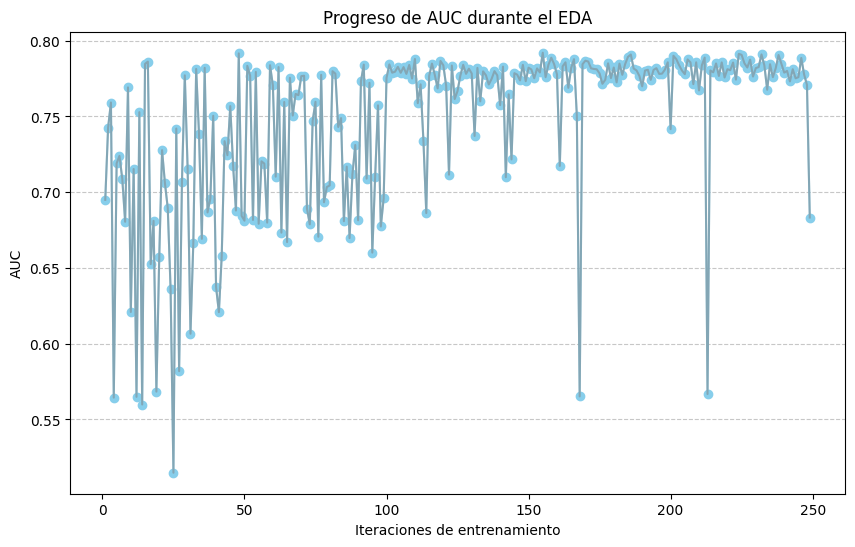

In [8]:
import matplotlib.pyplot as plt

# Convertimos los valores de AUC a números
df['AUC'] = df['AUC'].astype(float)

# Utilizamos el DataFrame df que creamos anteriormente
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['AUC'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Iteraciones de entrenamiento')
plt.ylabel('AUC')
plt.title('Progreso de AUC durante el EDA')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregamos una línea que conecta los puntos
plt.plot(df.index, df['AUC'], color='gray', alpha=0.5)



plt.show()
